In [1]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from utilsCPD import *
import matplotlib.pyplot as plt
from SWCPD import BaseDetector as SWDCP


BATCH_SIZE  =32
mnist_transforms = transforms.Compose([transforms.ToTensor()])
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=True, transform=mnist_transforms)
train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

all_batches = []
all_labels =[]
torch.manual_seed(10)
for x,y in test_dataloader:
    bs = x.shape[0]
    all_batches.append(x.flatten().reshape(bs,784))
    all_labels.append(y)

all_batches = torch.cat(all_batches,dim=0)
all_labels = torch.cat(all_labels,dim=0)

print(all_batches.shape)

Labels_Sampled = []
seed = 2025
rng = np.random.default_rng(seed)


def sample_classes(seed,n_classes = 3,nb_experiments=5):
    rng = np.random.default_rng(seed)
    Labels_Sampled = []
    for run in range(nb_experiments):
        l = tuple(rng.choice(np.arange(10),n_classes,replace=False))
        if l not in Labels_Sampled:
            Labels_Sampled.append(l)
    return Labels_Sampled

Labels_Sampled = sample_classes(seed=seed, n_classes=3,nb_experiments=5)

print(Labels_Sampled)
def FilterData(all_batches,all_labels,lables,N_Samples=200):
    data = []
    cps = []
    for l in lables:
        d =all_batches[all_labels==l].detach().numpy()
        data.append(d[:N_Samples])
        cps.append(len(d[:N_Samples]))
    return np.vstack(data),np.cumsum(cps)[:-1]


FilterData(all_batches,all_labels,list(Labels_Sampled[0]))

LABELS_Sampled = [sample_classes(seed=seed,n_classes=3,nb_experiments=5),sample_classes(seed=seed, n_classes=4,nb_experiments=5),sample_classes(seed=seed, n_classes=5,nb_experiments=5)]
LABELS_Sampled



torch.Size([10000, 784])
[(3, 9, 8), (6, 5, 8), (0, 4, 3), (6, 7, 8), (4, 3, 0)]


[[(3, 9, 8), (6, 5, 8), (0, 4, 3), (6, 7, 8), (4, 3, 0)],
 [(3, 7, 8, 9), (8, 3, 6, 5), (7, 6, 3, 8), (8, 7, 3, 2), (6, 7, 4, 2)],
 [(2, 6, 3, 7, 9),
  (5, 2, 3, 4, 0),
  (4, 0, 3, 8, 2),
  (4, 6, 7, 0, 2),
  (0, 1, 9, 3, 2)]]

In [2]:
from itertools import product

In [ ]:
Window = [20,60,80,100,120]
Lookback = [0.5,1]
W_order = [2,4]
sigma = [0.01,0.05,0.1]
list(product(Window,Lookback,W_order,sigma))

[(20, 0.5, 2, 0.01),
 (20, 0.5, 2, 0.05),
 (20, 0.5, 2, 0.1),
 (20, 0.5, 4, 0.01),
 (20, 0.5, 4, 0.05),
 (20, 0.5, 4, 0.1),
 (20, 1, 2, 0.01),
 (20, 1, 2, 0.05),
 (20, 1, 2, 0.1),
 (20, 1, 4, 0.01),
 (20, 1, 4, 0.05),
 (20, 1, 4, 0.1),
 (60, 0.5, 2, 0.01),
 (60, 0.5, 2, 0.05),
 (60, 0.5, 2, 0.1),
 (60, 0.5, 4, 0.01),
 (60, 0.5, 4, 0.05),
 (60, 0.5, 4, 0.1),
 (60, 1, 2, 0.01),
 (60, 1, 2, 0.05),
 (60, 1, 2, 0.1),
 (60, 1, 4, 0.01),
 (60, 1, 4, 0.05),
 (60, 1, 4, 0.1),
 (80, 0.5, 2, 0.01),
 (80, 0.5, 2, 0.05),
 (80, 0.5, 2, 0.1),
 (80, 0.5, 4, 0.01),
 (80, 0.5, 4, 0.05),
 (80, 0.5, 4, 0.1),
 (80, 1, 2, 0.01),
 (80, 1, 2, 0.05),
 (80, 1, 2, 0.1),
 (80, 1, 4, 0.01),
 (80, 1, 4, 0.05),
 (80, 1, 4, 0.1),
 (100, 0.5, 2, 0.01),
 (100, 0.5, 2, 0.05),
 (100, 0.5, 2, 0.1),
 (100, 0.5, 4, 0.01),
 (100, 0.5, 4, 0.05),
 (100, 0.5, 4, 0.1),
 (100, 1, 2, 0.01),
 (100, 1, 2, 0.05),
 (100, 1, 2, 0.1),
 (100, 1, 4, 0.01),
 (100, 1, 4, 0.05),
 (100, 1, 4, 0.1),
 (120, 0.5, 2, 0.01),
 (120, 0.5, 2, 0.05),


In [76]:
METRICS_SWD = {}
for params in list(product([20,30,40,50,100],Lookback,sigma)):
    METRICS_SWD[params] = {}
    w,history,sig = params
    lookback = int(history*w)
    print(w,lookback,sig)
    Data_OUT = {}
    LABELS_Sampled = [sample_classes(seed=seed,n_classes=3,nb_experiments=5),sample_classes(seed=seed, n_classes=4,nb_experiments=5),sample_classes(seed=seed, n_classes=5,nb_experiments=5)]
    ind = 0
    ind2 = 0
    LABELS_Sampled
    f1,cov,aucs,dd,fp = [],[],[],[],[]
    for id,i in enumerate(range(15)):
        print(id)
        Data_OUT[id] = {}
        #METRICS_SWD[params][id]  = {}
        if i in [5,10]:
            ind+=1
            ind2 = 0
        df, GroundTruth = FilterData(all_batches,all_labels,list(LABELS_Sampled[ind][ind2]),N_Samples=200)
        Data_OUT[id]['data'] = df
        Data_OUT[id]['target'] = GroundTruth
        ind2+=1
        print(GroundTruth)
        detector = SWDCP(data=df,window_length=w,max_history=lookback,significance=sig)
        print(detector.device)
        detector.process_dataloader(p=4,n_theta=5000,seed=2025)
        f1_run, covering_score, auc_score,fp_run,delay = detector.evaluate(GroundTruth,20)
        f1.append(f1_run)
        cov.append(covering_score)
        aucs.append(auc_score)
        dd.append(delay[1])
        fp.append(fp_run)
        #METRICS_SWD[params][id]['AUC'] = auc_score
        #METRICS_SWD[params][id]['DD'] = delay[1]
        #METRICS_SWD[params][id]['FP'] = fp
    METRICS_SWD[params] = {'F1':np.mean(f1),'AUC':np.mean(aucs),'Cov':np.mean(cov),'DD':np.mean(dd),'FP':np.mean(fp_run)}

20 10 0.01
0
[200 400]
cuda


  0%|          | 0/581 [00:00<?, ?it/s]

100%|██████████| 581/581 [00:11<00:00, 50.84it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
1
[200 400]
cuda


100%|██████████| 581/581 [00:12<00:00, 46.32it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 581/581 [00:11<00:00, 50.53it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


100%|██████████| 581/581 [00:11<00:00, 51.95it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
4
[200 400]
cuda


100%|██████████| 581/581 [00:11<00:00, 50.86it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
5
[200 400 600]
cuda


100%|██████████| 781/781 [00:15<00:00, 51.43it/s]


F1 score: 0.4
Covering: 0.25
0.625
6
[200 400 600]
cuda


100%|██████████| 781/781 [00:14<00:00, 52.18it/s]


F1 score: 0.4
Covering: 0.25
0.625
7
[200 400 600]
cuda


100%|██████████| 781/781 [00:14<00:00, 53.44it/s]


F1 score: 0.4
Covering: 0.25
0.625
8
[200 400 600]
cuda


100%|██████████| 781/781 [00:14<00:00, 52.58it/s]


F1 score: 0.4
Covering: 0.25
0.625
9
[200 400 600]
cuda


100%|██████████| 781/781 [00:15<00:00, 51.87it/s]


F1 score: 0.4
Covering: 0.25
0.625
10
[200 400 600 800]
cuda


100%|██████████| 981/981 [00:19<00:00, 51.14it/s]


F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
11
[200 400 600 800]
cuda


 81%|████████▏ | 798/981 [00:16<00:03, 47.43it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 49.02it/s]


F1 score: 0.5714285714285715
Covering: 0.39001980198019803
0.7
12
[200 400 600 800]
cuda


 20%|█▉        | 196/981 [00:03<00:15, 50.84it/s]

Change detected at: 208 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 50.67it/s]


F1 score: 0.5714285714285715
Covering: 0.3918228438228439
0.7
13
[200 400 600 800]
cuda


 61%|██████    | 594/981 [00:10<00:05, 65.53it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 53.55it/s]


F1 score: 0.5714285714285715
Covering: 0.3959747454422744
0.7
14
[200 400 600 800]
cuda


 21%|██        | 203/981 [00:03<00:11, 69.54it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 52.21it/s]


F1 score: 0.5714285714285715
Covering: 0.3898749246534056
0.7
20 10 0.05
0
[200 400]
cuda


100%|██████████| 581/581 [00:11<00:00, 50.11it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
1
[200 400]
cuda


 33%|███▎      | 194/581 [00:03<00:07, 48.38it/s]

Change detected at: 207 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 48.87it/s]


F1 score: 0.8
Covering: 0.6525298090988433
0.8333333333333333
2
[200 400]
cuda


 34%|███▎      | 196/581 [00:04<00:08, 44.94it/s]

Change detected at: 209 
Initiate new segment


100%|██████████| 581/581 [00:12<00:00, 46.77it/s]


F1 score: 0.8
Covering: 0.6486489168165707
0.8333333333333333
3
[200 400]
cuda


 34%|███▎      | 195/581 [00:04<00:07, 49.62it/s]

Change detected at: 207 
Initiate new segment


 68%|██████▊   | 393/581 [00:08<00:03, 48.63it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 581/581 [00:12<00:00, 48.39it/s]


F1 score: 1.0
Covering: 0.9482095169852607
1.0
4
[200 400]
cuda


 68%|██████▊   | 395/581 [00:08<00:04, 46.50it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 581/581 [00:12<00:00, 47.78it/s]


F1 score: 0.8
Covering: 0.646797385620915
0.8333333333333333
5
[200 400 600]
cuda


 51%|█████     | 396/781 [00:08<00:08, 47.33it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 47.81it/s]


F1 score: 0.6666666666666666
Covering: 0.49175101535777493
0.75
6
[200 400 600]
cuda


 50%|█████     | 391/781 [00:08<00:07, 48.91it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▌  | 595/781 [00:12<00:03, 50.84it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 48.53it/s]


F1 score: 0.8571428571428571
Covering: 0.7254897283206582
0.875
7
[200 400 600]
cuda


 25%|██▍       | 195/781 [00:03<00:08, 65.99it/s]

Change detected at: 204 
Initiate new segment


 50%|█████     | 392/781 [00:06<00:08, 48.42it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 51.92it/s]


F1 score: 0.8571428571428571
Covering: 0.7296644781654226
0.875
8
[200 400 600]
cuda


 26%|██▌       | 202/781 [00:03<00:09, 63.74it/s]

Change detected at: 210 
Initiate new segment


 50%|█████     | 394/781 [00:08<00:08, 46.96it/s]

Change detected at: 407 
Initiate new segment


 77%|███████▋  | 601/781 [00:12<00:03, 47.27it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 50.41it/s]


F1 score: 1.0
Covering: 0.9348257418909591
1.0
9
[200 400 600]
cuda


 26%|██▌       | 200/781 [00:02<00:09, 63.72it/s]

Change detected at: 207 
Initiate new segment


 51%|█████     | 396/781 [00:06<00:08, 45.86it/s]

Change detected at: 410 
Initiate new segment


 76%|███████▌  | 593/781 [00:10<00:03, 51.75it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 781/781 [00:13<00:00, 55.81it/s]


F1 score: 1.0
Covering: 0.942026397515528
1.0
10
[200 400 600 800]
cuda


 40%|████      | 395/981 [00:08<00:12, 45.85it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 47.11it/s]


F1 score: 0.5714285714285715
Covering: 0.3958007811582854
0.7
11
[200 400 600 800]
cuda


 60%|██████    | 593/981 [00:10<00:05, 67.58it/s]

Change detected at: 605 
Initiate new segment
Change detected at: 608 
Initiate new segment


 81%|████████  | 793/981 [00:13<00:03, 55.10it/s]

Change detected at: 804 
Initiate new segment


100%|██████████| 981/981 [00:17<00:00, 56.00it/s]


F1 score: 0.6666666666666665
Covering: 0.5825824015556637
0.675
12
[200 400 600 800]
cuda


 20%|██        | 199/981 [00:03<00:10, 71.17it/s]

Change detected at: 204 
Initiate new segment


 40%|████      | 396/981 [00:07<00:11, 51.83it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 54.08it/s]


F1 score: 0.7499999999999999
Covering: 0.5826686968377811
0.8
13
[200 400 600 800]
cuda


 20%|█▉        | 196/981 [00:04<00:17, 44.34it/s]

Change detected at: 208 
Initiate new segment


 40%|████      | 395/981 [00:08<00:11, 49.26it/s]

Change detected at: 407 
Initiate new segment


 60%|██████    | 593/981 [00:12<00:08, 46.65it/s]

Change detected at: 604 
Initiate new segment


 82%|████████▏ | 801/981 [00:16<00:02, 68.53it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 49.86it/s]


F1 score: 1.0
Covering: 0.9455904335714539
1.0
14
[200 400 600 800]
cuda


 20%|██        | 200/981 [00:03<00:10, 72.62it/s]

Change detected at: 207 
Initiate new segment


 41%|████      | 399/981 [00:06<00:08, 72.07it/s]

Change detected at: 408 
Initiate new segment


 61%|██████    | 599/981 [00:10<00:05, 71.71it/s]

Change detected at: 607 
Initiate new segment


 82%|████████▏ | 800/981 [00:14<00:03, 48.45it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 981/981 [00:17<00:00, 57.65it/s]


F1 score: 1.0
Covering: 0.9381304082391039
1.0
20 10 0.1
0
[200 400]
cuda


 13%|█▎        | 73/581 [00:00<00:07, 70.24it/s]

Change detected at: 78 
Initiate new segment


 33%|███▎      | 191/581 [00:03<00:06, 59.59it/s]

Change detected at: 204 
Initiate new segment
Change detected at: 208 
Initiate new segment


 60%|██████    | 350/581 [00:06<00:04, 47.30it/s]

Change detected at: 364 
Initiate new segment


 67%|██████▋   | 391/581 [00:07<00:04, 45.70it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:10<00:00, 54.06it/s]


F1 score: 0.6666666666666666
Covering: 0.7810130718954249
0.75
1
[200 400]
cuda


 22%|██▏       | 130/581 [00:02<00:09, 48.12it/s]

Change detected at: 140 
Initiate new segment


 33%|███▎      | 194/581 [00:03<00:06, 58.59it/s]

Change detected at: 206 
Initiate new segment


 56%|█████▋    | 328/581 [00:05<00:05, 48.28it/s]

Change detected at: 339 
Initiate new segment


100%|██████████| 581/581 [00:10<00:00, 55.00it/s]


F1 score: 0.5714285714285715
Covering: 0.7104278416347382
0.5833333333333334
2
[200 400]
cuda


 34%|███▍      | 199/581 [00:04<00:07, 50.31it/s]

Change detected at: 208 
Initiate new segment


 69%|██████▊   | 398/581 [00:07<00:03, 49.31it/s]

Change detected at: 407 
Initiate new segment


 80%|████████  | 466/581 [00:09<00:02, 42.68it/s]

Change detected at: 478 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 49.50it/s]


F1 score: 0.8571428571428571
Covering: 0.8330248978075064
0.875
3
[200 400]
cuda


 22%|██▏       | 125/581 [00:02<00:09, 48.33it/s]

Change detected at: 140 
Initiate new segment


 33%|███▎      | 194/581 [00:03<00:07, 49.13it/s]

Change detected at: 205 
Initiate new segment


 68%|██████▊   | 396/581 [00:08<00:03, 46.71it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:12<00:00, 47.58it/s]


F1 score: 0.8571428571428571
Covering: 0.8690096618357488
0.875
4
[200 400]
cuda


 34%|███▎      | 195/581 [00:04<00:08, 47.22it/s]

Change detected at: 207 
Initiate new segment


 46%|████▌     | 266/581 [00:05<00:06, 46.78it/s]

Change detected at: 278 
Initiate new segment


 69%|██████▊   | 398/581 [00:08<00:02, 64.09it/s]

Change detected at: 404 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 50.39it/s]


F1 score: 0.8571428571428571
Covering: 0.8480742635218339
0.875
5
[200 400 600]
cuda


  8%|▊         | 64/781 [00:00<00:10, 69.46it/s]

Change detected at: 78 
Initiate new segment


 25%|██▍       | 193/781 [00:03<00:12, 46.61it/s]

Change detected at: 204 
Initiate new segment


 50%|█████     | 394/781 [00:06<00:08, 47.74it/s]

Change detected at: 407 
Initiate new segment


 77%|███████▋  | 598/781 [00:10<00:03, 48.90it/s]

Change detected at: 610 
Initiate new segment


 96%|█████████▌| 749/781 [00:14<00:00, 46.35it/s]

Change detected at: 764 
Initiate new segment


100%|██████████| 781/781 [00:14<00:00, 52.56it/s]


F1 score: 0.8
Covering: 0.8084866845288841
0.8333333333333333
6
[200 400 600]
cuda


 25%|██▌       | 197/781 [00:04<00:11, 50.37it/s]

Change detected at: 209 
Initiate new segment


 34%|███▍      | 265/781 [00:05<00:10, 49.71it/s]

Change detected at: 278 
Initiate new segment


 50%|█████     | 391/781 [00:08<00:07, 48.90it/s]

Change detected at: 403 
Initiate new segment


 67%|██████▋   | 525/781 [00:10<00:05, 48.55it/s]

Change detected at: 540 
Initiate new segment


 76%|███████▌  | 594/781 [00:12<00:03, 48.87it/s]

Change detected at: 606 
Initiate new segment


 93%|█████████▎| 727/781 [00:15<00:01, 48.30it/s]

Change detected at: 739 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 48.02it/s]


F1 score: 0.7272727272727273
Covering: 0.7269807551794848
0.7857142857142857
7
[200 400 600]
cuda


 25%|██▍       | 193/781 [00:03<00:11, 53.10it/s]

Change detected at: 203 
Initiate new segment


 42%|████▏     | 328/781 [00:06<00:09, 48.49it/s]

Change detected at: 340 
Initiate new segment


 50%|█████     | 391/781 [00:07<00:08, 47.63it/s]

Change detected at: 405 
Initiate new segment


 59%|█████▉    | 464/781 [00:09<00:06, 48.91it/s]

Change detected at: 478 
Initiate new segment


 76%|███████▌  | 590/781 [00:11<00:03, 53.59it/s]

Change detected at: 604 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 49.92it/s]


F1 score: 0.8
Covering: 0.8120652226407805
0.8333333333333333
8
[200 400 600]
cuda


 25%|██▍       | 195/781 [00:04<00:12, 45.79it/s]

Change detected at: 208 
Initiate new segment


 50%|█████     | 391/781 [00:08<00:08, 45.34it/s]

Change detected at: 405 
Initiate new segment


 60%|█████▉    | 467/781 [00:09<00:06, 46.58it/s]

Change detected at: 478 
Initiate new segment


 77%|███████▋  | 598/781 [00:12<00:03, 47.43it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 48.16it/s]


F1 score: 0.888888888888889
Covering: 0.8611655722326454
0.9
9
[200 400 600]
cuda


 17%|█▋        | 130/781 [00:02<00:13, 49.18it/s]

Change detected at: 140 
Initiate new segment


 24%|██▍       | 191/781 [00:03<00:12, 48.82it/s]

Change detected at: 205 
Initiate new segment


 50%|█████     | 393/781 [00:08<00:08, 47.15it/s]

Change detected at: 406 
Initiate new segment


 76%|███████▌  | 592/781 [00:12<00:04, 44.30it/s]

Change detected at: 606 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 47.66it/s]


F1 score: 0.888888888888889
Covering: 0.8895873786407767
0.9
10
[200 400 600 800]
cuda


 33%|███▎      | 328/981 [00:06<00:12, 51.11it/s]

Change detected at: 340 
Initiate new segment


 40%|████      | 394/981 [00:07<00:12, 47.31it/s]

Change detected at: 405 
Initiate new segment


 48%|████▊     | 466/981 [00:09<00:10, 47.67it/s]

Change detected at: 478 
Initiate new segment


 61%|██████    | 598/981 [00:11<00:05, 68.35it/s]

Change detected at: 604 
Initiate new segment


 97%|█████████▋| 952/981 [00:18<00:00, 47.11it/s]

Change detected at: 964 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 50.38it/s]


F1 score: 0.5454545454545454
Covering: 0.4977754924813748
0.5499999999999999
11
[200 400 600 800]
cuda


 13%|█▎        | 130/981 [00:02<00:12, 66.00it/s]

Change detected at: 139 
Initiate new segment


 20%|██        | 199/981 [00:03<00:15, 51.79it/s]

Change detected at: 210 
Initiate new segment


 40%|████      | 396/981 [00:07<00:11, 52.16it/s]

Change detected at: 409 
Initiate new segment


 48%|████▊     | 470/981 [00:08<00:07, 65.74it/s]

Change detected at: 478 
Initiate new segment


 60%|██████    | 592/981 [00:10<00:08, 47.56it/s]

Change detected at: 603 
Initiate new segment


 81%|████████  | 793/981 [00:14<00:03, 50.55it/s]

Change detected at: 803 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 53.69it/s]


F1 score: 0.8333333333333333
Covering: 0.8321038961038961
0.8571428571428572
12
[200 400 600 800]
cuda


 20%|█▉        | 195/981 [00:03<00:11, 69.57it/s]

Change detected at: 203 
Initiate new segment


 41%|████      | 398/981 [00:07<00:11, 49.01it/s]

Change detected at: 407 
Initiate new segment


 47%|████▋     | 465/981 [00:08<00:11, 45.21it/s]

Change detected at: 478 
Initiate new segment


 60%|██████    | 589/981 [00:11<00:09, 40.64it/s]

Change detected at: 604 
Initiate new segment


 81%|████████  | 796/981 [00:16<00:04, 44.39it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 51.85it/s]


F1 score: 0.9090909090909091
Covering: 0.8836570090304988
0.9166666666666667
13
[200 400 600 800]
cuda


 20%|█▉        | 193/981 [00:02<00:13, 59.86it/s]

Change detected at: 203 
Initiate new segment


 33%|███▎      | 324/981 [00:05<00:14, 45.83it/s]

Change detected at: 340 
Initiate new segment


 40%|████      | 394/981 [00:06<00:12, 46.41it/s]

Change detected at: 405 
Initiate new segment


 60%|██████    | 589/981 [00:10<00:07, 50.08it/s]

Change detected at: 603 
Initiate new segment


 81%|████████  | 796/981 [00:14<00:03, 49.68it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 51.99it/s]


F1 score: 0.9090909090909091
Covering: 0.9095007258275623
0.9166666666666667
14
[200 400 600 800]
cuda


 20%|██        | 198/981 [00:04<00:12, 63.75it/s]

Change detected at: 206 
Initiate new segment


 22%|██▏       | 219/981 [00:04<00:11, 67.04it/s]

Change detected at: 229 
Initiate new segment


 24%|██▍       | 240/981 [00:04<00:10, 68.26it/s]

Change detected at: 248 
Initiate new segment


 29%|██▊       | 280/981 [00:05<00:10, 68.84it/s]

Change detected at: 287 
Initiate new segment


 30%|██▉       | 294/981 [00:05<00:10, 62.76it/s]

Change detected at: 302 
Initiate new segment


 32%|███▏      | 313/981 [00:05<00:12, 54.07it/s]

Change detected at: 322 
Initiate new segment
Change detected at: 331 
Initiate new segment


 34%|███▍      | 337/981 [00:06<00:12, 51.30it/s]

Change detected at: 349 
Initiate new segment


 40%|███▉      | 391/981 [00:07<00:11, 52.00it/s]

Change detected at: 405 
Initiate new segment


 56%|█████▌    | 549/981 [00:10<00:09, 44.36it/s]

Change detected at: 564 
Initiate new segment


 61%|██████    | 597/981 [00:11<00:07, 49.06it/s]

Change detected at: 605 
Initiate new segment


 68%|██████▊   | 666/981 [00:13<00:06, 49.14it/s]

Change detected at: 678 
Initiate new segment


 81%|████████  | 795/981 [00:15<00:03, 50.82it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 49.69it/s]


F1 score: 0.5263157894736842
Covering: 0.7122385471502213
0.6785714285714286
20 20 0.01
0
[200 400]
cuda


100%|██████████| 581/581 [00:12<00:00, 48.38it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
1
[200 400]
cuda


100%|██████████| 581/581 [00:12<00:00, 47.58it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 581/581 [00:12<00:00, 47.12it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


 34%|███▎      | 195/581 [00:04<00:08, 46.26it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 48.95it/s]


F1 score: 0.8
Covering: 0.6467338217338217
0.8333333333333333
4
[200 400]
cuda


100%|██████████| 581/581 [00:12<00:00, 47.22it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
5
[200 400 600]
cuda


100%|██████████| 781/781 [00:15<00:00, 49.79it/s]


F1 score: 0.4
Covering: 0.25
0.625
6
[200 400 600]
cuda


100%|██████████| 781/781 [00:16<00:00, 46.19it/s]


F1 score: 0.4
Covering: 0.25
0.625
7
[200 400 600]
cuda


 25%|██▍       | 195/781 [00:04<00:12, 46.52it/s]

Change detected at: 209 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 46.73it/s]


F1 score: 0.6666666666666666
Covering: 0.48802252082675546
0.75
8
[200 400 600]
cuda


100%|██████████| 781/781 [00:15<00:00, 51.32it/s]


F1 score: 0.4
Covering: 0.25
0.625
9
[200 400 600]
cuda


 25%|██▌       | 199/781 [00:03<00:11, 50.95it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 49.27it/s]


F1 score: 0.6666666666666666
Covering: 0.48675343018563355
0.75
10
[200 400 600 800]
cuda


100%|██████████| 981/981 [00:20<00:00, 48.76it/s]


F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
11
[200 400 600 800]
cuda


 81%|████████  | 795/981 [00:16<00:03, 48.60it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 48.21it/s]


F1 score: 0.5714285714285715
Covering: 0.39001980198019803
0.7
12
[200 400 600 800]
cuda


 20%|█▉        | 195/981 [00:04<00:15, 49.67it/s]

Change detected at: 208 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 48.29it/s]


F1 score: 0.5714285714285715
Covering: 0.3918228438228439
0.7
13
[200 400 600 800]
cuda


 40%|████      | 396/981 [00:07<00:12, 47.60it/s]

Change detected at: 410 
Initiate new segment


 61%|██████    | 596/981 [00:12<00:08, 45.70it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 48.34it/s]


F1 score: 0.7499999999999999
Covering: 0.5769780009300259
0.8
14
[200 400 600 800]
cuda


 20%|█▉        | 195/981 [00:03<00:16, 47.88it/s]

Change detected at: 209 
Initiate new segment


 41%|████      | 398/981 [00:08<00:11, 50.58it/s]

Change detected at: 410 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 52.25it/s]


F1 score: 0.7499999999999999
Covering: 0.5722188753856907
0.8
20 20 0.05
0
[200 400]
cuda


 35%|███▍      | 202/581 [00:03<00:05, 63.55it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 52.69it/s]


F1 score: 0.8
Covering: 0.6467338217338217
0.8333333333333333
1
[200 400]
cuda


 34%|███▍      | 199/581 [00:02<00:05, 69.98it/s]

Change detected at: 207 
Initiate new segment


100%|██████████| 581/581 [00:10<00:00, 54.88it/s]


F1 score: 0.8
Covering: 0.6525298090988433
0.8333333333333333
2
[200 400]
cuda


 34%|███▍      | 197/581 [00:03<00:06, 59.79it/s]

Change detected at: 209 
Initiate new segment


 69%|██████▉   | 402/581 [00:07<00:02, 71.01it/s]

Change detected at: 410 
Initiate new segment


100%|██████████| 581/581 [00:09<00:00, 58.11it/s]


F1 score: 1.0
Covering: 0.9388205361889572
1.0
3
[200 400]
cuda


 33%|███▎      | 194/581 [00:04<00:08, 48.30it/s]

Change detected at: 207 
Initiate new segment


 68%|██████▊   | 396/581 [00:08<00:03, 50.43it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 48.88it/s]


F1 score: 1.0
Covering: 0.9482095169852607
1.0
4
[200 400]
cuda


 34%|███▎      | 195/581 [00:03<00:08, 43.72it/s]

Change detected at: 210 
Initiate new segment


 68%|██████▊   | 393/581 [00:06<00:03, 59.53it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:10<00:00, 52.89it/s]


F1 score: 1.0
Covering: 0.9450851161720726
1.0
5
[200 400 600]
cuda


 25%|██▍       | 194/781 [00:04<00:12, 47.58it/s]

Change detected at: 208 
Initiate new segment


 51%|█████     | 397/781 [00:08<00:08, 47.74it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 48.07it/s]


F1 score: 0.8571428571428571
Covering: 0.7173019250066127
0.875
6
[200 400 600]
cuda


 26%|██▌       | 200/781 [00:03<00:11, 51.64it/s]

Change detected at: 209 
Initiate new segment


 50%|████▉     | 390/781 [00:07<00:08, 47.29it/s]

Change detected at: 403 
Initiate new segment


 76%|███████▌  | 595/781 [00:11<00:03, 52.53it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 51.05it/s]


F1 score: 1.0
Covering: 0.9536288299516226
1.0
7
[200 400 600]
cuda


 25%|██▍       | 193/781 [00:03<00:11, 51.79it/s]

Change detected at: 204 
Initiate new segment


 50%|█████     | 392/781 [00:07<00:08, 46.85it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 48.90it/s]


F1 score: 0.8571428571428571
Covering: 0.7296644781654226
0.875
8
[200 400 600]
cuda


 25%|██▌       | 199/781 [00:04<00:11, 49.60it/s]

Change detected at: 208 
Initiate new segment


 50%|█████     | 392/781 [00:08<00:09, 43.22it/s]

Change detected at: 407 
Initiate new segment


 76%|███████▋  | 597/781 [00:11<00:02, 68.57it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 781/781 [00:15<00:00, 49.46it/s]


F1 score: 1.0
Covering: 0.9395305781175347
1.0
9
[200 400 600]
cuda


 25%|██▍       | 193/781 [00:03<00:12, 48.07it/s]

Change detected at: 207 
Initiate new segment


 51%|█████     | 399/781 [00:07<00:08, 47.28it/s]

Change detected at: 410 
Initiate new segment


 76%|███████▌  | 591/781 [00:10<00:03, 62.28it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 781/781 [00:13<00:00, 56.77it/s]


F1 score: 1.0
Covering: 0.942026397515528
1.0
10
[200 400 600 800]
cuda


 20%|██        | 198/981 [00:03<00:16, 47.45it/s]

Change detected at: 209 
Initiate new segment


 40%|████      | 394/981 [00:07<00:11, 50.18it/s]

Change detected at: 407 
Initiate new segment


 61%|██████    | 597/981 [00:10<00:08, 47.99it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 53.74it/s]


F1 score: 0.888888888888889
Covering: 0.7595463620139985
0.9
11
[200 400 600 800]
cuda


 40%|████      | 395/981 [00:07<00:12, 46.23it/s]

Change detected at: 409 
Initiate new segment


 60%|██████    | 592/981 [00:11<00:08, 45.76it/s]

Change detected at: 604 
Initiate new segment


 81%|████████  | 794/981 [00:15<00:04, 46.31it/s]

Change detected at: 805 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 49.64it/s]


F1 score: 0.888888888888889
Covering: 0.7690734361607963
0.9
12
[200 400 600 800]
cuda


 19%|█▉        | 191/981 [00:04<00:16, 48.36it/s]

Change detected at: 205 
Initiate new segment


 41%|████      | 398/981 [00:07<00:11, 51.96it/s]

Change detected at: 409 
Initiate new segment


 81%|████████▏ | 799/981 [00:15<00:03, 45.51it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 52.49it/s]


F1 score: 0.888888888888889
Covering: 0.7646461771816229
0.9
13
[200 400 600 800]
cuda


 20%|█▉        | 196/981 [00:03<00:16, 46.50it/s]

Change detected at: 207 
Initiate new segment


 40%|████      | 395/981 [00:07<00:12, 45.22it/s]

Change detected at: 407 
Initiate new segment


 61%|██████    | 596/981 [00:10<00:07, 50.04it/s]

Change detected at: 605 
Initiate new segment


 82%|████████▏ | 801/981 [00:15<00:03, 47.80it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 981/981 [00:18<00:00, 52.04it/s]


F1 score: 1.0
Covering: 0.9456056986677626
1.0
14
[200 400 600 800]
cuda


 20%|██        | 197/981 [00:03<00:15, 50.01it/s]

Change detected at: 207 
Initiate new segment


 40%|███▉      | 392/981 [00:08<00:12, 46.27it/s]

Change detected at: 407 
Initiate new segment


 61%|██████    | 596/981 [00:12<00:07, 51.27it/s]

Change detected at: 607 
Initiate new segment


 82%|████████▏ | 800/981 [00:15<00:03, 48.73it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 49.75it/s]


F1 score: 1.0
Covering: 0.9399930986887509
1.0
20 20 0.1
0
[200 400]
cuda


 33%|███▎      | 194/581 [00:03<00:07, 50.01it/s]

Change detected at: 204 
Initiate new segment
Change detected at: 207 
Initiate new segment


 60%|██████    | 350/581 [00:07<00:05, 42.42it/s]

Change detected at: 365 
Initiate new segment


 68%|██████▊   | 395/581 [00:07<00:04, 46.38it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 48.66it/s]


F1 score: 0.7499999999999999
Covering: 0.911797385620915
0.8
1
[200 400]
cuda


 19%|█▉        | 110/581 [00:01<00:07, 62.87it/s]

Change detected at: 120 
Initiate new segment


 23%|██▎       | 131/581 [00:02<00:07, 60.82it/s]

Change detected at: 140 
Initiate new segment


 33%|███▎      | 193/581 [00:03<00:08, 47.90it/s]

Change detected at: 206 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 49.60it/s]


F1 score: 0.5714285714285715
Covering: 0.5308714043993232
0.5833333333333334
2
[200 400]
cuda


 34%|███▎      | 195/581 [00:03<00:08, 43.66it/s]

Change detected at: 208 
Initiate new segment


 68%|██████▊   | 393/581 [00:07<00:03, 47.59it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 52.63it/s]


F1 score: 1.0
Covering: 0.9513582311408398
1.0
3
[200 400]
cuda


 18%|█▊        | 106/581 [00:02<00:07, 61.49it/s]

Change detected at: 120 
Initiate new segment


 22%|██▏       | 127/581 [00:02<00:07, 64.19it/s]

Change detected at: 140 
Initiate new segment


 33%|███▎      | 193/581 [00:03<00:07, 54.45it/s]

Change detected at: 205 
Initiate new segment


 68%|██████▊   | 397/581 [00:07<00:03, 50.87it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 581/581 [00:11<00:00, 50.11it/s]


F1 score: 0.7499999999999999
Covering: 0.8356763285024155
0.8
4
[200 400]
cuda


 35%|███▌      | 205/581 [00:03<00:03, 107.38it/s]

Change detected at: 207 
Initiate new segment


 70%|███████   | 409/581 [00:04<00:01, 122.05it/s]

Change detected at: 404 
Initiate new segment


100%|██████████| 581/581 [00:06<00:00, 85.48it/s] 


F1 score: 1.0
Covering: 0.9640873354172588
1.0
5
[200 400 600]
cuda


 25%|██▍       | 193/781 [00:03<00:13, 43.79it/s]

Change detected at: 203 
Initiate new segment


 50%|█████     | 393/781 [00:07<00:08, 45.64it/s]

Change detected at: 407 
Initiate new segment


 76%|███████▋  | 596/781 [00:12<00:04, 44.43it/s]

Change detected at: 609 
Initiate new segment


 97%|█████████▋| 756/781 [00:15<00:00, 47.28it/s]

Change detected at: 765 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 47.48it/s]


F1 score: 0.888888888888889
Covering: 0.9100893680523603
0.9
6
[200 400 600]
cuda


 25%|██▌       | 196/781 [00:04<00:13, 43.71it/s]

Change detected at: 207 
Initiate new segment


 49%|████▉     | 386/781 [00:09<00:08, 45.45it/s]

Change detected at: 403 
Initiate new segment


 65%|██████▍   | 505/781 [00:12<00:06, 44.89it/s]

Change detected at: 520 
Initiate new segment


 68%|██████▊   | 530/781 [00:13<00:05, 45.16it/s]

Change detected at: 540 
Initiate new segment


 76%|███████▌  | 595/781 [00:14<00:04, 46.03it/s]

Change detected at: 606 
Initiate new segment


100%|██████████| 781/781 [00:18<00:00, 41.96it/s]


F1 score: 0.8
Covering: 0.8679806227838462
0.8333333333333333
7
[200 400 600]
cuda


 25%|██▍       | 194/781 [00:04<00:12, 48.70it/s]

Change detected at: 203 
Initiate new segment


 40%|███▉      | 311/781 [00:06<00:10, 46.98it/s]

Change detected at: 320 
Initiate new segment


 42%|████▏     | 327/781 [00:06<00:09, 48.04it/s]

Change detected at: 340 
Initiate new segment


 50%|█████     | 393/781 [00:08<00:08, 44.30it/s]

Change detected at: 405 
Initiate new segment


 76%|███████▌  | 594/781 [00:12<00:04, 46.02it/s]

Change detected at: 604 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 46.19it/s]


F1 score: 0.8
Covering: 0.8765260069545059
0.8333333333333333
8
[200 400 600]
cuda


 25%|██▍       | 195/781 [00:04<00:12, 47.91it/s]

Change detected at: 207 
Initiate new segment


 51%|█████     | 395/781 [00:08<00:07, 49.08it/s]

Change detected at: 405 
Initiate new segment


 77%|███████▋  | 598/781 [00:12<00:03, 48.26it/s]

Change detected at: 607 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 47.72it/s]


F1 score: 1.0
Covering: 0.9536689937551549
1.0
9
[200 400 600]
cuda


 13%|█▎        | 104/781 [00:02<00:14, 47.51it/s]

Change detected at: 120 
Initiate new segment


 17%|█▋        | 130/781 [00:02<00:13, 47.68it/s]

Change detected at: 140 
Initiate new segment


 24%|██▍       | 191/781 [00:04<00:12, 48.10it/s]

Change detected at: 205 
Initiate new segment


 50%|█████     | 392/781 [00:08<00:08, 47.29it/s]

Change detected at: 406 
Initiate new segment


 76%|███████▌  | 593/781 [00:12<00:04, 45.86it/s]

Change detected at: 606 
Initiate new segment


100%|██████████| 781/781 [00:16<00:00, 46.08it/s]


F1 score: 0.8
Covering: 0.8645873786407767
0.8333333333333333
10
[200 400 600 800]
cuda


 20%|██        | 197/981 [00:04<00:15, 49.34it/s]

Change detected at: 207 
Initiate new segment


 31%|███▏      | 308/981 [00:06<00:14, 46.60it/s]

Change detected at: 320 
Initiate new segment


 33%|███▎      | 328/981 [00:06<00:13, 47.78it/s]

Change detected at: 340 
Initiate new segment


 40%|████      | 393/981 [00:08<00:12, 47.61it/s]

Change detected at: 405 
Initiate new segment


 61%|██████    | 594/981 [00:12<00:08, 48.03it/s]

Change detected at: 603 
Initiate new segment


 81%|████████  | 796/981 [00:16<00:03, 46.64it/s]

Change detected at: 810 
Initiate new segment


 97%|█████████▋| 950/981 [00:19<00:00, 44.43it/s]

Change detected at: 965 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 47.69it/s]


F1 score: 0.7692307692307693
Covering: 0.8409739891958783
0.8125
11
[200 400 600 800]
cuda


 20%|█▉        | 196/981 [00:04<00:16, 46.26it/s]

Change detected at: 208 
Initiate new segment


 40%|████      | 393/981 [00:08<00:12, 46.98it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 590/981 [00:12<00:07, 49.97it/s]

Change detected at: 603 
Initiate new segment


 80%|████████  | 789/981 [00:16<00:03, 48.63it/s]

Change detected at: 804 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 48.07it/s]


F1 score: 1.0
Covering: 0.9552228934013923
1.0
12
[200 400 600 800]
cuda


 20%|█▉        | 192/981 [00:04<00:16, 47.09it/s]

Change detected at: 204 
Initiate new segment


 40%|████      | 393/981 [00:08<00:12, 47.51it/s]

Change detected at: 407 
Initiate new segment


 60%|██████    | 592/981 [00:12<00:08, 47.47it/s]

Change detected at: 604 
Initiate new segment


 81%|████████  | 797/981 [00:17<00:03, 48.13it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 46.99it/s]


F1 score: 1.0
Covering: 0.9532259069358275
1.0
13
[200 400 600 800]
cuda


 20%|█▉        | 192/981 [00:03<00:15, 50.00it/s]

Change detected at: 204 
Initiate new segment


 31%|███▏      | 308/981 [00:06<00:13, 49.86it/s]

Change detected at: 320 
Initiate new segment


 33%|███▎      | 326/981 [00:06<00:13, 49.72it/s]

Change detected at: 340 
Initiate new segment


 40%|███▉      | 391/981 [00:07<00:12, 48.86it/s]

Change detected at: 405 
Initiate new segment


 60%|█████▉    | 588/981 [00:11<00:08, 47.64it/s]

Change detected at: 603 
Initiate new segment


 81%|████████  | 796/981 [00:16<00:03, 50.18it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 981/981 [00:19<00:00, 49.12it/s]


F1 score: 0.8333333333333333
Covering: 0.8875348222247419
0.8571428571428572
14
[200 400 600 800]
cuda


 20%|█▉        | 194/981 [00:04<00:15, 49.19it/s]

Change detected at: 206 
Initiate new segment


 24%|██▍       | 239/981 [00:04<00:15, 47.62it/s]

Change detected at: 249 
Initiate new segment


 29%|██▊       | 280/981 [00:05<00:14, 46.95it/s]

Change detected at: 295 
Initiate new segment
Change detected at: 301 
Initiate new segment


 32%|███▏      | 310/981 [00:06<00:14, 44.81it/s]

Change detected at: 322 
Initiate new segment


 33%|███▎      | 320/981 [00:06<00:14, 45.17it/s]

Change detected at: 331 
Initiate new segment


 34%|███▍      | 335/981 [00:07<00:13, 46.19it/s]

Change detected at: 349 
Initiate new segment
Change detected at: 356 
Initiate new segment


 37%|███▋      | 366/981 [00:07<00:13, 46.49it/s]

Change detected at: 379 
Initiate new segment


 40%|███▉      | 391/981 [00:08<00:12, 45.53it/s]

Change detected at: 405 
Initiate new segment


 56%|█████▌    | 550/981 [00:11<00:09, 46.41it/s]

Change detected at: 565 
Initiate new segment


 61%|██████    | 596/981 [00:12<00:08, 47.65it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 795/981 [00:16<00:03, 47.67it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 981/981 [00:20<00:00, 46.84it/s]


F1 score: 0.5263157894736842
Covering: 0.7806143708081235
0.6785714285714286
30 15 0.01
0
[200 400]
cuda


100%|██████████| 571/571 [00:12<00:00, 47.55it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
1
[200 400]
cuda


100%|██████████| 571/571 [00:11<00:00, 49.71it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 571/571 [00:11<00:00, 48.93it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


100%|██████████| 571/571 [00:11<00:00, 48.99it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
4
[200 400]
cuda


100%|██████████| 571/571 [00:11<00:00, 48.76it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
5
[200 400 600]
cuda


100%|██████████| 771/771 [00:16<00:00, 47.67it/s]


F1 score: 0.4
Covering: 0.25
0.625
6
[200 400 600]
cuda


100%|██████████| 771/771 [00:15<00:00, 49.48it/s]


F1 score: 0.4
Covering: 0.25
0.625
7
[200 400 600]
cuda


100%|██████████| 771/771 [00:15<00:00, 48.58it/s]


F1 score: 0.4
Covering: 0.25
0.625
8
[200 400 600]
cuda


100%|██████████| 771/771 [00:16<00:00, 46.49it/s]


F1 score: 0.4
Covering: 0.25
0.625
9
[200 400 600]
cuda


100%|██████████| 771/771 [00:16<00:00, 46.85it/s]


F1 score: 0.4
Covering: 0.25
0.625
10
[200 400 600 800]
cuda


100%|██████████| 971/971 [00:19<00:00, 48.84it/s]


F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
11
[200 400 600 800]
cuda


 81%|████████  | 787/971 [00:15<00:03, 48.37it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.38it/s]


F1 score: 0.5714285714285715
Covering: 0.38504433497536944
0.7
12
[200 400 600 800]
cuda


 19%|█▉        | 187/971 [00:03<00:16, 48.10it/s]

Change detected at: 212 
Initiate new segment


100%|██████████| 971/971 [00:20<00:00, 47.52it/s]


F1 score: 0.5714285714285715
Covering: 0.38796350924240974
0.7
13
[200 400 600 800]
cuda


 60%|██████    | 587/971 [00:12<00:07, 49.29it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 971/971 [00:20<00:00, 48.48it/s]


F1 score: 0.5714285714285715
Covering: 0.3942854140395124
0.7
14
[200 400 600 800]
cuda


 19%|█▉        | 188/971 [00:03<00:16, 48.88it/s]

Change detected at: 213 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.88it/s]


F1 score: 0.5714285714285715
Covering: 0.3870211908895133
0.7
30 15 0.05
0
[200 400]
cuda


 33%|███▎      | 188/571 [00:03<00:07, 49.51it/s]

Change detected at: 210 
Initiate new segment
Change detected at: 213 
Initiate new segment


 69%|██████▉   | 393/571 [00:08<00:03, 49.12it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.92it/s]


F1 score: 0.8571428571428571
Covering: 0.9248188080263553
0.875
1
[200 400]
cuda


 33%|███▎      | 189/571 [00:03<00:07, 49.14it/s]

Change detected at: 213 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.15it/s]


F1 score: 0.8
Covering: 0.6410876672611032
0.8333333333333333
2
[200 400]
cuda


 33%|███▎      | 191/571 [00:04<00:08, 46.57it/s]

Change detected at: 214 
Initiate new segment


 68%|██████▊   | 389/571 [00:08<00:03, 45.66it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 46.38it/s]


F1 score: 1.0
Covering: 0.9112461059190031
1.0
3
[200 400]
cuda


 34%|███▎      | 192/571 [00:04<00:07, 49.13it/s]

Change detected at: 212 
Initiate new segment


 68%|██████▊   | 388/571 [00:08<00:03, 46.67it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.06it/s]


F1 score: 1.0
Covering: 0.9264638290262004
1.0
4
[200 400]
cuda


 34%|███▍      | 193/571 [00:03<00:07, 50.27it/s]

Change detected at: 214 
Initiate new segment


 67%|██████▋   | 385/571 [00:07<00:03, 47.16it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.53it/s]


F1 score: 1.0
Covering: 0.9265105307874615
1.0
5
[200 400 600]
cuda


 24%|██▍       | 186/771 [00:03<00:11, 49.79it/s]

Change detected at: 209 
Initiate new segment


 50%|█████     | 389/771 [00:08<00:07, 48.62it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.31it/s]


F1 score: 0.8571428571428571
Covering: 0.7121974716664906
0.875
6
[200 400 600]
cuda


 50%|█████     | 387/771 [00:07<00:08, 46.34it/s]

Change detected at: 409 
Initiate new segment


 77%|███████▋  | 593/771 [00:12<00:03, 48.12it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.34it/s]


F1 score: 0.8571428571428571
Covering: 0.702427181261981
0.875
7
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:03<00:12, 47.29it/s]

Change detected at: 206 
Initiate new segment


 51%|█████     | 392/771 [00:08<00:07, 48.80it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 48.07it/s]


F1 score: 0.8571428571428571
Covering: 0.7164919435266424
0.875
8
[200 400 600]
cuda


 25%|██▌       | 194/771 [00:04<00:12, 47.94it/s]

Change detected at: 214 
Initiate new segment


 51%|█████     | 391/771 [00:08<00:08, 45.84it/s]

Change detected at: 411 
Initiate new segment


 77%|███████▋  | 591/771 [00:15<00:04, 42.37it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 771/771 [00:19<00:00, 39.59it/s]


F1 score: 1.0
Covering: 0.9096049926480083
1.0
9
[200 400 600]
cuda


 25%|██▍       | 189/771 [00:04<00:13, 42.15it/s]

Change detected at: 212 
Initiate new segment


 51%|█████     | 391/771 [00:09<00:09, 39.22it/s]

Change detected at: 415 
Initiate new segment


 77%|███████▋  | 593/771 [00:14<00:04, 41.62it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 43.14it/s]


F1 score: 1.0
Covering: 0.9030752030936671
1.0
10
[200 400 600 800]
cuda


 40%|███▉      | 388/971 [00:08<00:13, 44.02it/s]

Change detected at: 413 
Initiate new segment


 61%|██████    | 589/971 [00:13<00:08, 47.05it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.01it/s]


F1 score: 0.7499999999999999
Covering: 0.570453759186644
0.8
11
[200 400 600 800]
cuda


 20%|█▉        | 190/971 [00:04<00:17, 43.86it/s]

Change detected at: 215 
Initiate new segment


 60%|██████    | 585/971 [00:13<00:07, 53.06it/s]

Change detected at: 609 
Initiate new segment


 81%|████████  | 784/971 [00:17<00:04, 42.54it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.00it/s]


F1 score: 0.888888888888889
Covering: 0.7536877480986086
0.9
12
[200 400 600 800]
cuda


 19%|█▉        | 188/971 [00:04<00:17, 43.90it/s]

Change detected at: 208 
Initiate new segment


 40%|███▉      | 387/971 [00:08<00:13, 44.88it/s]

Change detected at: 412 
Initiate new segment


 82%|████████▏ | 795/971 [00:17<00:03, 49.71it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.41it/s]


F1 score: 0.888888888888889
Covering: 0.7482977605444955
0.9
13
[200 400 600 800]
cuda


 40%|████      | 389/971 [00:08<00:11, 49.35it/s]

Change detected at: 412 
Initiate new segment


 60%|██████    | 583/971 [00:13<00:09, 41.87it/s]

Change detected at: 607 
Initiate new segment


 81%|████████▏ | 791/971 [00:17<00:04, 42.84it/s]

Change detected at: 813 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 44.37it/s]


F1 score: 0.888888888888889
Covering: 0.7440379266358434
0.9
14
[200 400 600 800]
cuda


 19%|█▉        | 185/971 [00:03<00:16, 47.03it/s]

Change detected at: 209 
Initiate new segment


 39%|███▉      | 383/971 [00:08<00:13, 43.25it/s]

Change detected at: 407 
Initiate new segment


 60%|██████    | 587/971 [00:13<00:08, 43.04it/s]

Change detected at: 611 
Initiate new segment


 81%|████████▏ | 791/971 [00:17<00:03, 50.52it/s]

Change detected at: 813 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.64it/s]


F1 score: 1.0
Covering: 0.9233317999685317
1.0
30 15 0.1
0
[200 400]
cuda


 33%|███▎      | 187/571 [00:04<00:08, 42.95it/s]

Change detected at: 208 
Initiate new segment


 68%|██████▊   | 390/571 [00:08<00:04, 43.35it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 44.57it/s]


F1 score: 1.0
Covering: 0.9388303560578444
1.0
1
[200 400]
cuda


 32%|███▏      | 185/571 [00:04<00:08, 44.03it/s]

Change detected at: 209 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 44.95it/s]


F1 score: 0.8
Covering: 0.6486489168165707
0.8333333333333333
2
[200 400]
cuda


 33%|███▎      | 191/571 [00:04<00:08, 46.67it/s]

Change detected at: 211 
Initiate new segment


 68%|██████▊   | 390/571 [00:08<00:03, 47.69it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.01it/s]


F1 score: 1.0
Covering: 0.9264589108468211
1.0
3
[200 400]
cuda


 33%|███▎      | 188/571 [00:04<00:08, 46.40it/s]

Change detected at: 208 
Initiate new segment


 49%|████▊     | 278/571 [00:06<00:06, 44.79it/s]

Change detected at: 302 
Initiate new segment


 68%|██████▊   | 386/571 [00:08<00:03, 51.27it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 46.55it/s]


F1 score: 0.8571428571428571
Covering: 0.7975641025641026
0.875
4
[200 400]
cuda


 33%|███▎      | 188/571 [00:04<00:08, 46.03it/s]

Change detected at: 212 
Initiate new segment


 68%|██████▊   | 386/571 [00:08<00:04, 43.67it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.33it/s]


F1 score: 1.0
Covering: 0.9388695956005225
1.0
5
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:03<00:12, 45.74it/s]

Change detected at: 208 
Initiate new segment


 36%|███▌      | 278/771 [00:06<00:10, 46.14it/s]

Change detected at: 302 
Initiate new segment


 50%|█████     | 386/771 [00:08<00:08, 45.47it/s]

Change detected at: 408 
Initiate new segment


 77%|███████▋  | 590/771 [00:12<00:04, 43.33it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 45.05it/s]


F1 score: 0.888888888888889
Covering: 0.8149721423436377
0.9
6
[200 400 600]
cuda


 24%|██▍       | 187/771 [00:03<00:11, 49.43it/s]

Change detected at: 211 
Initiate new segment


 49%|████▉     | 381/771 [00:07<00:07, 49.34it/s]

Change detected at: 405 
Initiate new segment


 76%|███████▌  | 585/771 [00:12<00:04, 44.11it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 47.36it/s]


F1 score: 1.0
Covering: 0.9394582180393449
1.0
7
[200 400 600]
cuda


 11%|█         | 81/771 [00:01<00:15, 44.52it/s]

Change detected at: 102 
Initiate new segment


 24%|██▎       | 182/771 [00:04<00:13, 42.59it/s]

Change detected at: 203 
Initiate new segment


 50%|█████     | 387/771 [00:08<00:08, 46.89it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▋  | 589/771 [00:13<00:04, 45.47it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 45.37it/s]


F1 score: 0.888888888888889
Covering: 0.8303648325358851
0.9
8
[200 400 600]
cuda


 25%|██▍       | 190/771 [00:04<00:13, 44.45it/s]

Change detected at: 211 
Initiate new segment


 36%|███▋      | 281/771 [00:06<00:11, 43.84it/s]

Change detected at: 302 
Initiate new segment


 50%|████▉     | 383/771 [00:08<00:09, 41.85it/s]

Change detected at: 407 
Initiate new segment


 76%|███████▋  | 589/771 [00:13<00:03, 48.21it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 45.61it/s]


F1 score: 0.888888888888889
Covering: 0.824935556586394
0.9
9
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:04<00:12, 45.57it/s]

Change detected at: 208 
Initiate new segment


 37%|███▋      | 283/771 [00:06<00:10, 47.88it/s]

Change detected at: 302 
Initiate new segment


 51%|█████     | 391/771 [00:08<00:07, 48.59it/s]

Change detected at: 410 
Initiate new segment


 76%|███████▌  | 587/771 [00:12<00:03, 48.01it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 46.75it/s]


F1 score: 0.888888888888889
Covering: 0.82625
0.9
10
[200 400 600 800]
cuda


 20%|█▉        | 193/971 [00:04<00:16, 46.53it/s]

Change detected at: 213 
Initiate new segment


 40%|███▉      | 387/971 [00:08<00:12, 46.08it/s]

Change detected at: 409 
Initiate new segment


 61%|██████    | 589/971 [00:12<00:08, 45.95it/s]

Change detected at: 608 
Initiate new segment


 70%|███████   | 680/971 [00:14<00:06, 46.83it/s]

Change detected at: 702 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 46.04it/s]


F1 score: 0.8000000000000002
Covering: 0.7786228297244088
0.8
11
[200 400 600 800]
cuda


 19%|█▉        | 188/971 [00:04<00:18, 43.36it/s]

Change detected at: 212 
Initiate new segment


 40%|████      | 389/971 [00:08<00:13, 43.46it/s]

Change detected at: 413 
Initiate new segment


 60%|██████    | 583/971 [00:13<00:08, 43.89it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 783/971 [00:17<00:04, 43.79it/s]

Change detected at: 806 
Initiate new segment


100%|██████████| 971/971 [00:22<00:00, 43.80it/s]


F1 score: 1.0
Covering: 0.9291079795006223
1.0
12
[200 400 600 800]
cuda


 19%|█▉        | 185/971 [00:04<00:17, 43.76it/s]

Change detected at: 206 
Initiate new segment


 40%|████      | 389/971 [00:08<00:12, 47.74it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 585/971 [00:12<00:08, 44.12it/s]

Change detected at: 609 
Initiate new segment


 81%|████████▏ | 789/971 [00:17<00:03, 45.68it/s]

Change detected at: 813 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.50it/s]


F1 score: 1.0
Covering: 0.9307879992409777
1.0
13
[200 400 600 800]
cuda


 19%|█▉        | 186/971 [00:04<00:18, 43.33it/s]

Change detected at: 207 
Initiate new segment


 40%|███▉      | 387/971 [00:08<00:12, 46.24it/s]

Change detected at: 408 
Initiate new segment


 49%|████▉     | 478/971 [00:10<00:11, 44.74it/s]

Change detected at: 502 
Initiate new segment


 60%|██████    | 585/971 [00:12<00:08, 48.04it/s]

Change detected at: 605 
Initiate new segment


 81%|████████▏ | 789/971 [00:17<00:03, 47.98it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.55it/s]


F1 score: 0.9090909090909091
Covering: 0.8520262649637266
0.9166666666666667
14
[200 400 600 800]
cuda


 19%|█▊        | 181/971 [00:03<00:15, 49.69it/s]

Change detected at: 207 
Initiate new segment


 26%|██▋       | 257/971 [00:05<00:16, 43.74it/s]

Change detected at: 277 
Initiate new segment


 27%|██▋       | 267/971 [00:05<00:16, 42.66it/s]

Change detected at: 292 
Initiate new segment


 34%|███▍      | 329/971 [00:07<00:13, 46.07it/s]

Change detected at: 349 
Initiate new segment


 39%|███▉      | 379/971 [00:08<00:11, 51.32it/s]

Change detected at: 404 
Initiate new segment


 60%|██████    | 586/971 [00:12<00:09, 40.93it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 786/971 [00:17<00:03, 46.47it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.82it/s]


F1 score: 0.7692307692307693
Covering: 0.8264303108536518
0.8125
30 30 0.01
0
[200 400]
cuda


100%|██████████| 571/571 [00:12<00:00, 46.62it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
1
[200 400]
cuda


100%|██████████| 571/571 [00:12<00:00, 45.62it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 571/571 [00:12<00:00, 46.00it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


 34%|███▍      | 193/571 [00:04<00:07, 47.75it/s]

Change detected at: 213 
Initiate new segment


 68%|██████▊   | 390/571 [00:08<00:04, 43.13it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 44.97it/s]


F1 score: 1.0
Covering: 0.917300469483568
1.0
4
[200 400]
cuda


 68%|██████▊   | 389/571 [00:08<00:04, 43.95it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 571/571 [00:13<00:00, 43.92it/s]


F1 score: 0.8
Covering: 0.6369579288025891
0.8333333333333333
5
[200 400 600]
cuda


 25%|██▌       | 193/771 [00:04<00:12, 47.28it/s]

Change detected at: 213 
Initiate new segment


 51%|█████     | 390/771 [00:08<00:07, 48.66it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 46.47it/s]


F1 score: 0.8571428571428571
Covering: 0.7002993185209447
0.875
6
[200 400 600]
cuda


 51%|█████     | 392/771 [00:08<00:07, 48.13it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 44.48it/s]


F1 score: 0.6666666666666666
Covering: 0.4882047170135956
0.75
7
[200 400 600]
cuda


 24%|██▍       | 187/771 [00:04<00:12, 46.13it/s]

Change detected at: 211 
Initiate new segment


 51%|█████     | 391/771 [00:08<00:08, 46.26it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 44.69it/s]


F1 score: 0.8571428571428571
Covering: 0.703544895924391
0.875
8
[200 400 600]
cuda


 50%|█████     | 389/771 [00:08<00:08, 43.19it/s]

Change detected at: 413 
Initiate new segment


 77%|███████▋  | 591/771 [00:12<00:03, 48.93it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 46.77it/s]


F1 score: 0.8571428571428571
Covering: 0.6908226110704432
0.875
9
[200 400 600]
cuda


 25%|██▍       | 191/771 [00:04<00:13, 44.33it/s]

Change detected at: 213 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 44.44it/s]


F1 score: 0.6666666666666666
Covering: 0.48301620198190853
0.75
10
[200 400 600 800]
cuda


 41%|████      | 394/971 [00:08<00:13, 43.99it/s]

Change detected at: 414 
Initiate new segment


 61%|██████    | 590/971 [00:13<00:08, 44.87it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 44.15it/s]


F1 score: 0.7499999999999999
Covering: 0.5647437754264041
0.8
11
[200 400 600 800]
cuda


 61%|██████    | 589/971 [00:12<00:08, 46.91it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 787/971 [00:17<00:04, 44.54it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.87it/s]


F1 score: 0.7499999999999999
Covering: 0.5676736924277908
0.8
12
[200 400 600 800]
cuda


 19%|█▉        | 187/971 [00:04<00:17, 44.25it/s]

Change detected at: 210 
Initiate new segment


 40%|████      | 391/971 [00:08<00:13, 43.86it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 44.45it/s]


F1 score: 0.7499999999999999
Covering: 0.5665650552651924
0.8
13
[200 400 600 800]
cuda


 40%|████      | 389/971 [00:08<00:13, 44.07it/s]

Change detected at: 413 
Initiate new segment


 60%|██████    | 586/971 [00:13<00:08, 45.18it/s]

Change detected at: 609 
Initiate new segment


 81%|████████▏ | 790/971 [00:17<00:04, 45.10it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 45.06it/s]


F1 score: 0.888888888888889
Covering: 0.7371566418025104
0.9
14
[200 400 600 800]
cuda


 19%|█▉        | 187/971 [00:04<00:16, 46.32it/s]

Change detected at: 212 
Initiate new segment


 40%|███▉      | 388/971 [00:08<00:12, 45.80it/s]

Change detected at: 413 
Initiate new segment


 61%|██████    | 590/971 [00:13<00:08, 42.85it/s]

Change detected at: 614 
Initiate new segment


 82%|████████▏ | 792/971 [00:17<00:03, 46.49it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 971/971 [00:21<00:00, 44.21it/s]


F1 score: 1.0
Covering: 0.8979946778334034
1.0
30 30 0.05
0
[200 400]
cuda


 32%|███▏      | 185/571 [00:04<00:08, 44.19it/s]

Change detected at: 209 
Initiate new segment


 69%|██████▉   | 393/571 [00:08<00:03, 45.95it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.15it/s]


F1 score: 1.0
Covering: 0.9326270650898258
1.0
1
[200 400]
cuda


 33%|███▎      | 189/571 [00:04<00:08, 44.00it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.03it/s]


F1 score: 0.8
Covering: 0.6467338217338217
0.8333333333333333
2
[200 400]
cuda


 33%|███▎      | 189/571 [00:04<00:08, 46.63it/s]

Change detected at: 212 
Initiate new segment


 68%|██████▊   | 388/571 [00:08<00:04, 45.71it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.49it/s]


F1 score: 1.0
Covering: 0.9203417781321049
1.0
3
[200 400]
cuda


 33%|███▎      | 190/571 [00:04<00:07, 50.77it/s]

Change detected at: 210 
Initiate new segment


 68%|██████▊   | 389/571 [00:08<00:03, 55.66it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.73it/s]


F1 score: 1.0
Covering: 0.9326182953434138
1.0
4
[200 400]
cuda


 33%|███▎      | 189/571 [00:04<00:08, 43.97it/s]

Change detected at: 213 
Initiate new segment


 68%|██████▊   | 388/571 [00:08<00:04, 45.31it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.67it/s]


F1 score: 1.0
Covering: 0.9326685325628987
1.0
5
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:04<00:13, 44.26it/s]

Change detected at: 208 
Initiate new segment


 51%|█████     | 391/771 [00:08<00:07, 49.68it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 46.85it/s]


F1 score: 0.8571428571428571
Covering: 0.7145324714135631
0.875
6
[200 400 600]
cuda


 26%|██▌       | 199/771 [00:03<00:06, 88.72it/s]

Change detected at: 214 
Initiate new segment


 51%|█████▏    | 396/771 [00:05<00:03, 120.31it/s]

Change detected at: 407 
Initiate new segment


 77%|███████▋  | 590/771 [00:07<00:02, 65.71it/s] 

Change detected at: 610 
Initiate new segment


100%|██████████| 771/771 [00:11<00:00, 66.86it/s]


F1 score: 1.0
Covering: 0.9255444457344092
1.0
7
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:03<00:12, 45.47it/s]

Change detected at: 207 
Initiate new segment


 50%|█████     | 386/771 [00:08<00:08, 46.49it/s]

Change detected at: 410 
Initiate new segment


 77%|███████▋  | 591/771 [00:12<00:03, 46.54it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 771/771 [00:16<00:00, 47.82it/s]


F1 score: 1.0
Covering: 0.9280624933173922
1.0
8
[200 400 600]
cuda


 25%|██▍       | 190/771 [00:06<00:14, 41.18it/s]

Change detected at: 213 
Initiate new segment


 50%|█████     | 387/771 [00:11<00:08, 45.73it/s]

Change detected at: 411 
Initiate new segment


 76%|███████▌  | 585/771 [00:16<00:04, 43.50it/s]

Change detected at: 610 
Initiate new segment
Change detected at: 612 
Initiate new segment


100%|██████████| 771/771 [00:20<00:00, 37.91it/s]


F1 score: 0.888888888888889
Covering: 0.9163057650802128
0.9
9
[200 400 600]
cuda


 25%|██▍       | 190/771 [00:03<00:11, 51.23it/s]

Change detected at: 210 
Initiate new segment


 50%|█████     | 386/771 [00:08<00:19, 19.47it/s]

Change detected at: 411 
Initiate new segment


 77%|███████▋  | 590/771 [00:13<00:04, 44.87it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 771/771 [00:17<00:00, 43.00it/s]


F1 score: 1.0
Covering: 0.9210910799981263
1.0
10
[200 400 600 800]
cuda


 20%|█▉        | 190/971 [00:03<00:16, 48.08it/s]

Change detected at: 212 
Initiate new segment


 40%|███▉      | 386/971 [00:07<00:11, 49.60it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 583/971 [00:11<00:07, 49.25it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 48.81it/s]


F1 score: 0.888888888888889
Covering: 0.7484599883494761
0.9
11
[200 400 600 800]
cuda


 20%|█▉        | 194/971 [00:03<00:15, 51.59it/s]

Change detected at: 214 
Initiate new segment


 40%|████      | 392/971 [00:07<00:12, 47.28it/s]

Change detected at: 413 
Initiate new segment


 60%|██████    | 586/971 [00:12<00:08, 46.42it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 783/971 [00:16<00:04, 46.60it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 971/971 [00:20<00:00, 47.92it/s]


F1 score: 1.0
Covering: 0.919878713858915
1.0
12
[200 400 600 800]
cuda


 19%|█▉        | 186/971 [00:03<00:15, 50.25it/s]

Change detected at: 207 
Initiate new segment


 40%|███▉      | 385/971 [00:07<00:11, 51.00it/s]

Change detected at: 410 
Initiate new segment


 61%|██████    | 593/971 [00:12<00:07, 49.01it/s]

Change detected at: 613 
Initiate new segment


 81%|████████▏ | 789/971 [00:16<00:03, 50.09it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.24it/s]


F1 score: 1.0
Covering: 0.9162163497941008
1.0
13
[200 400 600 800]
cuda


 20%|█▉        | 191/971 [00:03<00:15, 49.31it/s]

Change detected at: 213 
Initiate new segment


 40%|███▉      | 385/971 [00:07<00:12, 48.35it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 586/971 [00:11<00:07, 49.64it/s]

Change detected at: 607 
Initiate new segment


 81%|████████  | 788/971 [00:15<00:03, 47.92it/s]

Change detected at: 811 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.28it/s]


F1 score: 1.0
Covering: 0.9214019331779306
1.0
14
[200 400 600 800]
cuda


 19%|█▉        | 186/971 [00:03<00:15, 49.66it/s]

Change detected at: 208 
Initiate new segment


 40%|███▉      | 387/971 [00:07<00:11, 48.69it/s]

Change detected at: 407 
Initiate new segment


 61%|██████    | 589/971 [00:12<00:07, 50.73it/s]

Change detected at: 611 
Initiate new segment


 81%|████████  | 788/971 [00:15<00:03, 50.66it/s]

Change detected at: 810 
Initiate new segment
Change detected at: 812 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.12it/s]


F1 score: 0.9090909090909091
Covering: 0.9287533273100963
0.9166666666666667
30 30 0.1
0
[200 400]
cuda


 33%|███▎      | 187/571 [00:03<00:07, 48.24it/s]

Change detected at: 208 
Initiate new segment


 68%|██████▊   | 387/571 [00:07<00:03, 49.20it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 49.13it/s]


F1 score: 1.0
Covering: 0.9388303560578444
1.0
1
[200 400]
cuda


 32%|███▏      | 184/571 [00:03<00:07, 49.83it/s]

Change detected at: 208 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 49.81it/s]


F1 score: 0.8
Covering: 0.6505808477237048
0.8333333333333333
2
[200 400]
cuda


 32%|███▏      | 185/571 [00:03<00:07, 48.72it/s]

Change detected at: 209 
Initiate new segment


 68%|██████▊   | 389/571 [00:08<00:03, 49.12it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 47.24it/s]


F1 score: 1.0
Covering: 0.9326270650898258
1.0
3
[200 400]
cuda


 32%|███▏      | 182/571 [00:03<00:08, 45.82it/s]

Change detected at: 206 
Initiate new segment


 67%|██████▋   | 385/571 [00:08<00:04, 45.06it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 571/571 [00:12<00:00, 45.17it/s]


F1 score: 1.0
Covering: 0.9513678171598459
1.0
4
[200 400]
cuda


 34%|███▍      | 194/571 [00:04<00:07, 49.05it/s]

Change detected at: 212 
Initiate new segment


 67%|██████▋   | 383/571 [00:07<00:03, 49.46it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 571/571 [00:11<00:00, 48.87it/s]


F1 score: 1.0
Covering: 0.9388695956005225
1.0
5
[200 400 600]
cuda


 24%|██▍       | 186/771 [00:03<00:11, 48.82it/s]

Change detected at: 207 
Initiate new segment


 50%|█████     | 386/771 [00:07<00:08, 48.12it/s]

Change detected at: 409 
Initiate new segment


 77%|███████▋  | 591/771 [00:12<00:03, 49.16it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.57it/s]


F1 score: 1.0
Covering: 0.9280379788604409
1.0
6
[200 400 600]
cuda


 24%|██▍       | 186/771 [00:03<00:12, 47.14it/s]

Change detected at: 210 
Initiate new segment


 50%|████▉     | 383/771 [00:07<00:07, 50.03it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▋  | 588/771 [00:11<00:03, 49.94it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 49.44it/s]


F1 score: 1.0
Covering: 0.9465152984270631
1.0
7
[200 400 600]
cuda


 24%|██▍       | 185/771 [00:03<00:11, 49.77it/s]

Change detected at: 204 
Initiate new segment


 50%|█████     | 386/771 [00:07<00:08, 48.02it/s]

Change detected at: 408 
Initiate new segment


 76%|███████▋  | 588/771 [00:12<00:03, 49.12it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.26it/s]


F1 score: 1.0
Covering: 0.9490900340629443
1.0
8
[200 400 600]
cuda


 25%|██▍       | 190/771 [00:03<00:11, 49.57it/s]

Change detected at: 210 
Initiate new segment


 50%|████▉     | 385/771 [00:07<00:08, 48.20it/s]

Change detected at: 408 
Initiate new segment


 76%|███████▌  | 586/771 [00:12<00:03, 48.40it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.96it/s]


F1 score: 1.0
Covering: 0.9348756944809575
1.0
9
[200 400 600]
cuda


 24%|██▎       | 183/771 [00:03<00:12, 48.18it/s]

Change detected at: 206 
Initiate new segment


 51%|█████     | 390/771 [00:07<00:07, 50.00it/s]

Change detected at: 410 
Initiate new segment


 76%|███████▌  | 585/771 [00:11<00:03, 50.15it/s]

Change detected at: 608 
Initiate new segment


100%|██████████| 771/771 [00:15<00:00, 48.67it/s]


F1 score: 1.0
Covering: 0.9420362121697073
1.0
10
[200 400 600 800]
cuda


 19%|█▉        | 184/971 [00:03<00:15, 49.98it/s]

Change detected at: 209 
Initiate new segment


 40%|███▉      | 387/971 [00:07<00:12, 48.57it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 584/971 [00:11<00:07, 49.12it/s]

Change detected at: 607 
Initiate new segment


 81%|████████▏ | 790/971 [00:16<00:03, 50.90it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.47it/s]


F1 score: 1.0
Covering: 0.9306241240373835
1.0
11
[200 400 600 800]
cuda


 20%|█▉        | 192/971 [00:03<00:15, 50.20it/s]

Change detected at: 212 
Initiate new segment


 20%|██        | 198/971 [00:03<00:15, 49.76it/s]

Change detected at: 222 
Initiate new segment


 40%|████      | 390/971 [00:07<00:11, 49.78it/s]

Change detected at: 410 
Initiate new segment


 60%|█████▉    | 582/971 [00:11<00:07, 50.14it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 783/971 [00:15<00:03, 47.49it/s]

Change detected at: 805 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 48.92it/s]


F1 score: 0.9090909090909091
Covering: 0.9269373669072309
0.9166666666666667
12
[200 400 600 800]
cuda


 19%|█▊        | 182/971 [00:03<00:16, 47.79it/s]

Change detected at: 205 
Initiate new segment


 40%|████      | 389/971 [00:07<00:11, 49.48it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 584/971 [00:12<00:07, 49.69it/s]

Change detected at: 609 
Initiate new segment


 82%|████████▏ | 792/971 [00:16<00:03, 49.78it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 48.89it/s]


F1 score: 1.0
Covering: 0.9345426878810631
1.0
13
[200 400 600 800]
cuda


 19%|█▉        | 183/971 [00:03<00:15, 49.51it/s]

Change detected at: 207 
Initiate new segment


 40%|███▉      | 384/971 [00:07<00:11, 48.98it/s]

Change detected at: 406 
Initiate new segment


 60%|█████▉    | 581/971 [00:11<00:08, 48.28it/s]

Change detected at: 605 
Initiate new segment


 81%|████████  | 788/971 [00:16<00:03, 49.28it/s]

Change detected at: 807 
Initiate new segment


 82%|████████▏ | 799/971 [00:16<00:03, 49.69it/s]

Change detected at: 822 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 49.15it/s]


F1 score: 0.9090909090909091
Covering: 0.9362894455369205
0.9166666666666667
14
[200 400 600 800]
cuda


 19%|█▉        | 186/971 [00:03<00:16, 48.38it/s]

Change detected at: 206 
Initiate new segment


 26%|██▋       | 255/971 [00:05<00:15, 46.34it/s]

Change detected at: 277 
Initiate new segment


 27%|██▋       | 267/971 [00:05<00:14, 49.66it/s]

Change detected at: 292 
Initiate new segment


 34%|███▍      | 328/971 [00:06<00:13, 47.90it/s]

Change detected at: 349 
Initiate new segment


 35%|███▌      | 344/971 [00:07<00:13, 47.28it/s]

Change detected at: 364 
Initiate new segment


 39%|███▉      | 380/971 [00:07<00:12, 48.10it/s]

Change detected at: 404 
Initiate new segment


 60%|██████    | 587/971 [00:12<00:07, 49.87it/s]

Change detected at: 608 
Initiate new segment


 81%|████████▏ | 790/971 [00:16<00:03, 49.43it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 971/971 [00:19<00:00, 48.74it/s]


F1 score: 0.7142857142857143
Covering: 0.8283683531593597
0.7777777777777778
40 20 0.01
0
[200 400]
cuda


 34%|███▎      | 188/561 [00:03<00:07, 49.49it/s]

Change detected at: 220 
Initiate new segment


100%|██████████| 561/561 [00:11<00:00, 47.77it/s]


F1 score: 0.8
Covering: 0.6284688995215311
0.8333333333333333
1
[200 400]
cuda


100%|██████████| 561/561 [00:11<00:00, 48.15it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 561/561 [00:11<00:00, 49.04it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


100%|██████████| 561/561 [00:11<00:00, 48.43it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
4
[200 400]
cuda


100%|██████████| 561/561 [00:11<00:00, 48.03it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
5
[200 400 600]
cuda


100%|██████████| 761/761 [00:15<00:00, 47.62it/s]


F1 score: 0.4
Covering: 0.25
0.625
6
[200 400 600]
cuda


100%|██████████| 761/761 [00:15<00:00, 48.11it/s]


F1 score: 0.4
Covering: 0.25
0.625
7
[200 400 600]
cuda


100%|██████████| 761/761 [00:15<00:00, 48.95it/s]


F1 score: 0.4
Covering: 0.25
0.625
8
[200 400 600]
cuda


100%|██████████| 761/761 [00:18<00:00, 40.15it/s]


F1 score: 0.4
Covering: 0.25
0.625
9
[200 400 600]
cuda


100%|██████████| 761/761 [00:17<00:00, 44.64it/s]


F1 score: 0.4
Covering: 0.25
0.625
10
[200 400 600 800]
cuda


100%|██████████| 961/961 [00:22<00:00, 43.51it/s]


F1 score: 0.33333333333333337
Covering: 0.2
0.6000000000000001
11
[200 400 600 800]
cuda


 82%|████████▏ | 785/961 [00:17<00:04, 43.57it/s]

Change detected at: 816 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 43.70it/s]


F1 score: 0.5714285714285715
Covering: 0.380078431372549
0.7
12
[200 400 600 800]
cuda


 19%|█▉        | 184/961 [00:04<00:16, 46.89it/s]

Change detected at: 216 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 43.97it/s]


F1 score: 0.5714285714285715
Covering: 0.38424640967498114
0.7
13
[200 400 600 800]
cuda


 61%|██████    | 582/961 [00:12<00:07, 50.05it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.95it/s]


F1 score: 0.5714285714285715
Covering: 0.3926177375638091
0.7
14
[200 400 600 800]
cuda


 19%|█▊        | 179/961 [00:03<00:16, 47.41it/s]

Change detected at: 214 
Initiate new segment


 39%|███▉      | 379/961 [00:07<00:12, 47.36it/s]

Change detected at: 409 
Initiate new segment
Change detected at: 412 
Initiate new segment


100%|██████████| 961/961 [00:20<00:00, 46.62it/s]


F1 score: 0.6666666666666665
Covering: 0.5636274069078511
0.675
40 20 0.05
0
[200 400]
cuda


 32%|███▏      | 179/561 [00:04<00:08, 42.91it/s]

Change detected at: 214 
Initiate new segment


 69%|██████▊   | 385/561 [00:08<00:03, 44.02it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 43.64it/s]


F1 score: 1.0
Covering: 0.9022407654650645
1.0
1
[200 400]
cuda


 32%|███▏      | 182/561 [00:04<00:08, 42.99it/s]

Change detected at: 214 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 43.72it/s]


F1 score: 0.8
Covering: 0.639238051426081
0.8333333333333333
2
[200 400]
cuda


 33%|███▎      | 183/561 [00:04<00:08, 43.23it/s]

Change detected at: 216 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.30it/s]


F1 score: 0.8
Covering: 0.6355864197530865
0.8333333333333333
3
[200 400]
cuda


 32%|███▏      | 178/561 [00:04<00:08, 43.38it/s]

Change detected at: 210 
Initiate new segment


 67%|██████▋   | 377/561 [00:08<00:04, 41.18it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 43.60it/s]


F1 score: 1.0
Covering: 0.9295357891584306
1.0
4
[200 400]
cuda


 67%|██████▋   | 377/561 [00:08<00:04, 44.72it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.03it/s]


F1 score: 0.8
Covering: 0.6443317033414834
0.8333333333333333
5
[200 400 600]
cuda


 23%|██▎       | 177/761 [00:04<00:13, 44.91it/s]

Change detected at: 211 
Initiate new segment


 50%|████▉     | 380/761 [00:07<00:05, 68.06it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 761/761 [00:13<00:00, 57.45it/s]


F1 score: 0.8571428571428571
Covering: 0.7062101625165592
0.875
6
[200 400 600]
cuda


 49%|████▉     | 376/761 [00:08<00:09, 42.27it/s]

Change detected at: 411 
Initiate new segment


 77%|███████▋  | 585/761 [00:13<00:03, 48.59it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.41it/s]


F1 score: 0.8571428571428571
Covering: 0.6966033949564544
0.875
7
[200 400 600]
cuda


 23%|██▎       | 178/761 [00:04<00:13, 43.13it/s]

Change detected at: 209 
Initiate new segment


 50%|████▉     | 380/761 [00:08<00:08, 44.90it/s]

Change detected at: 413 
Initiate new segment


 77%|███████▋  | 583/761 [00:13<00:04, 43.80it/s]

Change detected at: 619 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 46.06it/s]


F1 score: 1.0
Covering: 0.9031331731513373
1.0
8
[200 400 600]
cuda


 25%|██▌       | 191/761 [00:02<00:07, 74.94it/s]

Change detected at: 219 
Initiate new segment


 51%|█████     | 385/761 [00:05<00:05, 63.69it/s]

Change detected at: 413 
Initiate new segment


 77%|███████▋  | 583/761 [00:09<00:03, 50.12it/s]

Change detected at: 615 
Initiate new segment
Change detected at: 617 
Initiate new segment


100%|██████████| 761/761 [00:11<00:00, 64.27it/s]


F1 score: 0.888888888888889
Covering: 0.8869436773022119
0.9
9
[200 400 600]
cuda


 24%|██▎       | 180/761 [00:03<00:11, 50.08it/s]

Change detected at: 210 
Initiate new segment


 52%|█████▏    | 396/761 [00:07<00:05, 67.26it/s]

Change detected at: 420 
Initiate new segment


 77%|███████▋  | 587/761 [00:10<00:03, 49.76it/s]

Change detected at: 617 
Initiate new segment


100%|██████████| 761/761 [00:14<00:00, 53.47it/s]


F1 score: 1.0
Covering: 0.8901276008937299
1.0
10
[200 400 600 800]
cuda


 40%|███▉      | 382/961 [00:07<00:11, 51.18it/s]

Change detected at: 413 
Initiate new segment


 60%|██████    | 578/961 [00:11<00:07, 52.45it/s]

Change detected at: 611 
Initiate new segment


100%|██████████| 961/961 [00:18<00:00, 51.01it/s]


F1 score: 0.7499999999999999
Covering: 0.5682835488145287
0.8
11
[200 400 600 800]
cuda


 20%|█▉        | 189/961 [00:03<00:14, 53.69it/s]

Change detected at: 219 
Initiate new segment


 40%|████      | 387/961 [00:07<00:11, 51.11it/s]

Change detected at: 420 
Initiate new segment


 60%|██████    | 577/961 [00:11<00:07, 53.53it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 776/961 [00:14<00:03, 53.03it/s]

Change detected at: 810 
Initiate new segment


100%|██████████| 961/961 [00:18<00:00, 51.91it/s]


F1 score: 1.0
Covering: 0.889574808752891
1.0
12
[200 400 600 800]
cuda


 18%|█▊        | 177/961 [00:03<00:15, 52.00it/s]

Change detected at: 210 
Initiate new segment


 40%|███▉      | 383/961 [00:06<00:10, 52.72it/s]

Change detected at: 413 
Initiate new segment


 61%|██████▏   | 589/961 [00:09<00:05, 64.95it/s]

Change detected at: 619 
Initiate new segment


 83%|████████▎ | 793/961 [00:12<00:02, 73.23it/s]

Change detected at: 818 
Initiate new segment


100%|██████████| 961/961 [00:15<00:00, 62.78it/s]


F1 score: 1.0
Covering: 0.8877112479240573
1.0
13
[200 400 600 800]
cuda


 39%|███▉      | 378/961 [00:05<00:08, 71.07it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 580/961 [00:09<00:05, 72.03it/s]

Change detected at: 608 
Initiate new segment


 81%|████████▏ | 783/961 [00:12<00:02, 67.67it/s]

Change detected at: 813 
Initiate new segment


100%|██████████| 961/961 [00:15<00:00, 62.95it/s]


F1 score: 0.888888888888889
Covering: 0.745095949052665
0.9
14
[200 400 600 800]
cuda


 19%|█▉        | 185/961 [00:02<00:11, 69.89it/s]

Change detected at: 211 
Initiate new segment


 39%|███▉      | 375/961 [00:06<00:08, 66.11it/s]

Change detected at: 407 
Initiate new segment


 60%|██████    | 581/961 [00:09<00:05, 73.68it/s]

Change detected at: 613 
Initiate new segment


 82%|████████▏ | 784/961 [00:12<00:02, 69.49it/s]

Change detected at: 815 
Initiate new segment
Change detected at: 817 
Initiate new segment


100%|██████████| 961/961 [00:15<00:00, 61.81it/s]


F1 score: 0.9090909090909091
Covering: 0.9103563010169021
0.9166666666666667
40 20 0.1
0
[200 400]
cuda


 32%|███▏      | 178/561 [00:03<00:08, 45.72it/s]

Change detected at: 211 
Initiate new segment


 67%|██████▋   | 377/561 [00:07<00:04, 41.24it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 561/561 [00:11<00:00, 50.55it/s]


F1 score: 1.0
Covering: 0.9264589108468211
1.0
1
[200 400]
cuda


 32%|███▏      | 178/561 [00:03<00:08, 42.85it/s]

Change detected at: 209 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.09it/s]


F1 score: 0.8
Covering: 0.6486489168165707
0.8333333333333333
2
[200 400]
cuda


 32%|███▏      | 179/561 [00:04<00:08, 44.97it/s]

Change detected at: 211 
Initiate new segment


 68%|██████▊   | 382/561 [00:08<00:03, 45.12it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.29it/s]


F1 score: 1.0
Covering: 0.9233970807467237
1.0
3
[200 400]
cuda


 31%|███       | 173/561 [00:03<00:08, 45.84it/s]

Change detected at: 207 
Initiate new segment


 68%|██████▊   | 380/561 [00:08<00:03, 45.57it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.73it/s]


F1 score: 1.0
Covering: 0.9419585060023964
1.0
4
[200 400]
cuda


 32%|███▏      | 182/561 [00:04<00:07, 48.42it/s]

Change detected at: 213 
Initiate new segment


 66%|██████▋   | 373/561 [00:08<00:04, 44.86it/s]

Change detected at: 407 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.01it/s]


F1 score: 1.0
Covering: 0.9357829262207707
1.0
5
[200 400 600]
cuda


 23%|██▎       | 176/761 [00:04<00:12, 45.29it/s]

Change detected at: 208 
Initiate new segment


 50%|████▉     | 377/761 [00:08<00:08, 44.94it/s]

Change detected at: 411 
Initiate new segment


 77%|███████▋  | 586/761 [00:13<00:04, 41.19it/s]

Change detected at: 620 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 43.66it/s]


F1 score: 1.0
Covering: 0.9076454943161104
1.0
6
[200 400 600]
cuda


 24%|██▎       | 180/761 [00:03<00:13, 44.11it/s]

Change detected at: 212 
Initiate new segment


 49%|████▉     | 374/761 [00:08<00:07, 50.86it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▌  | 577/761 [00:12<00:03, 46.71it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 46.24it/s]


F1 score: 1.0
Covering: 0.939440974232069
1.0
7
[200 400 600]
cuda


 23%|██▎       | 175/761 [00:03<00:13, 42.18it/s]

Change detected at: 205 
Initiate new segment


 50%|████▉     | 378/761 [00:08<00:08, 44.21it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▌  | 580/761 [00:12<00:04, 44.43it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.48it/s]


F1 score: 1.0
Covering: 0.9350844312970051
1.0
8
[200 400 600]
cuda


 24%|██▎       | 179/761 [00:03<00:12, 46.40it/s]

Change detected at: 212 
Initiate new segment


 49%|████▉     | 375/761 [00:08<00:08, 45.18it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▋  | 581/761 [00:12<00:03, 46.98it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 46.76it/s]


F1 score: 1.0
Covering: 0.920965288435497
1.0
9
[200 400 600]
cuda


 23%|██▎       | 174/761 [00:03<00:13, 44.90it/s]

Change detected at: 207 
Initiate new segment


 50%|████▉     | 377/761 [00:08<00:09, 41.35it/s]

Change detected at: 411 
Initiate new segment


 76%|███████▌  | 579/761 [00:12<00:03, 47.21it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.46it/s]


F1 score: 1.0
Covering: 0.9280962379923633
1.0
10
[200 400 600 800]
cuda


 19%|█▊        | 178/961 [00:03<00:17, 45.79it/s]

Change detected at: 211 
Initiate new segment


 39%|███▉      | 378/961 [00:08<00:13, 44.82it/s]

Change detected at: 409 
Initiate new segment


 60%|█████▉    | 574/961 [00:12<00:08, 43.27it/s]

Change detected at: 608 
Initiate new segment


 82%|████████▏ | 784/961 [00:17<00:04, 43.30it/s]

Change detected at: 816 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.90it/s]


F1 score: 1.0
Covering: 0.9158663276664024
1.0
11
[200 400 600 800]
cuda


 19%|█▉        | 181/961 [00:04<00:18, 43.29it/s]

Change detected at: 215 
Initiate new segment


 39%|███▉      | 379/961 [00:08<00:12, 45.53it/s]

Change detected at: 413 
Initiate new segment


 60%|█████▉    | 574/961 [00:12<00:08, 44.65it/s]

Change detected at: 607 
Initiate new segment


 81%|████████  | 776/961 [00:17<00:04, 45.91it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.99it/s]


F1 score: 1.0
Covering: 0.9180086833950389
1.0
12
[200 400 600 800]
cuda


 18%|█▊        | 174/961 [00:04<00:18, 41.59it/s]

Change detected at: 208 
Initiate new segment


 39%|███▉      | 375/961 [00:08<00:12, 48.33it/s]

Change detected at: 409 
Initiate new segment


 60%|██████    | 578/961 [00:12<00:09, 42.03it/s]

Change detected at: 613 
Initiate new segment


 81%|████████▏ | 781/961 [00:17<00:04, 43.14it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.42it/s]


F1 score: 1.0
Covering: 0.9161488278688421
1.0
13
[200 400 600 800]
cuda


 19%|█▊        | 178/961 [00:04<00:17, 45.51it/s]

Change detected at: 213 
Initiate new segment


 39%|███▉      | 374/961 [00:08<00:12, 46.20it/s]

Change detected at: 407 
Initiate new segment


 60%|█████▉    | 573/961 [00:12<00:09, 42.03it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 776/961 [00:17<00:04, 45.71it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.76it/s]


F1 score: 1.0
Covering: 0.9324943295235155
1.0
14
[200 400 600 800]
cuda


 18%|█▊        | 173/961 [00:03<00:17, 44.31it/s]

Change detected at: 208 
Initiate new segment


 34%|███▍      | 325/961 [00:07<00:13, 46.16it/s]

Change detected at: 359 
Initiate new segment
Change detected at: 366 
Initiate new segment


 39%|███▉      | 375/961 [00:08<00:12, 46.15it/s]

Change detected at: 405 
Initiate new segment


 60%|██████    | 578/961 [00:12<00:08, 45.57it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 778/961 [00:17<00:04, 41.27it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.40it/s]


F1 score: 0.8333333333333333
Covering: 0.896267261040846
0.8571428571428572
40 40 0.01
0
[200 400]
cuda


 33%|███▎      | 184/561 [00:04<00:08, 44.74it/s]

Change detected at: 218 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.15it/s]


F1 score: 0.8
Covering: 0.6319971340282113
0.8333333333333333
1
[200 400]
cuda


 33%|███▎      | 185/561 [00:04<00:08, 44.79it/s]

Change detected at: 219 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.79it/s]


F1 score: 0.8
Covering: 0.6302254641115066
0.8333333333333333
2
[200 400]
cuda


 33%|███▎      | 186/561 [00:04<00:08, 44.15it/s]

Change detected at: 217 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.19it/s]


F1 score: 0.8
Covering: 0.6337840658877887
0.8333333333333333
3
[200 400]
cuda


 33%|███▎      | 185/561 [00:04<00:08, 42.55it/s]

Change detected at: 216 
Initiate new segment


 70%|██████▉   | 390/561 [00:08<00:03, 44.86it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.35it/s]


F1 score: 1.0
Covering: 0.8874298540965208
1.0
4
[200 400]
cuda


 67%|██████▋   | 377/561 [00:08<00:04, 42.40it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.32it/s]


F1 score: 0.8
Covering: 0.6369579288025891
0.8333333333333333
5
[200 400 600]
cuda


 24%|██▍       | 181/761 [00:04<00:13, 43.32it/s]

Change detected at: 214 
Initiate new segment


 51%|█████     | 388/761 [00:08<00:08, 42.08it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.64it/s]


F1 score: 0.8571428571428571
Covering: 0.6890874435451415
0.875
6
[200 400 600]
cuda


 50%|████▉     | 380/761 [00:08<00:08, 45.40it/s]

Change detected at: 414 
Initiate new segment
Change detected at: 418 
Initiate new segment


 77%|███████▋  | 585/761 [00:12<00:03, 45.98it/s]

Change detected at: 619 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 44.98it/s]


F1 score: 0.75
Covering: 0.6755584507974324
0.75
7
[200 400 600]
cuda


 24%|██▍       | 181/761 [00:04<00:12, 47.00it/s]

Change detected at: 217 
Initiate new segment


 51%|█████     | 385/761 [00:08<00:07, 48.26it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 47.23it/s]


F1 score: 0.8571428571428571
Covering: 0.6861675425033991
0.875
8
[200 400 600]
cuda


 51%|█████     | 388/761 [00:08<00:08, 46.60it/s]

Change detected at: 420 
Initiate new segment


 77%|███████▋  | 586/761 [00:12<00:03, 45.49it/s]

Change detected at: 618 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.37it/s]


F1 score: 0.8571428571428571
Covering: 0.6720172564438619
0.875
9
[200 400 600]
cuda


 24%|██▍       | 183/761 [00:04<00:14, 40.00it/s]

Change detected at: 216 
Initiate new segment


 77%|███████▋  | 588/761 [00:13<00:03, 45.56it/s]

Change detected at: 620 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.40it/s]


F1 score: 0.8571428571428571
Covering: 0.6897676672429148
0.875
10
[200 400 600 800]
cuda


 40%|████      | 387/961 [00:08<00:11, 48.52it/s]

Change detected at: 417 
Initiate new segment


 61%|██████    | 583/961 [00:12<00:07, 49.83it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 45.73it/s]


F1 score: 0.7499999999999999
Covering: 0.5595015031701336
0.8
11
[200 400 600 800]
cuda


 61%|██████    | 583/961 [00:12<00:07, 48.02it/s]

Change detected at: 613 
Initiate new segment


 81%|████████  | 780/961 [00:17<00:03, 47.50it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 45.58it/s]


F1 score: 0.7499999999999999
Covering: 0.5601736587768168
0.8
12
[200 400 600 800]
cuda


 19%|█▊        | 180/961 [00:03<00:16, 47.11it/s]

Change detected at: 212 
Initiate new segment


 40%|███▉      | 384/961 [00:08<00:13, 43.45it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 45.16it/s]


F1 score: 0.7499999999999999
Covering: 0.5601724039806815
0.8
13
[200 400 600 800]
cuda


 40%|███▉      | 381/961 [00:08<00:13, 43.27it/s]

Change detected at: 416 
Initiate new segment


 60%|██████    | 581/961 [00:12<00:08, 44.86it/s]

Change detected at: 613 
Initiate new segment


 81%|████████▏ | 782/961 [00:17<00:04, 42.42it/s]

Change detected at: 816 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.85it/s]


F1 score: 0.888888888888889
Covering: 0.7222257935074837
0.9
14
[200 400 600 800]
cuda


 19%|█▉        | 181/961 [00:03<00:17, 45.10it/s]

Change detected at: 212 
Initiate new segment


 40%|███▉      | 381/961 [00:08<00:12, 46.75it/s]

Change detected at: 412 
Initiate new segment
Change detected at: 415 
Initiate new segment


 61%|██████    | 584/961 [00:12<00:08, 47.12it/s]

Change detected at: 618 
Initiate new segment
Change detected at: 620 
Initiate new segment


 82%|████████▏ | 786/961 [00:16<00:03, 47.46it/s]

Change detected at: 818 
Initiate new segment


100%|██████████| 961/961 [00:20<00:00, 46.59it/s]


F1 score: 0.8333333333333333
Covering: 0.8829001211701576
0.8571428571428572
40 40 0.05
0
[200 400]
cuda


 32%|███▏      | 181/561 [00:03<00:08, 46.70it/s]

Change detected at: 213 
Initiate new segment


 68%|██████▊   | 384/561 [00:08<00:04, 43.16it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 561/561 [00:11<00:00, 48.89it/s] 


F1 score: 1.0
Covering: 0.9052394294079892
1.0
1
[200 400]
cuda


 33%|███▎      | 187/561 [00:01<00:03, 105.74it/s]

Change detected at: 213 
Initiate new segment


100%|██████████| 561/561 [00:08<00:00, 67.82it/s] 


F1 score: 0.8
Covering: 0.6410876672611032
0.8333333333333333
2
[200 400]
cuda


 32%|███▏      | 181/561 [00:04<00:08, 42.40it/s]

Change detected at: 212 
Initiate new segment


 68%|██████▊   | 383/561 [00:08<00:03, 46.18it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.36it/s]


F1 score: 1.0
Covering: 0.9173002997707635
1.0
3
[200 400]
cuda


 31%|███       | 175/561 [00:04<00:09, 41.41it/s]

Change detected at: 210 
Initiate new segment


 68%|██████▊   | 380/561 [00:07<00:04, 44.42it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 46.41it/s]


F1 score: 1.0
Covering: 0.9264665772412252
1.0
4
[200 400]
cuda


 33%|███▎      | 183/561 [00:04<00:08, 46.25it/s]

Change detected at: 214 
Initiate new segment


 67%|██████▋   | 374/561 [00:08<00:04, 41.75it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.35it/s]


F1 score: 1.0
Covering: 0.9296034028277019
1.0
5
[200 400 600]
cuda


 23%|██▎       | 176/761 [00:04<00:13, 44.00it/s]

Change detected at: 210 
Initiate new segment


 50%|█████     | 383/761 [00:08<00:07, 49.56it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.14it/s]


F1 score: 0.8571428571428571
Covering: 0.7071738993391875
0.875
6
[200 400 600]
cuda


 24%|██▍       | 184/761 [00:04<00:12, 45.81it/s]

Change detected at: 218 
Initiate new segment


 50%|████▉     | 377/761 [00:08<00:08, 45.60it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▌  | 580/761 [00:13<00:04, 42.42it/s]

Change detected at: 613 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.72it/s]


F1 score: 1.0
Covering: 0.9049895512033028
1.0
7
[200 400 600]
cuda


 23%|██▎       | 176/761 [00:03<00:13, 42.61it/s]

Change detected at: 209 
Initiate new segment


 49%|████▉     | 376/761 [00:08<00:08, 45.98it/s]

Change detected at: 410 
Initiate new segment
Change detected at: 412 
Initiate new segment


 76%|███████▋  | 582/761 [00:13<00:04, 42.65it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.19it/s]


F1 score: 0.888888888888889
Covering: 0.918741570366017
0.9
8
[200 400 600]
cuda


 24%|██▍       | 186/761 [00:04<00:12, 44.73it/s]

Change detected at: 217 
Initiate new segment


 50%|████▉     | 379/761 [00:08<00:08, 43.88it/s]

Change detected at: 413 
Initiate new segment


 76%|███████▋  | 582/761 [00:13<00:04, 44.25it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.55it/s]


F1 score: 1.0
Covering: 0.8961614228633786
1.0
9
[200 400 600]
cuda


 24%|██▍       | 181/761 [00:04<00:12, 45.55it/s]

Change detected at: 210 
Initiate new segment


 51%|█████     | 387/761 [00:08<00:08, 44.69it/s]

Change detected at: 419 
Initiate new segment


 76%|███████▌  | 580/761 [00:12<00:03, 49.73it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.72it/s]


F1 score: 1.0
Covering: 0.898938813395029
1.0
10
[200 400 600 800]
cuda


 19%|█▉        | 186/961 [00:04<00:17, 43.33it/s]

Change detected at: 217 
Initiate new segment


 40%|███▉      | 380/961 [00:08<00:11, 49.59it/s]

Change detected at: 410 
Initiate new segment
Change detected at: 412 
Initiate new segment


 60%|██████    | 579/961 [00:12<00:08, 43.16it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 45.40it/s]


F1 score: 0.8000000000000002
Covering: 0.7352292331324589
0.8
11
[200 400 600 800]
cuda


 19%|█▉        | 186/961 [00:04<00:16, 47.09it/s]

Change detected at: 218 
Initiate new segment


 40%|████      | 386/961 [00:08<00:13, 42.35it/s]

Change detected at: 417 
Initiate new segment


 60%|██████    | 577/961 [00:13<00:07, 48.81it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 777/961 [00:17<00:04, 45.99it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.78it/s]


F1 score: 1.0
Covering: 0.898332070119877
1.0
12
[200 400 600 800]
cuda


 18%|█▊        | 177/961 [00:03<00:13, 58.49it/s]

Change detected at: 209 
Initiate new segment


 41%|████      | 390/961 [00:05<00:05, 109.93it/s]

Change detected at: 411 
Initiate new segment


 60%|██████    | 581/961 [00:07<00:05, 64.02it/s] 

Change detected at: 614 
Initiate new segment


 82%|████████▏ | 784/961 [00:11<00:04, 43.75it/s]

Change detected at: 817 
Initiate new segment


 83%|████████▎ | 794/961 [00:12<00:03, 43.52it/s]

Change detected at: 827 
Initiate new segment


100%|██████████| 961/961 [00:16<00:00, 59.94it/s]


F1 score: 0.9090909090909091
Covering: 0.8934942992843116
0.9166666666666667
13
[200 400 600 800]
cuda


 19%|█▉        | 184/961 [00:04<00:17, 44.58it/s]

Change detected at: 215 
Initiate new segment


 39%|███▉      | 377/961 [00:08<00:12, 45.38it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 577/961 [00:12<00:08, 47.05it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 776/961 [00:17<00:04, 44.10it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.33it/s]


F1 score: 1.0
Covering: 0.9140613709823889
1.0
14
[200 400 600 800]
cuda


 18%|█▊        | 174/961 [00:03<00:17, 44.48it/s]

Change detected at: 209 
Initiate new segment


 39%|███▉      | 376/961 [00:08<00:13, 44.75it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 577/961 [00:12<00:08, 43.77it/s]

Change detected at: 613 
Initiate new segment


 81%|████████▏ | 782/961 [00:17<00:04, 43.03it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.95it/s]


F1 score: 1.0
Covering: 0.9160894512434906
1.0
40 40 0.1
0
[200 400]
cuda


 32%|███▏      | 178/561 [00:03<00:08, 45.95it/s]

Change detected at: 211 
Initiate new segment


 68%|██████▊   | 379/561 [00:08<00:04, 42.91it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.70it/s]


F1 score: 1.0
Covering: 0.9233970807467237
1.0
1
[200 400]
cuda


 31%|███▏      | 176/561 [00:03<00:08, 44.36it/s]

Change detected at: 209 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.28it/s]


F1 score: 0.8
Covering: 0.6486489168165707
0.8333333333333333
2
[200 400]
cuda


 21%|██        | 119/561 [00:02<00:09, 44.30it/s]

Change detected at: 153 
Initiate new segment
Change detected at: 155 
Initiate new segment


 31%|███       | 174/561 [00:03<00:09, 42.80it/s]

Change detected at: 208 
Initiate new segment


 68%|██████▊   | 380/561 [00:08<00:04, 41.77it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 45.65it/s]


F1 score: 0.7499999999999999
Covering: 0.8702201257861636
0.8
3
[200 400]
cuda


 31%|███       | 174/561 [00:03<00:08, 43.14it/s]

Change detected at: 207 
Initiate new segment


 67%|██████▋   | 378/561 [00:08<00:04, 44.07it/s]

Change detected at: 411 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.78it/s]


F1 score: 1.0
Covering: 0.9419585060023964
1.0
4
[200 400]
cuda


 32%|███▏      | 177/561 [00:03<00:08, 44.64it/s]

Change detected at: 212 
Initiate new segment


 66%|██████▋   | 373/561 [00:08<00:04, 43.23it/s]

Change detected at: 406 
Initiate new segment


 93%|█████████▎| 519/561 [00:11<00:01, 41.97it/s]

Change detected at: 553 
Initiate new segment
Change detected at: 555 
Initiate new segment


100%|██████████| 561/561 [00:12<00:00, 44.00it/s]


F1 score: 0.7499999999999999
Covering: 0.8636725285461319
0.8
5
[200 400 600]
cuda


 23%|██▎       | 175/761 [00:03<00:12, 45.78it/s]

Change detected at: 207 
Initiate new segment


 50%|████▉     | 377/761 [00:08<00:08, 45.33it/s]

Change detected at: 411 
Initiate new segment


 77%|███████▋  | 588/761 [00:13<00:03, 43.28it/s]

Change detected at: 619 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.25it/s]


F1 score: 1.0
Covering: 0.9122223041593316
1.0
6
[200 400 600]
cuda


 24%|██▍       | 181/761 [00:04<00:12, 44.78it/s]

Change detected at: 212 
Initiate new segment


 49%|████▉     | 371/761 [00:08<00:08, 44.01it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▌  | 576/761 [00:13<00:04, 43.92it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 43.66it/s]


F1 score: 1.0
Covering: 0.939440974232069
1.0
7
[200 400 600]
cuda


 23%|██▎       | 173/761 [00:03<00:13, 44.63it/s]

Change detected at: 205 
Initiate new segment


 50%|████▉     | 378/761 [00:08<00:07, 48.54it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▌  | 577/761 [00:12<00:04, 45.49it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 761/761 [00:16<00:00, 45.19it/s]


F1 score: 1.0
Covering: 0.9373918765977405
1.0
8
[200 400 600]
cuda


 23%|██▎       | 176/761 [00:04<00:13, 42.13it/s]

Change detected at: 211 
Initiate new segment


 50%|████▉     | 377/761 [00:08<00:07, 49.45it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▌  | 580/761 [00:12<00:04, 44.14it/s]

Change detected at: 611 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.58it/s]


F1 score: 1.0
Covering: 0.9255966972040183
1.0
9
[200 400 600]
cuda


 23%|██▎       | 176/761 [00:04<00:13, 44.83it/s]

Change detected at: 207 
Initiate new segment


 50%|█████     | 382/761 [00:08<00:08, 42.79it/s]

Change detected at: 412 
Initiate new segment


 76%|███████▌  | 576/761 [00:13<00:04, 43.32it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 761/761 [00:17<00:00, 44.38it/s]


F1 score: 1.0
Covering: 0.9304497571519721
1.0
10
[200 400 600 800]
cuda


 19%|█▊        | 178/961 [00:03<00:17, 45.03it/s]

Change detected at: 211 
Initiate new segment


 39%|███▉      | 375/961 [00:08<00:13, 44.53it/s]

Change detected at: 409 
Initiate new segment


 60%|█████▉    | 575/961 [00:13<00:08, 45.01it/s]

Change detected at: 607 
Initiate new segment


 82%|████████▏ | 786/961 [00:18<00:04, 41.34it/s]

Change detected at: 817 
Initiate new segment


100%|██████████| 961/961 [00:22<00:00, 43.30it/s]


F1 score: 1.0
Covering: 0.9158559508685082
1.0
11
[200 400 600 800]
cuda


 19%|█▉        | 183/961 [00:04<00:18, 42.99it/s]

Change detected at: 214 
Initiate new segment


 39%|███▉      | 379/961 [00:07<00:13, 43.98it/s]

Change detected at: 413 
Initiate new segment


 60%|█████▉    | 576/961 [00:12<00:08, 47.91it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 777/961 [00:16<00:04, 43.99it/s]

Change detected at: 807 
Initiate new segment


 96%|█████████▋| 926/961 [00:19<00:00, 65.50it/s]

Change detected at: 953 
Initiate new segment
Change detected at: 955 
Initiate new segment


100%|██████████| 961/961 [00:19<00:00, 48.42it/s]


F1 score: 0.8333333333333333
Covering: 0.8765567867592334
0.8571428571428572
12
[200 400 600 800]
cuda


 18%|█▊        | 172/961 [00:03<00:17, 44.23it/s]

Change detected at: 207 
Initiate new segment


 33%|███▎      | 318/961 [00:07<00:15, 42.85it/s]

Change detected at: 353 
Initiate new segment
Change detected at: 355 
Initiate new segment


 39%|███▉      | 373/961 [00:08<00:13, 42.80it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 581/961 [00:13<00:08, 43.00it/s]

Change detected at: 612 
Initiate new segment


 81%|████████  | 778/961 [00:17<00:04, 45.16it/s]

Change detected at: 812 
Initiate new segment
Change detected at: 814 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 43.93it/s]


F1 score: 0.7692307692307693
Covering: 0.8837272810135813
0.8125
13
[200 400 600 800]
cuda


 19%|█▊        | 180/961 [00:04<00:18, 42.40it/s]

Change detected at: 212 
Initiate new segment


 39%|███▉      | 373/961 [00:08<00:13, 44.11it/s]

Change detected at: 407 
Initiate new segment


 60%|█████▉    | 575/961 [00:13<00:08, 43.47it/s]

Change detected at: 606 
Initiate new segment


 75%|███████▍  | 719/961 [00:16<00:05, 46.32it/s]

Change detected at: 753 
Initiate new segment
Change detected at: 755 
Initiate new segment


 81%|████████  | 774/961 [00:17<00:04, 44.83it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 44.03it/s]


F1 score: 0.8333333333333333
Covering: 0.8967003981370126
0.8571428571428572
14
[200 400 600 800]
cuda


 12%|█▏        | 120/961 [00:02<00:18, 44.97it/s]

Change detected at: 153 
Initiate new segment
Change detected at: 155 
Initiate new segment


 18%|█▊        | 176/961 [00:03<00:18, 43.31it/s]

Change detected at: 207 
Initiate new segment


 34%|███▍      | 327/961 [00:07<00:14, 43.54it/s]

Change detected at: 359 
Initiate new segment
Change detected at: 366 
Initiate new segment


 35%|███▌      | 338/961 [00:07<00:14, 44.49it/s]

Change detected at: 373 
Initiate new segment
Change detected at: 379 
Initiate new segment


 39%|███▉      | 373/961 [00:08<00:13, 45.08it/s]

Change detected at: 405 
Initiate new segment


 60%|█████▉    | 575/961 [00:12<00:08, 46.74it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 778/961 [00:17<00:03, 46.15it/s]

Change detected at: 811 
Initiate new segment


100%|██████████| 961/961 [00:21<00:00, 45.11it/s]


F1 score: 0.625
Covering: 0.8598090724441436
0.7272727272727273
50 25 0.01
0
[200 400]
cuda


 33%|███▎      | 182/551 [00:03<00:07, 46.36it/s]

Change detected at: 224 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 46.14it/s]


F1 score: 0.4
Covering: 0.6215906788247213
0.4166666666666667
1
[200 400]
cuda


100%|██████████| 551/551 [00:12<00:00, 44.89it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


100%|██████████| 551/551 [00:12<00:00, 45.53it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
3
[200 400]
cuda


100%|██████████| 551/551 [00:12<00:00, 45.76it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
4
[200 400]
cuda


 68%|██████▊   | 376/551 [00:08<00:03, 48.99it/s]

Change detected at: 415 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 47.58it/s]


F1 score: 0.8
Covering: 0.6296184738955823
0.8333333333333333
5
[200 400 600]
cuda


 23%|██▎       | 176/751 [00:03<00:12, 45.72it/s]

Change detected at: 219 
Initiate new segment
Change detected at: 224 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.88it/s]


F1 score: 0.5714285714285715
Covering: 0.4752549467275495
0.5833333333333333
6
[200 400 600]
cuda


100%|██████████| 751/751 [00:15<00:00, 47.07it/s]


F1 score: 0.4
Covering: 0.25
0.625
7
[200 400 600]
cuda


100%|██████████| 751/751 [00:16<00:00, 45.22it/s]


F1 score: 0.4
Covering: 0.25
0.625
8
[200 400 600]
cuda


 77%|███████▋  | 578/751 [00:12<00:03, 44.26it/s]

Change detected at: 623 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.29it/s]


F1 score: 0.3333333333333333
Covering: 0.4620204654895666
0.375
9
[200 400 600]
cuda


100%|██████████| 751/751 [00:16<00:00, 45.28it/s]


F1 score: 0.4
Covering: 0.25
0.625
10
[200 400 600 800]
cuda


 61%|██████    | 579/951 [00:12<00:08, 43.87it/s]

Change detected at: 619 
Initiate new segment
Change detected at: 624 
Initiate new segment


100%|██████████| 951/951 [00:21<00:00, 44.93it/s]


F1 score: 0.5
Covering: 0.3882440449592685
0.5333333333333333
11
[200 400 600 800]
cuda


 61%|██████    | 578/951 [00:12<00:08, 46.04it/s]

Change detected at: 619 
Initiate new segment


 82%|████████▏ | 776/951 [00:16<00:03, 48.29it/s]

Change detected at: 817 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 46.94it/s]


F1 score: 0.7499999999999999
Covering: 0.5436813427335601
0.8
12
[200 400 600 800]
cuda


 19%|█▊        | 177/951 [00:03<00:16, 47.06it/s]

Change detected at: 217 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 45.62it/s]


F1 score: 0.5714285714285715
Covering: 0.3833385022158659
0.7
13
[200 400 600 800]
cuda


 60%|██████    | 573/951 [00:11<00:08, 46.75it/s]

Change detected at: 618 
Initiate new segment


 82%|████████▏ | 783/951 [00:16<00:03, 43.39it/s]

Change detected at: 824 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 46.60it/s]


F1 score: 0.5
Covering: 0.5326747572815534
0.5333333333333333
14
[200 400 600 800]
cuda


 18%|█▊        | 171/951 [00:03<00:17, 45.34it/s]

Change detected at: 216 
Initiate new segment


 39%|███▉      | 371/951 [00:08<00:12, 44.95it/s]

Change detected at: 415 
Initiate new segment


 82%|████████▏ | 779/951 [00:17<00:03, 44.10it/s]

Change detected at: 823 
Initiate new segment


100%|██████████| 951/951 [00:21<00:00, 44.75it/s]


F1 score: 0.6666666666666665
Covering: 0.718857640741711
0.675
50 25 0.05
0
[200 400]
cuda


 32%|███▏      | 176/551 [00:03<00:09, 40.90it/s]

Change detected at: 217 
Initiate new segment


 69%|██████▉   | 379/551 [00:08<00:03, 46.07it/s]

Change detected at: 421 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.16it/s]


F1 score: 0.6666666666666666
Covering: 0.8815710949392163
0.6666666666666666
1
[200 400]
cuda


 32%|███▏      | 175/551 [00:03<00:08, 45.94it/s]

Change detected at: 215 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.50it/s]


F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
2
[200 400]
cuda


 31%|███       | 171/551 [00:03<00:08, 44.57it/s]

Change detected at: 216 
Initiate new segment


 67%|██████▋   | 371/551 [00:08<00:03, 45.65it/s]

Change detected at: 415 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.19it/s]


F1 score: 1.0
Covering: 0.9022466264714327
1.0
3
[200 400]
cuda


 30%|███       | 168/551 [00:03<00:08, 46.47it/s]

Change detected at: 211 
Initiate new segment


 68%|██████▊   | 377/551 [00:08<00:03, 46.35it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.25it/s]


F1 score: 1.0
Covering: 0.9112783468378942
1.0
4
[200 400]
cuda


 31%|███       | 171/551 [00:03<00:08, 45.26it/s]

Change detected at: 215 
Initiate new segment


 67%|██████▋   | 367/551 [00:07<00:03, 55.23it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 551/551 [00:10<00:00, 52.06it/s]


F1 score: 1.0
Covering: 0.9234666740847892
1.0
5
[200 400 600]
cuda


 23%|██▎       | 172/751 [00:02<00:10, 57.13it/s]

Change detected at: 212 
Initiate new segment


 50%|████▉     | 375/751 [00:05<00:07, 53.35it/s]

Change detected at: 417 
Initiate new segment


100%|██████████| 751/751 [00:13<00:00, 56.91it/s]


F1 score: 0.8571428571428571
Covering: 0.6973622212269883
0.875
6
[200 400 600]
cuda


 50%|████▉     | 375/751 [00:07<00:05, 69.17it/s]

Change detected at: 412 
Initiate new segment


 76%|███████▌  | 571/751 [00:09<00:02, 70.94it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 751/751 [00:12<00:00, 58.72it/s]


F1 score: 0.8571428571428571
Covering: 0.6925730977647325
0.875
7
[200 400 600]
cuda


 23%|██▎       | 171/751 [00:02<00:08, 70.14it/s]

Change detected at: 213 
Initiate new segment


 50%|████▉     | 373/751 [00:05<00:05, 67.39it/s]

Change detected at: 414 
Initiate new segment


 78%|███████▊  | 584/751 [00:09<00:02, 71.09it/s]

Change detected at: 619 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 63.65it/s]


F1 score: 1.0
Covering: 0.8917784950860801
1.0
8
[200 400 600]
cuda


 25%|██▍       | 184/751 [00:02<00:09, 59.85it/s]

Change detected at: 222 
Initiate new segment


 50%|█████     | 377/751 [00:05<00:05, 69.94it/s]

Change detected at: 416 
Initiate new segment


 77%|███████▋  | 575/751 [00:09<00:03, 55.00it/s]

Change detected at: 616 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 62.85it/s]


F1 score: 0.75
Covering: 0.8742067067067066
0.75
9
[200 400 600]
cuda


 23%|██▎       | 172/751 [00:02<00:08, 66.17it/s]

Change detected at: 211 
Initiate new segment


 77%|███████▋  | 576/751 [00:08<00:02, 58.85it/s]

Change detected at: 617 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 65.93it/s]


F1 score: 0.8571428571428571
Covering: 0.7021788865221413
0.875
10
[200 400 600 800]
cuda


 39%|███▉      | 373/951 [00:05<00:09, 58.92it/s]

Change detected at: 414 
Initiate new segment


 60%|█████▉    | 566/951 [00:08<00:06, 59.65it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 951/951 [00:14<00:00, 64.67it/s]


F1 score: 0.7499999999999999
Covering: 0.5658011965942077
0.8
11
[200 400 600 800]
cuda


 20%|█▉        | 189/951 [00:02<00:10, 73.84it/s]

Change detected at: 222 
Initiate new segment


 41%|████      | 386/951 [00:05<00:08, 68.80it/s]

Change detected at: 424 
Initiate new segment


 60%|██████    | 571/951 [00:08<00:05, 71.00it/s]

Change detected at: 612 
Initiate new segment


 81%|████████  | 768/951 [00:12<00:02, 65.58it/s]

Change detected at: 811 
Initiate new segment


100%|██████████| 951/951 [00:14<00:00, 63.49it/s]


F1 score: 0.6
Covering: 0.8723455395905095
0.6
12
[200 400 600 800]
cuda


 18%|█▊        | 174/951 [00:02<00:10, 70.70it/s]

Change detected at: 211 
Initiate new segment


 39%|███▉      | 372/951 [00:05<00:08, 70.03it/s]

Change detected at: 414 
Initiate new segment


 61%|██████    | 582/951 [00:08<00:04, 75.67it/s]

Change detected at: 619 
Initiate new segment


 82%|████████▏ | 782/951 [00:12<00:02, 65.62it/s]

Change detected at: 819 
Initiate new segment


100%|██████████| 951/951 [00:14<00:00, 64.11it/s]


F1 score: 1.0
Covering: 0.8823687910859296
1.0
13
[200 400 600 800]
cuda


 19%|█▉        | 181/951 [00:02<00:12, 59.36it/s]

Change detected at: 224 
Initiate new segment


 39%|███▉      | 370/951 [00:05<00:10, 56.35it/s]

Change detected at: 411 
Initiate new segment


 60%|█████▉    | 567/951 [00:08<00:06, 61.45it/s]

Change detected at: 611 
Initiate new segment


 82%|████████▏ | 776/951 [00:11<00:02, 64.36it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 951/951 [00:14<00:00, 66.53it/s]


F1 score: 0.8000000000000002
Covering: 0.8871785065711628
0.8
14
[200 400 600 800]
cuda


 18%|█▊        | 174/951 [00:02<00:11, 67.61it/s]

Change detected at: 210 
Initiate new segment


 38%|███▊      | 365/951 [00:05<00:10, 53.89it/s]

Change detected at: 409 
Initiate new segment


 60%|██████    | 572/951 [00:09<00:07, 53.51it/s]

Change detected at: 615 
Initiate new segment


 81%|████████▏ | 774/951 [00:12<00:03, 55.27it/s]

Change detected at: 816 
Initiate new segment


100%|██████████| 951/951 [00:15<00:00, 62.97it/s]


F1 score: 1.0
Covering: 0.9052650871953196
1.0
50 25 0.1
0
[200 400]
cuda


 32%|███▏      | 177/551 [00:02<00:05, 69.06it/s]

Change detected at: 214 
Initiate new segment


 68%|██████▊   | 372/551 [00:05<00:02, 70.61it/s]

Change detected at: 415 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 64.44it/s]


F1 score: 1.0
Covering: 0.9082319061073679
1.0
1
[200 400]
cuda


 31%|███       | 170/551 [00:02<00:05, 71.42it/s]

Change detected at: 210 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 65.30it/s]


F1 score: 0.8
Covering: 0.6467338217338217
0.8333333333333333
2
[200 400]
cuda


 31%|███       | 170/551 [00:02<00:05, 72.05it/s]

Change detected at: 210 
Initiate new segment


 67%|██████▋   | 370/551 [00:05<00:02, 73.56it/s]

Change detected at: 410 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 65.36it/s]


F1 score: 1.0
Covering: 0.9357142857142857
1.0
3
[200 400]
cuda


 30%|███       | 168/551 [00:02<00:05, 71.49it/s]

Change detected at: 208 
Initiate new segment


 68%|██████▊   | 373/551 [00:05<00:02, 71.84it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 65.12it/s]


F1 score: 1.0
Covering: 0.9357329462989841
1.0
4
[200 400]
cuda


 31%|███       | 169/551 [00:02<00:05, 69.22it/s]

Change detected at: 210 
Initiate new segment


 67%|██████▋   | 368/551 [00:05<00:02, 70.19it/s]

Change detected at: 406 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 63.54it/s]


F1 score: 1.0
Covering: 0.9482370164894436
1.0
5
[200 400 600]
cuda


 22%|██▏       | 163/751 [00:02<00:11, 53.31it/s]

Change detected at: 208 
Initiate new segment


 50%|████▉     | 372/751 [00:05<00:06, 61.73it/s]

Change detected at: 412 
Initiate new segment


 77%|███████▋  | 582/751 [00:09<00:02, 57.09it/s]

Change detected at: 623 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 64.16it/s]


F1 score: 0.75
Covering: 0.898812041562803
0.75
6
[200 400 600]
cuda


 23%|██▎       | 174/751 [00:02<00:08, 71.95it/s]

Change detected at: 215 
Initiate new segment


 48%|████▊     | 360/751 [00:05<00:05, 73.44it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▌  | 568/751 [00:09<00:04, 45.23it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 751/751 [00:13<00:00, 57.69it/s]


F1 score: 1.0
Covering: 0.9301071591427268
1.0
7
[200 400 600]
cuda


 23%|██▎       | 169/751 [00:03<00:12, 47.66it/s]

Change detected at: 209 
Initiate new segment


 49%|████▉     | 367/751 [00:07<00:08, 46.35it/s]

Change detected at: 411 
Initiate new segment


 76%|███████▋  | 574/751 [00:12<00:04, 44.23it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 46.60it/s]


F1 score: 1.0
Covering: 0.9165552091567757
1.0
8
[200 400 600]
cuda


 23%|██▎       | 172/751 [00:03<00:12, 45.70it/s]

Change detected at: 215 
Initiate new segment


 49%|████▉     | 370/751 [00:08<00:08, 44.04it/s]

Change detected at: 413 
Initiate new segment


 76%|███████▌  | 571/751 [00:12<00:03, 46.54it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 44.87it/s]


F1 score: 1.0
Covering: 0.9052131576941538
1.0
9
[200 400 600]
cuda


 22%|██▏       | 164/751 [00:03<00:13, 43.22it/s]

Change detected at: 208 
Initiate new segment


 50%|█████     | 377/751 [00:08<00:08, 45.91it/s]

Change detected at: 419 
Initiate new segment


 76%|███████▌  | 569/751 [00:12<00:04, 45.40it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.96it/s]


F1 score: 1.0
Covering: 0.9080060938028113
1.0
10
[200 400 600 800]
cuda


 19%|█▊        | 178/951 [00:03<00:16, 46.96it/s]

Change detected at: 220 
Initiate new segment


 39%|███▊      | 367/951 [00:07<00:11, 50.90it/s]

Change detected at: 411 
Initiate new segment


 59%|█████▉    | 564/951 [00:11<00:08, 43.94it/s]

Change detected at: 608 
Initiate new segment


 81%|████████▏ | 774/951 [00:16<00:03, 47.78it/s]

Change detected at: 819 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 46.98it/s]


F1 score: 1.0
Covering: 0.8905075305464516
1.0
11
[200 400 600 800]
cuda


 18%|█▊        | 175/951 [00:03<00:17, 43.94it/s]

Change detected at: 218 
Initiate new segment


 39%|███▉      | 374/951 [00:08<00:12, 46.68it/s]

Change detected at: 417 
Initiate new segment


 60%|█████▉    | 570/951 [00:12<00:08, 46.95it/s]

Change detected at: 609 
Initiate new segment


 80%|████████  | 765/951 [00:16<00:03, 46.61it/s]

Change detected at: 808 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 45.75it/s]


F1 score: 1.0
Covering: 0.9020016373947076
1.0
12
[200 400 600 800]
cuda


 17%|█▋        | 164/951 [00:02<00:14, 56.13it/s]

Change detected at: 208 
Initiate new segment


 39%|███▉      | 372/951 [00:06<00:09, 63.71it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 572/951 [00:09<00:06, 58.24it/s]

Change detected at: 615 
Initiate new segment


 81%|████████▏ | 773/951 [00:12<00:02, 70.59it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 951/951 [00:15<00:00, 60.34it/s]


F1 score: 1.0
Covering: 0.9090020444671607
1.0
13
[200 400 600 800]
cuda


 18%|█▊        | 175/951 [00:02<00:12, 59.77it/s]

Change detected at: 215 
Initiate new segment


 39%|███▉      | 370/951 [00:05<00:09, 61.06it/s]

Change detected at: 408 
Initiate new segment


 60%|██████    | 573/951 [00:08<00:05, 70.70it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 770/951 [00:12<00:02, 71.86it/s]

Change detected at: 811 
Initiate new segment


100%|██████████| 951/951 [00:14<00:00, 63.52it/s]


F1 score: 1.0
Covering: 0.9195370329549212
1.0
14
[200 400 600 800]
cuda


 18%|█▊        | 169/951 [00:02<00:13, 59.14it/s]

Change detected at: 208 
Initiate new segment


 35%|███▌      | 337/951 [00:05<00:08, 69.99it/s]

Change detected at: 374 
Initiate new segment


 39%|███▊      | 367/951 [00:05<00:08, 68.08it/s]

Change detected at: 406 
Initiate new segment


 60%|█████▉    | 569/951 [00:09<00:07, 51.72it/s]

Change detected at: 612 
Initiate new segment


 81%|████████  | 771/951 [00:12<00:02, 68.97it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 951/951 [00:15<00:00, 59.75it/s]


F1 score: 0.9090909090909091
Covering: 0.9066850507982583
0.9166666666666667
50 50 0.01
0
[200 400]
cuda


 32%|███▏      | 176/551 [00:03<00:07, 51.61it/s]

Change detected at: 219 
Initiate new segment


100%|██████████| 551/551 [00:09<00:00, 58.30it/s]


F1 score: 0.8
Covering: 0.6302254641115066
0.8333333333333333
1
[200 400]
cuda


 33%|███▎      | 181/551 [00:02<00:05, 71.71it/s]

Change detected at: 224 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 63.14it/s]


F1 score: 0.4
Covering: 0.6215906788247213
0.4166666666666667
2
[200 400]
cuda


 33%|███▎      | 182/551 [00:02<00:05, 70.07it/s]

Change detected at: 218 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 65.17it/s]


F1 score: 0.8
Covering: 0.6319971340282113
0.8333333333333333
3
[200 400]
cuda


 32%|███▏      | 178/551 [00:02<00:05, 72.81it/s]

Change detected at: 219 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 62.58it/s]


F1 score: 0.8
Covering: 0.6302254641115066
0.8333333333333333
4
[200 400]
cuda


 68%|██████▊   | 372/551 [00:05<00:02, 72.64it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 551/551 [00:08<00:00, 62.64it/s]


F1 score: 0.8
Covering: 0.6369579288025891
0.8333333333333333
5
[200 400 600]
cuda


 23%|██▎       | 175/751 [00:02<00:09, 61.44it/s]

Change detected at: 216 
Initiate new segment


100%|██████████| 751/751 [00:12<00:00, 60.74it/s]


F1 score: 0.6666666666666666
Covering: 0.4793810248604769
0.75
6
[200 400 600]
cuda


 50%|█████     | 378/751 [00:05<00:05, 65.50it/s]

Change detected at: 417 
Initiate new segment


 77%|███████▋  | 582/751 [00:08<00:02, 71.61it/s]

Change detected at: 624 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 65.85it/s]


F1 score: 0.5714285714285715
Covering: 0.6640492249057897
0.5833333333333333
7
[200 400 600]
cuda


 24%|██▍       | 179/751 [00:02<00:08, 65.25it/s]

Change detected at: 221 
Initiate new segment


 51%|█████     | 380/751 [00:05<00:05, 66.51it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 64.75it/s]


F1 score: 0.5714285714285715
Covering: 0.6737323821689146
0.5833333333333333
8
[200 400 600]
cuda


 77%|███████▋  | 576/751 [00:09<00:02, 59.14it/s]

Change detected at: 619 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 62.68it/s]


F1 score: 0.6666666666666666
Covering: 0.4685763327948304
0.75
9
[200 400 600]
cuda


 24%|██▍       | 180/751 [00:02<00:07, 72.01it/s]

Change detected at: 219 
Initiate new segment


 78%|███████▊  | 583/751 [00:09<00:02, 72.40it/s]

Change detected at: 622 
Initiate new segment


100%|██████████| 751/751 [00:11<00:00, 64.80it/s]


F1 score: 0.5714285714285715
Covering: 0.6821074693429524
0.5833333333333333
10
[200 400 600 800]
cuda


 40%|████      | 382/951 [00:06<00:09, 58.72it/s]

Change detected at: 420 
Initiate new segment


 61%|██████    | 579/951 [00:09<00:05, 65.37it/s]

Change detected at: 616 
Initiate new segment


100%|██████████| 951/951 [00:15<00:00, 62.31it/s]


F1 score: 0.7499999999999999
Covering: 0.5533095238095237
0.8
11
[200 400 600 800]
cuda


 19%|█▉        | 184/951 [00:02<00:10, 70.18it/s]

Change detected at: 224 
Initiate new segment


 60%|██████    | 573/951 [00:09<00:06, 57.09it/s]

Change detected at: 617 
Initiate new segment


 81%|████████  | 770/951 [00:12<00:02, 61.72it/s]

Change detected at: 814 
Initiate new segment


100%|██████████| 951/951 [00:15<00:00, 62.28it/s]


F1 score: 0.6666666666666665
Covering: 0.7217931064620475
0.675
12
[200 400 600 800]
cuda


 18%|█▊        | 173/951 [00:03<00:16, 46.34it/s]

Change detected at: 214 
Initiate new segment


 40%|███▉      | 378/951 [00:07<00:11, 48.73it/s]

Change detected at: 418 
Initiate new segment


 82%|████████▏ | 782/951 [00:16<00:03, 45.75it/s]

Change detected at: 824 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 46.78it/s]


F1 score: 0.6666666666666665
Covering: 0.717929313776788
0.675
13
[200 400 600 800]
cuda


 19%|█▉        | 181/951 [00:03<00:16, 45.43it/s]

Change detected at: 225 
Initiate new segment


 39%|███▉      | 374/951 [00:08<00:12, 47.97it/s]

Change detected at: 419 
Initiate new segment


 60%|██████    | 574/951 [00:12<00:08, 44.38it/s]

Change detected at: 615 
Initiate new segment


 81%|████████▏ | 775/951 [00:17<00:04, 43.59it/s]

Change detected at: 817 
Initiate new segment


100%|██████████| 951/951 [00:21<00:00, 45.16it/s]


F1 score: 0.8000000000000002
Covering: 0.8594741348416035
0.8
14
[200 400 600 800]
cuda


 18%|█▊        | 172/951 [00:03<00:17, 45.80it/s]

Change detected at: 214 
Initiate new segment


 39%|███▉      | 374/951 [00:07<00:12, 47.69it/s]

Change detected at: 417 
Initiate new segment


 61%|██████    | 578/951 [00:12<00:08, 44.83it/s]

Change detected at: 623 
Initiate new segment


 81%|████████▏ | 774/951 [00:16<00:04, 44.15it/s]

Change detected at: 819 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 45.81it/s]


F1 score: 0.8000000000000002
Covering: 0.8651138554335936
0.8
50 50 0.05
0
[200 400]
cuda


 32%|███▏      | 175/551 [00:03<00:08, 45.71it/s]

Change detected at: 216 
Initiate new segment


 68%|██████▊   | 375/551 [00:08<00:03, 47.63it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.87it/s]


F1 score: 1.0
Covering: 0.8874298540965208
1.0
1
[200 400]
cuda


 31%|███       | 171/551 [00:03<00:08, 46.61it/s]

Change detected at: 215 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 46.42it/s]


F1 score: 0.8
Covering: 0.6374043592066848
0.8333333333333333
2
[200 400]
cuda


 31%|███       | 170/551 [00:03<00:08, 44.94it/s]

Change detected at: 214 
Initiate new segment


 67%|██████▋   | 369/551 [00:08<00:03, 46.77it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.19it/s]


F1 score: 1.0
Covering: 0.9173126432727914
1.0
3
[200 400]
cuda


 31%|███       | 170/551 [00:03<00:08, 44.80it/s]

Change detected at: 212 
Initiate new segment


 67%|██████▋   | 371/551 [00:08<00:04, 41.54it/s]

Change detected at: 416 
Initiate new segment


 71%|███████   | 391/551 [00:08<00:03, 43.33it/s]

Change detected at: 431 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 44.93it/s]


F1 score: 0.8571428571428571
Covering: 0.8862555322618216
0.875
4
[200 400]
cuda


 31%|███       | 170/551 [00:03<00:08, 43.89it/s]

Change detected at: 212 
Initiate new segment


 66%|██████▌   | 365/551 [00:08<00:03, 46.65it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 44.94it/s]


F1 score: 1.0
Covering: 0.9357474600870826
1.0
5
[200 400 600]
cuda


 23%|██▎       | 171/751 [00:03<00:11, 50.97it/s]

Change detected at: 210 
Initiate new segment


 50%|████▉     | 372/751 [00:07<00:07, 49.75it/s]

Change detected at: 416 
Initiate new segment


 52%|█████▏    | 387/751 [00:08<00:08, 45.37it/s]

Change detected at: 431 
Initiate new segment


 77%|███████▋  | 581/751 [00:12<00:03, 45.56it/s]

Change detected at: 625 
Initiate new segment


100%|██████████| 751/751 [00:15<00:00, 47.41it/s]


F1 score: 0.6666666666666665
Covering: 0.8645304232804232
0.675
6
[200 400 600]
cuda


 23%|██▎       | 176/751 [00:03<00:12, 47.47it/s]

Change detected at: 218 
Initiate new segment
Change detected at: 220 
Initiate new segment


 48%|████▊     | 364/751 [00:07<00:07, 48.48it/s]

Change detected at: 409 
Initiate new segment


 76%|███████▋  | 574/751 [00:11<00:03, 50.31it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 751/751 [00:15<00:00, 48.29it/s]


F1 score: 0.888888888888889
Covering: 0.8980118262056405
0.9
7
[200 400 600]
cuda


 23%|██▎       | 169/751 [00:03<00:12, 45.17it/s]

Change detected at: 212 
Initiate new segment


 49%|████▉     | 370/751 [00:07<00:07, 48.47it/s]

Change detected at: 414 
Initiate new segment


 77%|███████▋  | 575/751 [00:12<00:03, 48.07it/s]

Change detected at: 617 
Initiate new segment


100%|██████████| 751/751 [00:15<00:00, 47.65it/s]


F1 score: 1.0
Covering: 0.898510939113787
1.0
8
[200 400 600]
cuda


 24%|██▍       | 179/751 [00:03<00:12, 45.14it/s]

Change detected at: 220 
Initiate new segment


 50%|████▉     | 375/751 [00:08<00:07, 47.72it/s]

Change detected at: 415 
Initiate new segment


 76%|███████▌  | 570/751 [00:12<00:04, 44.84it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 46.41it/s]


F1 score: 1.0
Covering: 0.8829413319238901
1.0
9
[200 400 600]
cuda


 23%|██▎       | 170/751 [00:03<00:11, 49.06it/s]

Change detected at: 212 
Initiate new segment


 50%|█████     | 377/751 [00:07<00:07, 48.14it/s]

Change detected at: 422 
Initiate new segment
Change detected at: 424 
Initiate new segment


 76%|███████▋  | 574/751 [00:12<00:03, 50.83it/s]

Change detected at: 614 
Initiate new segment


100%|██████████| 751/751 [00:15<00:00, 47.34it/s]


F1 score: 0.6666666666666665
Covering: 0.8856682449509993
0.675
10
[200 400 600 800]
cuda


 19%|█▉        | 181/951 [00:03<00:16, 46.50it/s]

Change detected at: 221 
Initiate new segment


 39%|███▉      | 371/951 [00:07<00:11, 49.56it/s]

Change detected at: 414 
Initiate new segment


 60%|█████▉    | 568/951 [00:11<00:07, 48.61it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 951/951 [00:19<00:00, 47.76it/s]


F1 score: 0.6666666666666665
Covering: 0.7229921544462501
0.675
11
[200 400 600 800]
cuda


 19%|█▊        | 177/951 [00:03<00:16, 47.07it/s]

Change detected at: 220 
Initiate new segment


 20%|█▉        | 187/951 [00:03<00:16, 46.67it/s]

Change detected at: 230 
Initiate new segment


 40%|███▉      | 378/951 [00:07<00:11, 48.13it/s]

Change detected at: 420 
Initiate new segment


 60%|█████▉    | 568/951 [00:11<00:08, 47.62it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 769/951 [00:16<00:03, 47.24it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 951/951 [00:19<00:00, 47.88it/s]


F1 score: 0.9090909090909091
Covering: 0.8806103896103896
0.9166666666666667
12
[200 400 600 800]
cuda


 17%|█▋        | 166/951 [00:03<00:15, 50.23it/s]

Change detected at: 209 
Initiate new segment


 39%|███▉      | 372/951 [00:07<00:11, 48.77it/s]

Change detected at: 413 
Initiate new segment


 60%|██████    | 575/951 [00:11<00:07, 49.00it/s]

Change detected at: 617 
Initiate new segment


 82%|████████▏ | 776/951 [00:16<00:03, 47.99it/s]

Change detected at: 818 
Initiate new segment


100%|██████████| 951/951 [00:19<00:00, 48.09it/s]


F1 score: 1.0
Covering: 0.8929704214849346
1.0
13
[200 400 600 800]
cuda


 19%|█▊        | 178/951 [00:03<00:15, 49.74it/s]

Change detected at: 218 
Initiate new segment


 39%|███▉      | 373/951 [00:07<00:11, 48.79it/s]

Change detected at: 412 
Initiate new segment


 60%|█████▉    | 567/951 [00:11<00:07, 50.02it/s]

Change detected at: 610 
Initiate new segment


 81%|████████  | 769/951 [00:15<00:03, 47.25it/s]

Change detected at: 813 
Initiate new segment


100%|██████████| 951/951 [00:19<00:00, 48.64it/s]


F1 score: 1.0
Covering: 0.8996357266558209
1.0
14
[200 400 600 800]
cuda


 18%|█▊        | 169/951 [00:03<00:16, 47.83it/s]

Change detected at: 210 
Initiate new segment


 38%|███▊      | 366/951 [00:07<00:12, 46.86it/s]

Change detected at: 409 
Initiate new segment


 60%|██████    | 572/951 [00:11<00:07, 49.18it/s]

Change detected at: 615 
Initiate new segment


 81%|████████▏ | 774/951 [00:15<00:03, 46.89it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 951/951 [00:19<00:00, 48.21it/s]


F1 score: 1.0
Covering: 0.9070618141548373
1.0
50 50 0.1
0
[200 400]
cuda


 31%|███       | 172/551 [00:03<00:07, 48.29it/s]

Change detected at: 214 
Initiate new segment


 68%|██████▊   | 372/551 [00:07<00:03, 50.58it/s]

Change detected at: 416 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 48.55it/s]


F1 score: 1.0
Covering: 0.9052301834544826
1.0
1
[200 400]
cuda


 30%|███       | 166/551 [00:03<00:08, 47.35it/s]

Change detected at: 210 
Initiate new segment


 68%|██████▊   | 377/551 [00:07<00:03, 48.21it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 48.30it/s]


F1 score: 1.0
Covering: 0.9053391053391052
1.0
2
[200 400]
cuda


 30%|███       | 168/551 [00:03<00:08, 45.76it/s]

Change detected at: 210 
Initiate new segment


 66%|██████▋   | 366/551 [00:07<00:03, 46.40it/s]

Change detected at: 408 
Initiate new segment


100%|██████████| 551/551 [00:11<00:00, 46.47it/s]


F1 score: 1.0
Covering: 0.9419474969474968
1.0
3
[200 400]
cuda


 30%|███       | 168/551 [00:03<00:08, 44.47it/s]

Change detected at: 209 
Initiate new segment


 68%|██████▊   | 372/551 [00:08<00:03, 45.82it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.17it/s]


F1 score: 1.0
Covering: 0.9326270650898258
1.0
4
[200 400]
cuda


 30%|███       | 167/551 [00:03<00:08, 46.16it/s]

Change detected at: 208 
Initiate new segment


 66%|██████▌   | 364/551 [00:08<00:04, 46.34it/s]

Change detected at: 405 
Initiate new segment


100%|██████████| 551/551 [00:12<00:00, 45.67it/s]


F1 score: 1.0
Covering: 0.95770794246404
1.0
5
[200 400 600]
cuda


 22%|██▏       | 166/751 [00:03<00:12, 46.89it/s]

Change detected at: 207 
Initiate new segment


 49%|████▉     | 371/751 [00:08<00:08, 46.06it/s]

Change detected at: 412 
Initiate new segment


 77%|███████▋  | 577/751 [00:12<00:03, 49.14it/s]

Change detected at: 622 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.71it/s]


F1 score: 0.75
Covering: 0.9033519450541599
0.75
6
[200 400 600]
cuda


 23%|██▎       | 171/751 [00:03<00:12, 45.22it/s]

Change detected at: 215 
Initiate new segment


 48%|████▊     | 360/751 [00:08<00:08, 43.60it/s]

Change detected at: 404 
Initiate new segment


 76%|███████▌  | 568/751 [00:12<00:03, 50.91it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.98it/s]


F1 score: 1.0
Covering: 0.9301071591427268
1.0
7
[200 400 600]
cuda


 22%|██▏       | 167/751 [00:03<00:11, 49.98it/s]

Change detected at: 208 
Initiate new segment


 49%|████▉     | 369/751 [00:07<00:07, 50.26it/s]

Change detected at: 411 
Initiate new segment


 76%|███████▋  | 574/751 [00:12<00:03, 47.89it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 751/751 [00:15<00:00, 47.42it/s]


F1 score: 1.0
Covering: 0.9188902089038483
1.0
8
[200 400 600]
cuda


 22%|██▏       | 168/751 [00:03<00:13, 43.22it/s]

Change detected at: 212 
Initiate new segment


 49%|████▉     | 370/751 [00:08<00:08, 46.61it/s]

Change detected at: 412 
Initiate new segment


 76%|███████▌  | 570/751 [00:12<00:03, 47.46it/s]

Change detected at: 612 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 45.11it/s]


F1 score: 1.0
Covering: 0.914245283018868
1.0
9
[200 400 600]
cuda


 23%|██▎       | 169/751 [00:03<00:12, 44.85it/s]

Change detected at: 209 
Initiate new segment


 50%|████▉     | 374/751 [00:08<00:08, 45.12it/s]

Change detected at: 416 
Initiate new segment


 75%|███████▌  | 567/751 [00:12<00:04, 45.63it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 751/751 [00:16<00:00, 44.85it/s]


F1 score: 1.0
Covering: 0.9191449583554846
1.0
10
[200 400 600 800]
cuda


 19%|█▊        | 178/951 [00:03<00:17, 44.33it/s]

Change detected at: 218 
Initiate new segment


 39%|███▉      | 370/951 [00:08<00:12, 46.32it/s]

Change detected at: 411 
Initiate new segment


 60%|█████▉    | 568/951 [00:12<00:08, 46.12it/s]

Change detected at: 607 
Initiate new segment


 81%|████████▏ | 773/951 [00:17<00:04, 44.15it/s]

Change detected at: 819 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 45.32it/s]


F1 score: 1.0
Covering: 0.8958624902880733
1.0
11
[200 400 600 800]
cuda


 18%|█▊        | 172/951 [00:03<00:17, 44.79it/s]

Change detected at: 215 
Initiate new segment


 39%|███▉      | 373/951 [00:08<00:13, 43.81it/s]

Change detected at: 415 
Initiate new segment


 59%|█████▉    | 562/951 [00:12<00:08, 47.10it/s]

Change detected at: 606 
Initiate new segment


 81%|████████  | 767/951 [00:16<00:03, 47.04it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 45.57it/s]


F1 score: 1.0
Covering: 0.9181907988957279
1.0
12
[200 400 600 800]
cuda


 17%|█▋        | 163/951 [00:03<00:18, 43.49it/s]

Change detected at: 207 
Initiate new segment


 39%|███▊      | 368/951 [00:08<00:12, 45.71it/s]

Change detected at: 410 
Initiate new segment


 60%|██████    | 571/951 [00:12<00:08, 43.84it/s]

Change detected at: 615 
Initiate new segment


 81%|████████  | 772/951 [00:17<00:03, 46.68it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 951/951 [00:21<00:00, 45.28it/s]


F1 score: 1.0
Covering: 0.9108834480876947
1.0
13
[200 400 600 800]
cuda


 18%|█▊        | 170/951 [00:03<00:17, 44.87it/s]

Change detected at: 212 
Initiate new segment


 38%|███▊      | 366/951 [00:08<00:13, 44.84it/s]

Change detected at: 409 
Initiate new segment


 60%|█████▉    | 566/951 [00:12<00:08, 45.83it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 767/951 [00:17<00:04, 44.69it/s]

Change detected at: 811 
Initiate new segment


100%|██████████| 951/951 [00:21<00:00, 44.84it/s]


F1 score: 1.0
Covering: 0.9232279189839748
1.0
14
[200 400 600 800]
cuda


 18%|█▊        | 168/951 [00:03<00:17, 45.08it/s]

Change detected at: 208 
Initiate new segment


 35%|███▍      | 330/951 [00:07<00:13, 44.64it/s]

Change detected at: 374 
Initiate new segment
Change detected at: 378 
Initiate new segment
Change detected at: 382 
Initiate new segment


 36%|███▌      | 340/951 [00:07<00:13, 43.75it/s]

Change detected at: 384 
Initiate new segment


 38%|███▊      | 360/951 [00:08<00:13, 44.86it/s]

Change detected at: 405 
Initiate new segment


 60%|██████    | 572/951 [00:12<00:08, 44.86it/s]

Change detected at: 613 
Initiate new segment


 81%|████████  | 771/951 [00:16<00:03, 47.56it/s]

Change detected at: 812 
Initiate new segment


100%|██████████| 951/951 [00:20<00:00, 46.19it/s]


F1 score: 0.7142857142857143
Covering: 0.9058213781966108
0.7777777777777778
100 50 0.01
0
[200 400]
cuda


 30%|███       | 151/501 [00:03<00:08, 42.66it/s]

Change detected at: 243 
Initiate new segment


100%|██████████| 501/501 [00:11<00:00, 42.89it/s]


F1 score: 0.4
Covering: 0.5919231190418555
0.4166666666666667
1
[200 400]
cuda


100%|██████████| 501/501 [00:11<00:00, 41.98it/s]


F1 score: 0.5
Covering: 0.33333333333333326
0.6666666666666667
2
[200 400]
cuda


 27%|██▋       | 135/501 [00:03<00:08, 42.07it/s]

Change detected at: 230 
Initiate new segment


 68%|██████▊   | 340/501 [00:08<00:04, 40.07it/s]

Change detected at: 432 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 41.59it/s]


F1 score: 0.3333333333333333
Covering: 0.8141079460269866
0.3333333333333333
3
[200 400]
cuda


 27%|██▋       | 136/501 [00:03<00:08, 41.77it/s]

Change detected at: 229 
Initiate new segment
Change detected at: 231 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 40.78it/s]


F1 score: 0.3333333333333333
Covering: 0.6126226218230159
0.3333333333333333
4
[200 400]
cuda


 28%|██▊       | 138/501 [00:03<00:08, 42.69it/s]

Change detected at: 232 
Initiate new segment


 65%|██████▍   | 325/501 [00:07<00:04, 40.21it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 40.59it/s]


F1 score: 0.6666666666666666
Covering: 0.841901776384535
0.6666666666666666
5
[200 400 600]
cuda


 20%|██        | 141/701 [00:03<00:13, 40.61it/s]

Change detected at: 236 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 40.70it/s]


F1 score: 0.3333333333333333
Covering: 0.45750270465200144
0.375
6
[200 400 600]
cuda


 48%|████▊     | 339/701 [00:07<00:08, 43.23it/s]

Change detected at: 431 
Initiate new segment


 50%|████▉     | 349/701 [00:08<00:08, 41.00it/s]

Change detected at: 442 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 43.20it/s]


F1 score: 0.28571428571428575
Covering: 0.4704333659541925
0.29166666666666663
7
[200 400 600]
cuda


 19%|█▊        | 130/701 [00:03<00:13, 42.71it/s]

Change detected at: 221 
Initiate new segment
Change detected at: 223 
Initiate new segment


 48%|████▊     | 336/701 [00:07<00:08, 43.59it/s]

Change detected at: 429 
Initiate new segment
Change detected at: 431 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 41.96it/s]


F1 score: 0.22222222222222224
Covering: 0.6606021399529878
0.225
8
[200 400 600]
cuda


 78%|███████▊  | 547/701 [00:13<00:03, 39.87it/s]

Change detected at: 642 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 41.29it/s]


F1 score: 0.3333333333333333
Covering: 0.43114485981308404
0.375
9
[200 400 600]
cuda


 19%|█▉        | 134/701 [00:03<00:14, 40.28it/s]

Change detected at: 229 
Initiate new segment
Change detected at: 231 
Initiate new segment


 77%|███████▋  | 538/701 [00:13<00:03, 42.05it/s]

Change detected at: 634 
Initiate new segment


 79%|███████▉  | 553/701 [00:13<00:03, 39.51it/s]

Change detected at: 647 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 40.80it/s]


F1 score: 0.22222222222222224
Covering: 0.6310103206766469
0.225
10
[200 400 600 800]
cuda


 37%|███▋      | 335/901 [00:08<00:14, 39.85it/s]

Change detected at: 429 
Initiate new segment
Change detected at: 431 
Initiate new segment


 60%|██████    | 544/901 [00:13<00:08, 40.16it/s]

Change detected at: 636 
Initiate new segment


100%|██████████| 901/901 [00:20<00:00, 43.13it/s]


F1 score: 0.22222222222222224
Covering: 0.5215906353533473
0.225
11
[200 400 600 800]
cuda


 16%|█▌        | 146/901 [00:03<00:15, 49.76it/s]

Change detected at: 239 
Initiate new segment
Change detected at: 241 
Initiate new segment
Change detected at: 247 
Initiate new segment


 39%|███▉      | 354/901 [00:07<00:13, 41.85it/s]

Change detected at: 450 
Initiate new segment


 61%|██████    | 548/901 [00:12<00:09, 38.64it/s]

Change detected at: 641 
Initiate new segment


 80%|████████  | 723/901 [00:16<00:04, 37.84it/s]

Change detected at: 816 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 42.54it/s]


F1 score: 0.3333333333333333
Covering: 0.7454675667594538
0.3428571428571428
12
[200 400 600 800]
cuda


 13%|█▎        | 121/901 [00:02<00:18, 43.11it/s]

Change detected at: 216 
Initiate new segment


 38%|███▊      | 340/901 [00:07<00:11, 48.27it/s]

Change detected at: 431 
Initiate new segment


100%|██████████| 901/901 [00:18<00:00, 48.07it/s]


F1 score: 0.5
Covering: 0.5414234173689358
0.5333333333333333
13
[200 400 600 800]
cuda


 37%|███▋      | 335/901 [00:06<00:11, 47.49it/s]

Change detected at: 429 
Initiate new segment
Change detected at: 431 
Initiate new segment


 58%|█████▊    | 522/901 [00:10<00:07, 48.58it/s]

Change detected at: 616 
Initiate new segment


 82%|████████▏ | 736/901 [00:15<00:03, 47.53it/s]

Change detected at: 830 
Initiate new segment


100%|██████████| 901/901 [00:18<00:00, 47.47it/s]


F1 score: 0.4000000000000001
Covering: 0.6729616679616679
0.39999999999999997
14
[200 400 600 800]
cuda


 15%|█▍        | 132/901 [00:02<00:15, 48.58it/s]

Change detected at: 223 
Initiate new segment


 38%|███▊      | 338/901 [00:07<00:12, 46.55it/s]

Change detected at: 430 
Initiate new segment


 83%|████████▎ | 748/901 [00:15<00:03, 48.35it/s]

Change detected at: 842 
Initiate new segment


100%|██████████| 901/901 [00:19<00:00, 47.13it/s]


F1 score: 0.22222222222222224
Covering: 0.6652956963515315
0.225
100 50 0.05
0
[200 400]
cuda


 28%|██▊       | 140/501 [00:02<00:07, 49.09it/s]

Change detected at: 232 
Initiate new segment


 69%|██████▉   | 348/501 [00:07<00:03, 49.52it/s]

Change detected at: 438 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 47.64it/s]


F1 score: 0.3333333333333333
Covering: 0.7926504394861392
0.3333333333333333
1
[200 400]
cuda


 25%|██▍       | 125/501 [00:02<00:08, 46.86it/s]

Change detected at: 221 
Initiate new segment


 70%|██████▉   | 350/501 [00:07<00:03, 46.77it/s]

Change detected at: 445 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 47.43it/s]


F1 score: 0.3333333333333333
Covering: 0.8035298734878566
0.3333333333333333
2
[200 400]
cuda


 26%|██▋       | 132/501 [00:02<00:07, 50.09it/s]

Change detected at: 221 
Initiate new segment


 65%|██████▍   | 325/501 [00:06<00:03, 47.26it/s]

Change detected at: 419 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 47.88it/s]


F1 score: 0.6666666666666666
Covering: 0.875776324579709
0.6666666666666666
3
[200 400]
cuda


 25%|██▌       | 126/501 [00:02<00:07, 49.77it/s]

Change detected at: 218 
Initiate new segment


 64%|██████▍   | 323/501 [00:06<00:03, 48.65it/s]

Change detected at: 413 
Initiate new segment
Change detected at: 415 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 47.86it/s]


F1 score: 0.8571428571428571
Covering: 0.8989637621857547
0.875
4
[200 400]
cuda


 25%|██▌       | 126/501 [00:02<00:08, 46.59it/s]

Change detected at: 219 
Initiate new segment


 64%|██████▎   | 319/501 [00:06<00:03, 46.07it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 48.07it/s]


F1 score: 1.0
Covering: 0.8963454672185949
1.0
5
[200 400 600]
cuda


 19%|█▉        | 133/701 [00:02<00:11, 47.50it/s]

Change detected at: 224 
Initiate new segment


 46%|████▌     | 321/701 [00:06<00:07, 49.51it/s]

Change detected at: 413 
Initiate new segment
Change detected at: 415 
Initiate new segment


 80%|███████▉  | 559/701 [00:11<00:02, 49.26it/s]

Change detected at: 649 
Initiate new segment


100%|██████████| 701/701 [00:14<00:00, 48.30it/s]


F1 score: 0.4444444444444445
Covering: 0.8042800275548876
0.44999999999999996
6
[200 400 600]
cuda


 21%|██▏       | 149/701 [00:03<00:11, 46.40it/s]

Change detected at: 240 
Initiate new segment


 47%|████▋     | 329/701 [00:06<00:06, 61.22it/s]

Change detected at: 419 
Initiate new segment


 76%|███████▌  | 531/701 [00:11<00:03, 45.61it/s]

Change detected at: 621 
Initiate new segment


100%|██████████| 701/701 [00:14<00:00, 47.81it/s]


F1 score: 0.5
Covering: 0.8194828663815368
0.5
7
[200 400 600]
cuda


 17%|█▋        | 119/701 [00:02<00:12, 47.21it/s]

Change detected at: 208 
Initiate new segment


 47%|████▋     | 330/701 [00:07<00:07, 47.18it/s]

Change detected at: 420 
Initiate new segment


 79%|███████▊  | 552/701 [00:11<00:03, 47.14it/s]

Change detected at: 641 
Initiate new segment


100%|██████████| 701/701 [00:15<00:00, 46.36it/s]


F1 score: 0.75
Covering: 0.8440384252676785
0.75
8
[200 400 600]
cuda


 20%|█▉        | 139/701 [00:03<00:12, 46.49it/s]

Change detected at: 229 
Initiate new segment


 46%|████▌     | 322/701 [00:06<00:08, 46.61it/s]

Change detected at: 416 
Initiate new segment


 75%|███████▌  | 528/701 [00:11<00:02, 59.28it/s]

Change detected at: 621 
Initiate new segment


100%|██████████| 701/701 [00:14<00:00, 48.02it/s]


F1 score: 0.5
Covering: 0.8481520744004689
0.5
9
[200 400 600]
cuda


 18%|█▊        | 124/701 [00:02<00:12, 46.79it/s]

Change detected at: 218 
Initiate new segment


 51%|█████     | 359/701 [00:07<00:06, 50.17it/s]

Change detected at: 450 
Initiate new segment


 75%|███████▍  | 524/701 [00:10<00:03, 48.57it/s]

Change detected at: 617 
Initiate new segment


100%|██████████| 701/701 [00:14<00:00, 48.05it/s]


F1 score: 0.75
Covering: 0.8129188580729718
0.75
10
[200 400 600 800]
cuda


 16%|█▌        | 146/901 [00:03<00:17, 43.77it/s]

Change detected at: 239 
Initiate new segment


 36%|███▌      | 325/901 [00:07<00:13, 41.82it/s]

Change detected at: 420 
Initiate new segment


 59%|█████▉    | 531/901 [00:12<00:09, 40.44it/s]

Change detected at: 624 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.43it/s]


F1 score: 0.4444444444444445
Covering: 0.668824917537728
0.45000000000000007
11
[200 400 600 800]
cuda


 14%|█▍        | 125/901 [00:03<00:18, 42.46it/s]

Change detected at: 218 
Initiate new segment


 38%|███▊      | 341/901 [00:08<00:12, 43.40it/s]

Change detected at: 435 
Initiate new segment


 58%|█████▊    | 527/901 [00:12<00:09, 40.41it/s]

Change detected at: 622 
Initiate new segment


 79%|███████▉  | 716/901 [00:17<00:04, 42.08it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.42it/s]


F1 score: 0.6
Covering: 0.8483634324317004
0.6
12
[200 400 600 800]
cuda


 13%|█▎        | 116/901 [00:02<00:18, 43.27it/s]

Change detected at: 209 
Initiate new segment


 36%|███▋      | 328/901 [00:07<00:12, 44.14it/s]

Change detected at: 423 
Initiate new segment


 61%|██████    | 548/901 [00:12<00:08, 42.29it/s]

Change detected at: 641 
Initiate new segment


 82%|████████▏ | 738/901 [00:17<00:04, 40.64it/s]

Change detected at: 831 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 42.54it/s]


F1 score: 0.4000000000000001
Covering: 0.8162383127064227
0.39999999999999997
13
[200 400 600 800]
cuda


 15%|█▍        | 135/901 [00:03<00:18, 41.10it/s]

Change detected at: 227 
Initiate new segment


 36%|███▌      | 326/901 [00:08<00:14, 40.31it/s]

Change detected at: 418 
Initiate new segment


 57%|█████▋    | 517/901 [00:12<00:09, 41.64it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 727/901 [00:17<00:03, 44.02it/s]

Change detected at: 821 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.97it/s]


F1 score: 0.6
Covering: 0.8626827061833658
0.6
14
[200 400 600 800]
cuda


 13%|█▎        | 120/901 [00:02<00:19, 40.65it/s]

Change detected at: 216 
Initiate new segment


 35%|███▌      | 318/901 [00:07<00:14, 41.33it/s]

Change detected at: 409 
Initiate new segment


 60%|█████▉    | 540/901 [00:12<00:08, 44.15it/s]

Change detected at: 630 
Initiate new segment


 81%|████████  | 730/901 [00:17<00:04, 41.86it/s]

Change detected at: 821 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.47it/s]


F1 score: 0.6
Covering: 0.8601948505770017
0.6
100 50 0.1
0
[200 400]
cuda


 26%|██▌       | 130/501 [00:03<00:08, 42.18it/s]

Change detected at: 223 
Initiate new segment


 66%|██████▋   | 332/501 [00:07<00:03, 44.74it/s]

Change detected at: 426 
Initiate new segment
Change detected at: 428 
Initiate new segment


100%|██████████| 501/501 [00:11<00:00, 43.28it/s]


F1 score: 0.28571428571428575
Covering: 0.8466822757516833
0.29166666666666663
1
[200 400]
cuda


 24%|██▍       | 120/501 [00:02<00:08, 43.50it/s]

Change detected at: 215 
Initiate new segment


 67%|██████▋   | 334/501 [00:07<00:04, 40.58it/s]

Change detected at: 429 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 41.51it/s]


F1 score: 0.6666666666666666
Covering: 0.8643642733827562
0.6666666666666666
2
[200 400]
cuda


 25%|██▍       | 125/501 [00:03<00:09, 39.40it/s]

Change detected at: 217 
Initiate new segment


 64%|██████▎   | 319/501 [00:07<00:04, 40.19it/s]

Change detected at: 413 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 40.55it/s]


F1 score: 1.0
Covering: 0.9052713052508601
1.0
3
[200 400]
cuda


 25%|██▍       | 123/501 [00:03<00:09, 39.79it/s]

Change detected at: 214 
Initiate new segment


 63%|██████▎   | 317/501 [00:07<00:04, 44.28it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 501/501 [00:11<00:00, 42.09it/s]


F1 score: 1.0
Covering: 0.9265105307874615
1.0
4
[200 400]
cuda


 24%|██▎       | 118/501 [00:02<00:09, 40.17it/s]

Change detected at: 213 
Initiate new segment


 63%|██████▎   | 314/501 [00:07<00:04, 39.45it/s]

Change detected at: 410 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 41.17it/s]


F1 score: 1.0
Covering: 0.9264811088754751
1.0
5
[200 400 600]
cuda


 18%|█▊        | 124/701 [00:03<00:13, 42.47it/s]

Change detected at: 218 
Initiate new segment


 45%|████▌     | 317/701 [00:07<00:09, 39.43it/s]

Change detected at: 409 
Initiate new segment


 78%|███████▊  | 546/701 [00:13<00:04, 38.10it/s]

Change detected at: 641 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 40.95it/s]


F1 score: 0.75
Covering: 0.8439439275304218
0.75
6
[200 400 600]
cuda


 20%|█▉        | 140/701 [00:03<00:12, 46.01it/s]

Change detected at: 232 
Initiate new segment


 46%|████▌     | 320/701 [00:07<00:08, 43.64it/s]

Change detected at: 411 
Initiate new segment


 74%|███████▍  | 521/701 [00:11<00:04, 44.13it/s]

Change detected at: 615 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 43.70it/s]


F1 score: 0.75
Covering: 0.8655868159411974
0.75
7
[200 400 600]
cuda


 16%|█▌        | 110/701 [00:02<00:13, 42.74it/s]

Change detected at: 203 
Initiate new segment


 46%|████▌     | 320/701 [00:07<00:09, 41.10it/s]

Change detected at: 415 
Initiate new segment


 77%|███████▋  | 540/701 [00:12<00:03, 42.07it/s]

Change detected at: 631 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 41.35it/s]


F1 score: 0.75
Covering: 0.8868416363775224
0.75
8
[200 400 600]
cuda


 18%|█▊        | 128/701 [00:03<00:13, 42.08it/s]

Change detected at: 222 
Initiate new segment


 45%|████▌     | 318/701 [00:07<00:09, 40.63it/s]

Change detected at: 410 
Initiate new segment
Change detected at: 412 
Initiate new segment


 75%|███████▌  | 526/701 [00:12<00:04, 40.41it/s]

Change detected at: 618 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 41.62it/s]


F1 score: 0.6666666666666665
Covering: 0.8802263174052165
0.675
9
[200 400 600]
cuda


 17%|█▋        | 120/701 [00:02<00:14, 41.32it/s]

Change detected at: 214 
Initiate new segment


 46%|████▋     | 325/701 [00:07<00:08, 43.54it/s]

Change detected at: 417 
Initiate new segment


 74%|███████▎  | 516/701 [00:12<00:04, 41.65it/s]

Change detected at: 610 
Initiate new segment


100%|██████████| 701/701 [00:16<00:00, 42.50it/s]


F1 score: 1.0
Covering: 0.9032877169559412
1.0
10
[200 400 600 800]
cuda


 15%|█▌        | 136/901 [00:03<00:18, 42.40it/s]

Change detected at: 229 
Initiate new segment


 36%|███▌      | 320/901 [00:08<00:14, 39.35it/s]

Change detected at: 415 
Initiate new segment


 58%|█████▊    | 523/901 [00:13<00:08, 42.89it/s]

Change detected at: 618 
Initiate new segment


 82%|████████▏ | 743/901 [00:18<00:03, 41.64it/s]

Change detected at: 836 
Initiate new segment


100%|██████████| 901/901 [00:22<00:00, 40.55it/s]


F1 score: 0.6
Covering: 0.8217043153026249
0.6
11
[200 400 600 800]
cuda


 14%|█▎        | 123/901 [00:03<00:18, 41.03it/s]

Change detected at: 214 
Initiate new segment


 37%|███▋      | 333/901 [00:08<00:13, 41.64it/s]

Change detected at: 428 
Initiate new segment


 57%|█████▋    | 518/901 [00:12<00:09, 40.61it/s]

Change detected at: 613 
Initiate new segment


 79%|███████▉  | 713/901 [00:17<00:04, 44.21it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.42it/s]


F1 score: 0.8000000000000002
Covering: 0.8852524585075653
0.8
12
[200 400 600 800]
cuda


 13%|█▎        | 115/901 [00:02<00:19, 40.70it/s]

Change detected at: 207 
Initiate new segment


 36%|███▌      | 325/901 [00:07<00:14, 40.24it/s]

Change detected at: 418 
Initiate new segment


 60%|█████▉    | 538/901 [00:12<00:08, 42.74it/s]

Change detected at: 631 
Initiate new segment


 81%|████████  | 729/901 [00:17<00:04, 39.67it/s]

Change detected at: 822 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.35it/s]


F1 score: 0.6
Covering: 0.8581289449873414
0.6
13
[200 400 600 800]
cuda


 13%|█▎        | 119/901 [00:02<00:19, 41.06it/s]

Change detected at: 213 
Initiate new segment
Change detected at: 215 
Initiate new segment


 35%|███▌      | 319/901 [00:07<00:14, 40.30it/s]

Change detected at: 414 
Initiate new segment


 56%|█████▋    | 508/901 [00:12<00:09, 41.00it/s]

Change detected at: 604 
Initiate new segment


 80%|███████▉  | 720/901 [00:17<00:04, 39.77it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 901/901 [00:22<00:00, 40.73it/s]


F1 score: 0.9090909090909091
Covering: 0.9103691460635487
0.9166666666666667
14
[200 400 600 800]
cuda


 13%|█▎        | 119/901 [00:02<00:19, 40.46it/s]

Change detected at: 212 
Initiate new segment


 34%|███▍      | 305/901 [00:07<00:14, 40.74it/s]

Change detected at: 398 
Initiate new segment
Change detected at: 403 
Initiate new segment


 58%|█████▊    | 521/901 [00:12<00:09, 39.50it/s]

Change detected at: 615 
Initiate new segment


 80%|████████  | 723/901 [00:17<00:04, 41.08it/s]

Change detected at: 818 
Initiate new segment


100%|██████████| 901/901 [00:22<00:00, 40.83it/s]


F1 score: 0.9090909090909091
Covering: 0.9096598298787091
0.9166666666666667
100 100 0.01
0
[200 400]
cuda


 28%|██▊       | 142/501 [00:03<00:08, 41.98it/s]

Change detected at: 237 
Initiate new segment


 70%|███████   | 353/501 [00:08<00:03, 42.95it/s]

Change detected at: 443 
Initiate new segment


100%|██████████| 501/501 [00:11<00:00, 41.86it/s]


F1 score: 0.3333333333333333
Covering: 0.7665545831813999
0.3333333333333333
1
[200 400]
cuda


 27%|██▋       | 137/501 [00:03<00:09, 39.16it/s]

Change detected at: 231 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 39.87it/s]


F1 score: 0.4
Covering: 0.6101020952850221
0.4166666666666667
2
[200 400]
cuda


 26%|██▌       | 131/501 [00:03<00:09, 39.20it/s]

Change detected at: 226 
Initiate new segment


 67%|██████▋   | 335/501 [00:08<00:04, 40.71it/s]

Change detected at: 427 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 39.42it/s]


F1 score: 0.3333333333333333
Covering: 0.8388251920003119
0.3333333333333333
3
[200 400]
cuda


 27%|██▋       | 136/501 [00:02<00:07, 51.18it/s]

Change detected at: 225 
Initiate new segment


 68%|██████▊   | 339/501 [00:06<00:03, 41.46it/s]

Change detected at: 432 
Initiate new segment


100%|██████████| 501/501 [00:10<00:00, 46.11it/s]


F1 score: 0.3333333333333333
Covering: 0.8277330779054918
0.3333333333333333
4
[200 400]
cuda


 26%|██▌       | 131/501 [00:03<00:09, 38.31it/s]

Change detected at: 227 
Initiate new segment


 65%|██████▌   | 327/501 [00:08<00:04, 35.73it/s]

Change detected at: 419 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 38.05it/s]


F1 score: 0.6666666666666666
Covering: 0.8586705355406701
0.6666666666666666
5
[200 400 600]
cuda


 20%|█▉        | 137/701 [00:03<00:14, 39.06it/s]

Change detected at: 231 
Initiate new segment


 48%|████▊     | 336/701 [00:09<00:09, 36.52it/s]

Change detected at: 432 
Initiate new segment


100%|██████████| 701/701 [00:18<00:00, 37.59it/s]


F1 score: 0.28571428571428575
Covering: 0.639431850633125
0.29166666666666663
6
[200 400 600]
cuda


 47%|████▋     | 330/701 [00:08<00:09, 37.14it/s]

Change detected at: 426 
Initiate new segment


 76%|███████▋  | 536/701 [00:13<00:04, 39.31it/s]

Change detected at: 631 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 39.14it/s]


F1 score: 0.28571428571428575
Covering: 0.634303472349247
0.29166666666666663
7
[200 400 600]
cuda


 18%|█▊        | 125/701 [00:03<00:14, 40.22it/s]

Change detected at: 218 
Initiate new segment


 48%|████▊     | 334/701 [00:08<00:09, 38.36it/s]

Change detected at: 426 
Initiate new segment


 78%|███████▊  | 549/701 [00:13<00:03, 38.69it/s]

Change detected at: 643 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 39.56it/s]


F1 score: 0.5
Covering: 0.8059475774724686
0.5
8
[200 400 600]
cuda


 22%|██▏       | 151/701 [00:03<00:13, 39.99it/s]

Change detected at: 243 
Initiate new segment


 48%|████▊     | 337/701 [00:08<00:10, 34.83it/s]

Change detected at: 432 
Initiate new segment


 77%|███████▋  | 539/701 [00:14<00:04, 39.21it/s]

Change detected at: 631 
Initiate new segment
Change detected at: 633 
Initiate new segment


100%|██████████| 701/701 [00:18<00:00, 38.50it/s]


F1 score: 0.22222222222222224
Covering: 0.7655105331733685
0.225
9
[200 400 600]
cuda


 19%|█▉        | 132/701 [00:03<00:13, 40.79it/s]

Change detected at: 225 
Initiate new segment


 50%|█████     | 351/701 [00:08<00:09, 38.82it/s]

Change detected at: 446 
Initiate new segment


 76%|███████▌  | 531/701 [00:13<00:04, 37.29it/s]

Change detected at: 625 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 38.99it/s]


F1 score: 0.25
Covering: 0.789928861788618
0.25
10
[200 400 600 800]
cuda


 17%|█▋        | 149/901 [00:03<00:19, 37.96it/s]

Change detected at: 244 
Initiate new segment


 37%|███▋      | 331/901 [00:08<00:15, 37.92it/s]

Change detected at: 426 
Initiate new segment


 60%|█████▉    | 540/901 [00:14<00:09, 38.40it/s]

Change detected at: 631 
Initiate new segment


100%|██████████| 901/901 [00:23<00:00, 38.58it/s]


F1 score: 0.22222222222222224
Covering: 0.6455379582348316
0.225
11
[200 400 600 800]
cuda


 16%|█▌        | 144/901 [00:03<00:19, 39.55it/s]

Change detected at: 235 
Initiate new segment


 39%|███▊      | 348/901 [00:09<00:15, 36.57it/s]

Change detected at: 441 
Initiate new segment


 60%|█████▉    | 538/901 [00:14<00:09, 38.38it/s]

Change detected at: 631 
Initiate new segment


 80%|████████  | 722/901 [00:19<00:04, 37.62it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 901/901 [00:23<00:00, 37.79it/s]


F1 score: 0.4000000000000001
Covering: 0.7870138665262787
0.39999999999999997
12
[200 400 600 800]
cuda


 14%|█▎        | 122/901 [00:03<00:19, 39.11it/s]

Change detected at: 215 
Initiate new segment


 37%|███▋      | 335/901 [00:08<00:13, 40.51it/s]

Change detected at: 428 
Initiate new segment


 61%|██████    | 550/901 [00:13<00:08, 40.11it/s]

Change detected at: 643 
Initiate new segment


 83%|████████▎ | 752/901 [00:18<00:03, 38.88it/s]

Change detected at: 844 
Initiate new segment


100%|██████████| 901/901 [00:22<00:00, 39.41it/s]


F1 score: 0.4000000000000001
Covering: 0.7745795239806873
0.39999999999999997
13
[200 400 600 800]
cuda


 16%|█▌        | 140/901 [00:03<00:20, 37.06it/s]

Change detected at: 233 
Initiate new segment


 37%|███▋      | 332/901 [00:08<00:14, 38.56it/s]

Change detected at: 425 
Initiate new segment


 58%|█████▊    | 521/901 [00:13<00:09, 38.64it/s]

Change detected at: 616 
Initiate new segment


 81%|████████  | 730/901 [00:19<00:04, 36.89it/s]

Change detected at: 825 
Initiate new segment


100%|██████████| 901/901 [00:24<00:00, 37.18it/s]


F1 score: 0.4000000000000001
Covering: 0.8207108567795264
0.39999999999999997
14
[200 400 600 800]
cuda


 14%|█▍        | 126/901 [00:03<00:21, 36.32it/s]

Change detected at: 221 
Initiate new segment


 36%|███▌      | 323/901 [00:08<00:15, 37.41it/s]

Change detected at: 418 
Initiate new segment
Change detected at: 421 
Initiate new segment


 60%|██████    | 543/901 [00:14<00:08, 39.97it/s]

Change detected at: 636 
Initiate new segment


 82%|████████▏ | 737/901 [00:19<00:04, 36.29it/s]

Change detected at: 831 
Initiate new segment
Change detected at: 833 
Initiate new segment


100%|██████████| 901/901 [00:23<00:00, 38.28it/s]


F1 score: 0.3333333333333333
Covering: 0.8059019158449401
0.3428571428571428
100 100 0.05
0
[200 400]
cuda


 27%|██▋       | 136/501 [00:03<00:09, 38.58it/s]

Change detected at: 227 
Initiate new segment


 68%|██████▊   | 339/501 [00:08<00:04, 38.94it/s]

Change detected at: 434 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 38.57it/s]


F1 score: 0.3333333333333333
Covering: 0.8167911693462354
0.3333333333333333
1
[200 400]
cuda


 25%|██▍       | 123/501 [00:03<00:10, 37.28it/s]

Change detected at: 218 
Initiate new segment
Change detected at: 220 
Initiate new segment


 69%|██████▉   | 347/501 [00:09<00:04, 37.40it/s]

Change detected at: 442 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 37.90it/s]


F1 score: 0.5714285714285715
Covering: 0.8170776151843708
0.5833333333333334
2
[200 400]
cuda


 25%|██▌       | 127/501 [00:03<00:09, 39.50it/s]

Change detected at: 220 
Initiate new segment


 64%|██████▍   | 322/501 [00:08<00:04, 38.18it/s]

Change detected at: 416 
Initiate new segment


 76%|███████▌  | 381/501 [00:09<00:03, 38.56it/s]

Change detected at: 474 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 38.25it/s]


F1 score: 0.8571428571428571
Covering: 0.7908080808080808
0.875
3
[200 400]
cuda


 25%|██▍       | 124/501 [00:02<00:08, 47.03it/s]

Change detected at: 217 
Initiate new segment


 64%|██████▎   | 319/501 [00:07<00:04, 37.75it/s]

Change detected at: 413 
Initiate new segment
Change detected at: 415 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 40.50it/s]


F1 score: 0.8571428571428571
Covering: 0.9019379719175267
0.875
4
[200 400]
cuda


 25%|██▍       | 125/501 [00:02<00:09, 41.62it/s]

Change detected at: 216 
Initiate new segment


 36%|███▋      | 182/501 [00:04<00:08, 37.06it/s]

Change detected at: 274 
Initiate new segment


 64%|██████▍   | 321/501 [00:07<00:04, 41.18it/s]

Change detected at: 414 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 41.52it/s]


F1 score: 0.8571428571428571
Covering: 0.8149036575516326
0.875
5
[200 400 600]
cuda


 19%|█▊        | 131/701 [00:03<00:15, 37.43it/s]

Change detected at: 223 
Initiate new segment


 45%|████▌     | 318/701 [00:08<00:11, 34.05it/s]

Change detected at: 413 
Initiate new segment
Change detected at: 415 
Initiate new segment


 79%|███████▉  | 554/701 [00:14<00:03, 37.32it/s]

Change detected at: 647 
Initiate new segment


100%|██████████| 701/701 [00:18<00:00, 36.97it/s]


F1 score: 0.4444444444444445
Covering: 0.8104586890727637
0.44999999999999996
6
[200 400 600]
cuda


 21%|██        | 147/701 [00:03<00:14, 37.59it/s]

Change detected at: 239 
Initiate new segment


 46%|████▋     | 325/701 [00:09<00:11, 32.05it/s]

Change detected at: 418 
Initiate new segment


 75%|███████▍  | 524/701 [00:14<00:05, 35.35it/s]

Change detected at: 618 
Initiate new segment
Change detected at: 620 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 35.46it/s]


F1 score: 0.6666666666666665
Covering: 0.8275536447737131
0.675
7
[200 400 600]
cuda


 17%|█▋        | 116/701 [00:03<00:16, 35.20it/s]

Change detected at: 209 
Initiate new segment


 46%|████▌     | 322/701 [00:08<00:11, 33.24it/s]

Change detected at: 418 
Initiate new segment


 78%|███████▊  | 544/701 [00:15<00:04, 35.20it/s]

Change detected at: 637 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 36.13it/s]


F1 score: 0.75
Covering: 0.8540042693713411
0.75
8
[200 400 600]
cuda


 19%|█▉        | 133/701 [00:03<00:16, 35.30it/s]

Change detected at: 229 
Initiate new segment


 46%|████▌     | 323/701 [00:08<00:10, 36.38it/s]

Change detected at: 416 
Initiate new segment


 75%|███████▌  | 526/701 [00:14<00:05, 34.94it/s]

Change detected at: 621 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 35.85it/s]


F1 score: 0.5
Covering: 0.8481520744004689
0.5
9
[200 400 600]
cuda


 17%|█▋        | 121/701 [00:03<00:17, 32.94it/s]

Change detected at: 217 
Initiate new segment


 48%|████▊     | 337/701 [00:09<00:10, 35.19it/s]

Change detected at: 432 
Initiate new segment
Change detected at: 434 
Initiate new segment


 75%|███████▍  | 524/701 [00:14<00:04, 35.45it/s]

Change detected at: 616 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 35.16it/s]


F1 score: 0.6666666666666665
Covering: 0.8497426520354773
0.675
10
[200 400 600 800]
cuda


 16%|█▌        | 141/901 [00:03<00:21, 34.91it/s]

Change detected at: 234 
Initiate new segment


 36%|███▌      | 324/901 [00:08<00:16, 35.73it/s]

Change detected at: 418 
Initiate new segment


 59%|█████▉    | 530/901 [00:14<00:10, 37.04it/s]

Change detected at: 623 
Initiate new segment


 83%|████████▎ | 746/901 [00:20<00:04, 33.32it/s]

Change detected at: 842 
Initiate new segment


100%|██████████| 901/901 [00:25<00:00, 35.78it/s]


F1 score: 0.4000000000000001
Covering: 0.7907434402089291
0.39999999999999997
11
[200 400 600 800]
cuda


 14%|█▎        | 123/901 [00:03<00:21, 35.58it/s]

Change detected at: 218 
Initiate new segment


 38%|███▊      | 340/901 [00:09<00:15, 36.58it/s]

Change detected at: 434 
Initiate new segment


 58%|█████▊    | 527/901 [00:14<00:10, 36.53it/s]

Change detected at: 621 
Initiate new segment


 79%|███████▉  | 716/901 [00:19<00:05, 36.26it/s]

Change detected at: 809 
Initiate new segment


100%|██████████| 901/901 [00:25<00:00, 35.68it/s]


F1 score: 0.6
Covering: 0.8515599044602652
0.6
12
[200 400 600 800]
cuda


 13%|█▎        | 115/901 [00:03<00:22, 34.71it/s]

Change detected at: 209 
Initiate new segment


 36%|███▌      | 325/901 [00:08<00:15, 36.33it/s]

Change detected at: 421 
Initiate new segment


 60%|██████    | 542/901 [00:15<00:11, 31.44it/s]

Change detected at: 637 
Initiate new segment


 82%|████████▏ | 736/901 [00:20<00:04, 36.31it/s]

Change detected at: 830 
Initiate new segment


100%|██████████| 901/901 [00:24<00:00, 36.08it/s]


F1 score: 0.4000000000000001
Covering: 0.8270322212971019
0.39999999999999997
13
[200 400 600 800]
cuda


 14%|█▍        | 125/901 [00:03<00:20, 38.72it/s]

Change detected at: 219 
Initiate new segment
Change detected at: 224 
Initiate new segment


 36%|███▌      | 325/901 [00:08<00:14, 39.11it/s]

Change detected at: 417 
Initiate new segment


 57%|█████▋    | 516/901 [00:13<00:09, 38.96it/s]

Change detected at: 608 
Initiate new segment


 81%|████████  | 727/901 [00:18<00:04, 39.15it/s]

Change detected at: 820 
Initiate new segment


100%|██████████| 901/901 [00:23<00:00, 38.59it/s]


F1 score: 0.9090909090909091
Covering: 0.8753673764002972
0.9166666666666667
14
[200 400 600 800]
cuda


 14%|█▎        | 122/901 [00:03<00:20, 38.90it/s]

Change detected at: 215 
Initiate new segment


 35%|███▍      | 313/901 [00:08<00:14, 39.61it/s]

Change detected at: 408 
Initiate new segment


 59%|█████▉    | 533/901 [00:13<00:10, 34.79it/s]

Change detected at: 627 
Initiate new segment


 81%|████████  | 729/901 [00:19<00:04, 35.70it/s]

Change detected at: 821 
Initiate new segment


100%|██████████| 901/901 [00:24<00:00, 37.37it/s]


F1 score: 0.6
Covering: 0.8686552085800866
0.6
100 100 0.1
0
[200 400]
cuda


 25%|██▌       | 126/501 [00:03<00:10, 36.16it/s]

Change detected at: 221 
Initiate new segment


 65%|██████▌   | 328/501 [00:09<00:04, 36.93it/s]

Change detected at: 422 
Initiate new segment
Change detected at: 424 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 36.23it/s]


F1 score: 0.28571428571428575
Covering: 0.8637612272906391
0.29166666666666663
1
[200 400]
cuda


 24%|██▍       | 121/501 [00:03<00:09, 39.63it/s]

Change detected at: 214 
Initiate new segment


 36%|███▌      | 179/501 [00:04<00:07, 40.64it/s]

Change detected at: 274 
Initiate new segment


 67%|██████▋   | 335/501 [00:08<00:04, 40.16it/s]

Change detected at: 429 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 39.37it/s]


F1 score: 0.5714285714285715
Covering: 0.7799325932878968
0.5833333333333334
2
[200 400]
cuda


 25%|██▍       | 124/501 [00:03<00:09, 41.67it/s]

Change detected at: 216 
Initiate new segment


 63%|██████▎   | 317/501 [00:08<00:04, 39.54it/s]

Change detected at: 412 
Initiate new segment


100%|██████████| 501/501 [00:12<00:00, 39.29it/s]


F1 score: 1.0
Covering: 0.9112834847426042
1.0
3
[200 400]
cuda


 24%|██▍       | 121/501 [00:03<00:09, 39.80it/s]

Change detected at: 212 
Initiate new segment


 63%|██████▎   | 316/501 [00:08<00:05, 36.59it/s]

Change detected at: 409 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 38.20it/s]


F1 score: 1.0
Covering: 0.932639252505191
1.0
4
[200 400]
cuda


 24%|██▎       | 118/501 [00:03<00:09, 38.52it/s]

Change detected at: 212 
Initiate new segment


 63%|██████▎   | 317/501 [00:08<00:05, 34.30it/s]

Change detected at: 410 
Initiate new segment


100%|██████████| 501/501 [00:13<00:00, 37.19it/s]


F1 score: 1.0
Covering: 0.9295447738843965
1.0
5
[200 400 600]
cuda


 18%|█▊        | 123/701 [00:03<00:16, 34.54it/s]

Change detected at: 217 
Initiate new segment


 45%|████▍     | 315/701 [00:08<00:10, 37.21it/s]

Change detected at: 409 
Initiate new segment


 77%|███████▋  | 543/701 [00:15<00:04, 37.02it/s]

Change detected at: 637 
Initiate new segment
Change detected at: 640 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 36.00it/s]


F1 score: 0.6666666666666665
Covering: 0.8507910613238243
0.675
6
[200 400 600]
cuda


 19%|█▉        | 136/701 [00:03<00:16, 35.06it/s]

Change detected at: 232 
Initiate new segment


 46%|████▌     | 319/701 [00:08<00:10, 36.52it/s]

Change detected at: 411 
Initiate new segment


 74%|███████▍  | 522/701 [00:14<00:04, 37.57it/s]

Change detected at: 614 
Initiate new segment


 83%|████████▎ | 581/701 [00:15<00:03, 38.11it/s]

Change detected at: 674 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 36.49it/s]


F1 score: 0.6666666666666665
Covering: 0.7928637666040967
0.675
7
[200 400 600]
cuda


 16%|█▌        | 109/701 [00:02<00:17, 33.33it/s]

Change detected at: 204 
Initiate new segment


 46%|████▌     | 319/701 [00:08<00:10, 37.28it/s]

Change detected at: 415 
Initiate new segment


 76%|███████▌  | 534/701 [00:14<00:04, 37.14it/s]

Change detected at: 629 
Initiate new segment


100%|██████████| 701/701 [00:19<00:00, 36.73it/s]


F1 score: 0.75
Covering: 0.8887200814620557
0.75
8
[200 400 600]
cuda


 18%|█▊        | 129/701 [00:03<00:14, 39.92it/s]

Change detected at: 222 
Initiate new segment


 45%|████▌     | 318/701 [00:08<00:09, 39.08it/s]

Change detected at: 412 
Initiate new segment


 74%|███████▍  | 522/701 [00:13<00:04, 40.18it/s]

Change detected at: 617 
Initiate new segment


100%|██████████| 701/701 [00:17<00:00, 39.21it/s]


F1 score: 0.75
Covering: 0.8804707473537356
0.75
9
[200 400 600]
cuda


 17%|█▋        | 119/701 [00:03<00:15, 38.44it/s]

Change detected at: 212 
Initiate new segment


 46%|████▌     | 323/701 [00:08<00:09, 40.03it/s]

Change detected at: 417 
Initiate new segment


 73%|███████▎  | 514/701 [00:13<00:05, 34.04it/s]

Change detected at: 609 
Initiate new segment


100%|██████████| 701/701 [00:18<00:00, 37.51it/s]


F1 score: 1.0
Covering: 0.9100884398860261
1.0
10
[200 400 600 800]
cuda


 14%|█▍        | 129/901 [00:03<00:21, 35.32it/s]

Change detected at: 224 
Initiate new segment


 36%|███▌      | 323/901 [00:08<00:15, 36.33it/s]

Change detected at: 415 
Initiate new segment


 58%|█████▊    | 526/901 [00:13<00:08, 42.07it/s]

Change detected at: 617 
Initiate new segment


 82%|████████▏ | 738/901 [00:19<00:04, 39.55it/s]

Change detected at: 832 
Initiate new segment


100%|██████████| 901/901 [00:23<00:00, 39.08it/s]


F1 score: 0.6
Covering: 0.8385578919360382
0.6
11
[200 400 600 800]
cuda


 13%|█▎        | 121/901 [00:02<00:15, 50.99it/s]

Change detected at: 214 
Initiate new segment


 37%|███▋      | 332/901 [00:07<00:14, 38.78it/s]

Change detected at: 427 
Initiate new segment


 58%|█████▊    | 519/901 [00:12<00:09, 42.12it/s]

Change detected at: 613 
Initiate new segment


 79%|███████▉  | 712/901 [00:16<00:04, 42.07it/s]

Change detected at: 807 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.80it/s]


F1 score: 0.8000000000000002
Covering: 0.8869101828892523
0.8
12
[200 400 600 800]
cuda


 13%|█▎        | 116/901 [00:02<00:18, 43.51it/s]

Change detected at: 207 
Initiate new segment


 36%|███▌      | 323/901 [00:07<00:13, 42.01it/s]

Change detected at: 417 
Initiate new segment


 59%|█████▉    | 533/901 [00:11<00:09, 40.44it/s]

Change detected at: 629 
Initiate new segment


 81%|████████  | 727/901 [00:16<00:03, 46.02it/s]

Change detected at: 822 
Initiate new segment


100%|██████████| 901/901 [00:20<00:00, 44.58it/s]


F1 score: 0.6
Covering: 0.8629962808726137
0.6
13
[200 400 600 800]
cuda


 13%|█▎        | 120/901 [00:02<00:19, 40.97it/s]

Change detected at: 211 
Initiate new segment


 36%|███▌      | 320/901 [00:07<00:13, 41.66it/s]

Change detected at: 412 
Initiate new segment


 57%|█████▋    | 512/901 [00:12<00:09, 39.02it/s]

Change detected at: 605 
Initiate new segment


 80%|████████  | 723/901 [00:17<00:03, 45.56it/s]

Change detected at: 815 
Initiate new segment


100%|██████████| 901/901 [00:20<00:00, 43.01it/s]


F1 score: 1.0
Covering: 0.9176853294916435
1.0
14
[200 400 600 800]
cuda


 13%|█▎        | 121/901 [00:02<00:18, 42.94it/s]

Change detected at: 212 
Initiate new segment


 34%|███▍      | 307/901 [00:07<00:14, 40.98it/s]

Change detected at: 398 
Initiate new segment
Change detected at: 403 
Initiate new segment


 42%|████▏     | 382/901 [00:09<00:12, 41.97it/s]

Change detected at: 477 
Initiate new segment


 58%|█████▊    | 522/901 [00:12<00:09, 40.71it/s]

Change detected at: 615 
Initiate new segment


 80%|████████  | 722/901 [00:17<00:04, 41.22it/s]

Change detected at: 817 
Initiate new segment


100%|██████████| 901/901 [00:21<00:00, 41.67it/s]

F1 score: 0.8333333333333333
Covering: 0.842604762376578
0.8571428571428572


In [77]:
import json

with open('GS1-MNIST.json', 'w') as fp:
    json.dump({str(k): v for k, v in METRICS_SWD.items()}, fp)

In [78]:
METRICS_SWD

{(20, 0.5, 0.01): {'F1': 0.4746031746031746,
  'AUC': 0.6572222222222222,
  'Cov': 0.3122905988376925,
  'DD': 2.2,
  'FP': 0.0},
 (20, 0.5, 0.05): {'F1': 0.817936507936508,
  'AUC': 0.8561111111111112,
  'Cov': 0.6998699362978368,
  'DD': 6.877777777777778,
  'FP': 0.0},
 (20, 0.5, 0.1): {'F1': 0.7758573200678464,
  'AUC': 0.8086507936507937,
  'Cov': 0.7983407347007585,
  'DD': 34.56666666666667,
  'FP': 9.0},
 (20, 1, 0.01): {'F1': 0.5539682539682539,
  'AUC': 0.6983333333333334,
  'Cov': 0.3890588418798869,
  'DD': 4.2,
  'FP': 0.0},
 (20, 1, 0.05): {'F1': 0.9320634920634921,
  'AUC': 0.9411111111111111,
  'Cov': 0.8394930521099071,
  'DD': 7.76111111111111,
  'FP': 0.0},
 (20, 1, 0.1): {'F1': 0.8326131568236833,
  'AUC': 0.8621031746031746,
  'Cov': 0.8722810025222241,
  'DD': 25.80695970695971,
  'FP': 9.0},
 (30, 0.5, 0.01): {'F1': 0.4746031746031746,
  'AUC': 0.6572222222222222,
  'Cov': 0.3113987410542313,
  'DD': 3.1333333333333333,
  'FP': 0.0},
 (30, 0.5, 0.05): {'F1': 0.90

In [54]:
AUCs ={}
for k,runs in METRICS_SWD.items():
    tmp = 0
    print(k)
    AUCs[k] = 0
    for sub_k,vals in METRICS_SWD[k].items():
        tmp+=vals['AUC']
    AUCs[k]=tmp/15



(20, 0.5, 2, 0.01)
(20, 0.5, 2, 0.05)
(20, 0.5, 2, 0.1)
(20, 0.5, 4, 0.01)
(20, 0.5, 4, 0.05)
(20, 0.5, 4, 0.1)
(20, 1, 2, 0.01)
(20, 1, 2, 0.05)
(20, 1, 2, 0.1)
(20, 1, 4, 0.01)
(20, 1, 4, 0.05)
(20, 1, 4, 0.1)
(60, 0.5, 2, 0.01)
(60, 0.5, 2, 0.05)
(60, 0.5, 2, 0.1)
(60, 0.5, 4, 0.01)
(60, 0.5, 4, 0.05)
(60, 0.5, 4, 0.1)
(60, 1, 2, 0.01)
(60, 1, 2, 0.05)
(60, 1, 2, 0.1)
(60, 1, 4, 0.01)
(60, 1, 4, 0.05)
(60, 1, 4, 0.1)
(80, 0.5, 2, 0.01)
(80, 0.5, 2, 0.05)
(80, 0.5, 2, 0.1)
(80, 0.5, 4, 0.01)
(80, 0.5, 4, 0.05)
(80, 0.5, 4, 0.1)
(80, 1, 2, 0.01)
(80, 1, 2, 0.05)
(80, 1, 2, 0.1)
(80, 1, 4, 0.01)
(80, 1, 4, 0.05)
(80, 1, 4, 0.1)
(100, 0.5, 2, 0.01)
(100, 0.5, 2, 0.05)
(100, 0.5, 2, 0.1)
(100, 0.5, 4, 0.01)
(100, 0.5, 4, 0.05)
(100, 0.5, 4, 0.1)
(100, 1, 2, 0.01)
(100, 1, 2, 0.05)
(100, 1, 2, 0.1)
(100, 1, 4, 0.01)
(100, 1, 4, 0.05)
(100, 1, 4, 0.1)
(120, 0.5, 2, 0.01)
(120, 0.5, 2, 0.05)
(120, 0.5, 2, 0.1)
(120, 0.5, 4, 0.01)
(120, 0.5, 4, 0.05)
(120, 0.5, 4, 0.1)
(120, 1, 2, 0.01)
(120

In [126]:
METRICS_SWD_AUC = {k:v['AUC'] for k,v in METRICS_SWD.items()}

df = pd.DataFrame(METRICS_SWD_AUC.items(), columns=["Params", "AUC"])
df[['param1', 'param2', 'param3']] = pd.DataFrame(df['Params'].tolist(), index=df.index)
df.drop(columns=["Params"], inplace=True)

df1 = df[df['param3']==0.01]
df2 = df[df['param3']==0.05]
df3 = df[df['param3']==0.1]

df1

,AUC,param1,param2,param3
0,0.657222,20,0.5,0.01
3,0.698333,20,1.0,0.01
6,0.657222,30,0.5,0.01
9,0.817222,30,1.0,0.01
12,0.666667,40,0.5,0.01
15,0.849365,40,1.0,0.01
18,0.621667,50,0.5,0.01
21,0.716667,50,1.0,0.01
24,0.375635,100,0.5,0.01
27,0.360635,100,1.0,0.01


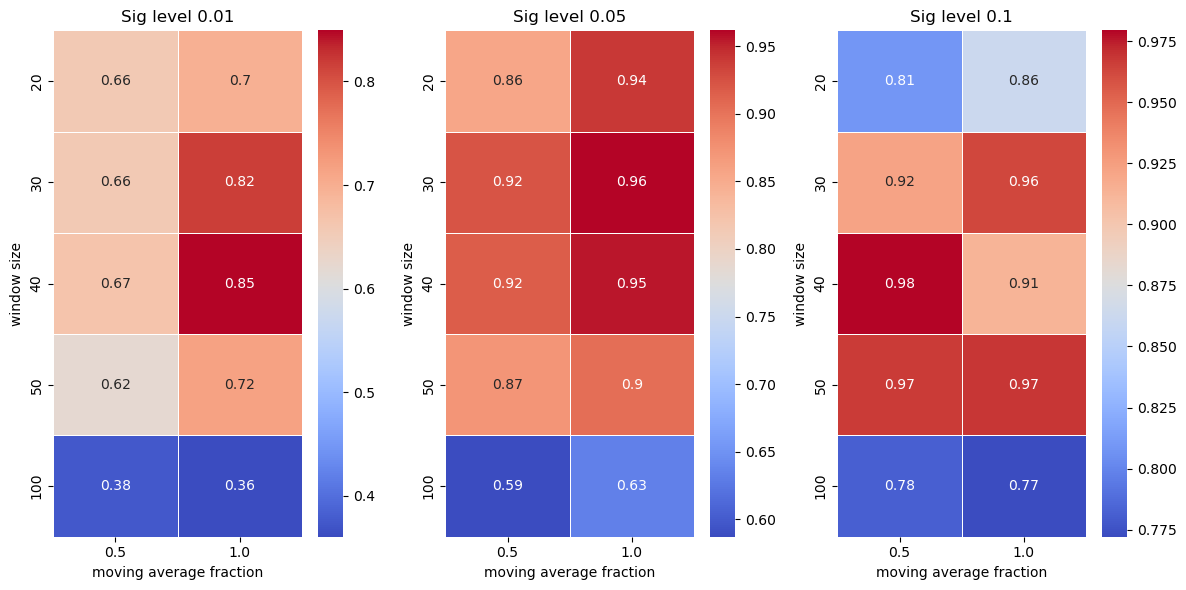

In [127]:
import seaborn as sns



heatmap_data = df3.pivot(index="param1", columns="param2", values="AUC")

# Create heatmap

fig, ax = plt.subplots(1,3,figsize=(12,6))
heatmap_data = df1.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[0])
ax[0].set_xlabel("moving average fraction")
ax[0].set_ylabel("window size")
ax[0].set_title('Sig level 0.01')


heatmap_data = df2.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[1])
ax[1].set_xlabel("moving average fraction")
ax[1].set_ylabel("window size")
ax[1].set_title('Sig level 0.05')


heatmap_data = df3.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[2])
ax[2].set_xlabel("moving average fraction")
ax[2].set_ylabel("window size")
ax[2].set_title('Sig level 0.1')


fig.tight_layout()
fig.savefig('GS-MNIST.png')

In [109]:
##### Occupancy

import os 
file_name = 'Occupancy.csv'

file_path = os.path.normpath(os.path.join(os.getcwd(),"datasets/Occupancy",file_name))

Occupancy = pd.read_csv(file_path).iloc[:,1:]

Targets = pd.read_csv(os.path.normpath(os.path.join(os.getcwd(),"datasets/Occupancy/OccupancyTargets.csv"))).iloc[:,1:]

GroundTruth = list(Targets.to_numpy().flatten())

Occupancy.head()

,Temperature,Humidity,Light,CO2
0,23.18,27.2720,426.0,721.25
1,23.15,27.2675,429.5,714.00
2,23.15,27.2450,426.0,713.50
3,23.15,27.2000,426.0,708.25
4,23.10,27.2000,426.0,704.50


In [113]:
Window  =[200,300,400,500,600]
lookbacks = [0.25,0.5,0.75,1]
sigma = [0.01,0.05,0.1]

params_occ = list(product(Window,lookbacks,sigma))

In [117]:
METRICS_OCC = {}
for setting in params_occ:
    METRICS_OCC[setting] = {}
    w,history,sig = setting
    lookback = int(history*w)
    print(w,lookback,sig)
    detector = SWDCP(data=Occupancy.to_numpy().astype(np.float32),window_length=w,max_history=lookback,significance=sig)
    detector.process_dataloader(p=2,n_theta=1000,seed=2025)
    f1_run, covering_score, auc_score,fp_run,delay= detector.evaluate(GroundTruth,30)
    METRICS_OCC[setting] = {'F1':f1_run,'AUC':auc_score,'Cov':covering_score,'DD':delay[1],'FP':fp_run}
    print(METRICS_OCC[setting])


200 50 0.01


  8%|▊         | 645/7944 [00:08<01:28, 82.18it/s]

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1267/7944 [00:15<01:16, 87.32it/s]

Change detected at: 1458 
Initiate new segment


 26%|██▌       | 2084/7944 [00:24<01:13, 79.50it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2395/7944 [00:28<01:11, 77.95it/s]

Change detected at: 2586 
Initiate new segment


 34%|███▍      | 2720/7944 [00:32<00:57, 90.50it/s]

Change detected at: 2904 
Initiate new segment


 45%|████▌     | 3591/7944 [00:41<00:47, 91.88it/s] 

Change detected at: 3783 
Initiate new segment


 49%|████▉     | 3878/7944 [00:44<00:44, 92.03it/s] 

Change detected at: 4065 
Initiate new segment


 63%|██████▎   | 5015/7944 [00:55<00:19, 149.79it/s]

Change detected at: 5190 
Initiate new segment


 64%|██████▍   | 5093/7944 [00:55<00:18, 153.44it/s]

Change detected at: 5263 
Initiate new segment


 66%|██████▌   | 5262/7944 [00:57<00:23, 112.14it/s]

Change detected at: 5451 
Initiate new segment


 79%|███████▉  | 6279/7944 [01:06<00:11, 143.61it/s]

Change detected at: 6454 
Initiate new segment


 81%|████████  | 6410/7944 [01:07<00:09, 157.71it/s]

Change detected at: 6594 
Initiate new segment


 82%|████████▏ | 6475/7944 [01:07<00:09, 148.17it/s]

Change detected at: 6655 
Initiate new segment


 89%|████████▉ | 7085/7944 [01:13<00:08, 105.53it/s]

Change detected at: 7269 
Initiate new segment


 99%|█████████▊| 7831/7944 [01:20<00:01, 97.65it/s] 

Change detected at: 8020 
Initiate new segment


 99%|█████████▉| 7900/7944 [01:20<00:00, 103.08it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:21<00:00, 97.58it/s] 


F1 score: 0.5333333333333333
Covering: 0.7827319592383971
0.5429864253393666
{'F1': 0.5333333333333333, 'AUC': 0.5429864253393666, 'Cov': 0.7827319592383971, 'DD': 82.8125, 'FP': 9}
200 50 0.05


  6%|▋         | 504/7944 [00:04<01:11, 103.53it/s]

Change detected at: 684 
Initiate new segment


  8%|▊         | 644/7944 [00:06<01:09, 105.37it/s]

Change detected at: 828 
Initiate new segment


 12%|█▏        | 985/7944 [00:09<01:11, 97.30it/s] 

Change detected at: 1170 
Initiate new segment


 16%|█▌        | 1267/7944 [00:12<01:10, 95.36it/s]

Change detected at: 1455 
Initiate new segment


 26%|██▌       | 2064/7944 [00:20<00:59, 98.31it/s] 

Change detected at: 2251 
Initiate new segment
Change detected at: 2270 
Initiate new segment


 30%|███       | 2399/7944 [00:24<00:56, 98.67it/s] 

Change detected at: 2585 
Initiate new segment


 34%|███▍      | 2713/7944 [00:27<00:50, 103.64it/s]

Change detected at: 2901 
Initiate new segment


 45%|████▌     | 3586/7944 [00:36<00:44, 97.93it/s] 

Change detected at: 3774 
Initiate new segment


 49%|████▉     | 3881/7944 [00:38<00:38, 104.48it/s]

Change detected at: 4062 
Initiate new segment


 60%|█████▉    | 4764/7944 [00:47<00:32, 99.21it/s] 

Change detected at: 4953 
Initiate new segment
Change detected at: 4957 
Initiate new segment


 63%|██████▎   | 5000/7944 [00:49<00:28, 103.74it/s]

Change detected at: 5188 
Initiate new segment


 64%|██████▍   | 5078/7944 [00:50<00:28, 99.48it/s] 

Change detected at: 5261 
Initiate new segment


 66%|██████▌   | 5250/7944 [00:52<00:28, 93.09it/s] 

Change detected at: 5437 
Initiate new segment


 79%|███████▉  | 6268/7944 [01:02<00:16, 101.34it/s]

Change detected at: 6448 
Initiate new segment


 81%|████████  | 6406/7944 [01:04<00:15, 96.20it/s] 

Change detected at: 6588 
Initiate new segment


 81%|████████▏ | 6466/7944 [01:05<00:15, 96.36it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6882/7944 [01:09<00:10, 100.06it/s]

Change detected at: 7071 
Initiate new segment


 89%|████████▉ | 7077/7944 [01:11<00:08, 101.03it/s]

Change detected at: 7257 
Initiate new segment


 98%|█████████▊| 7822/7944 [01:18<00:01, 101.33it/s]

Change detected at: 8003 
Initiate new segment
Change detected at: 8010 
Initiate new segment


 99%|█████████▉| 7898/7944 [01:19<00:00, 95.18it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:19<00:00, 99.72it/s]


F1 score: 0.43243243243243246
Covering: 0.6932671628306439
0.47435897435897434
{'F1': 0.43243243243243246, 'AUC': 0.47435897435897434, 'Cov': 0.6932671628306439, 'DD': 106.52173913043478, 'FP': 15}
200 50 0.1


  6%|▌         | 477/7944 [00:04<01:17, 96.84it/s] 

Change detected at: 665 
Initiate new segment


  8%|▊         | 645/7944 [00:06<01:13, 98.70it/s]

Change detected at: 828 
Initiate new segment


 12%|█▏        | 974/7944 [00:09<01:10, 98.81it/s] 

Change detected at: 1164 
Initiate new segment


 16%|█▌        | 1273/7944 [00:12<01:03, 105.11it/s]

Change detected at: 1452 
Initiate new segment


 26%|██▌       | 2045/7944 [00:19<00:38, 153.87it/s]

Change detected at: 2228 
Initiate new segment
Change detected at: 2233 
Initiate new segment
Change detected at: 2240 
Initiate new segment


 26%|██▋       | 2093/7944 [00:20<00:38, 153.60it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2393/7944 [00:22<00:48, 115.41it/s]

Change detected at: 2584 
Initiate new segment


 34%|███▍      | 2710/7944 [00:25<00:56, 92.99it/s] 

Change detected at: 2900 
Initiate new segment


 42%|████▏     | 3373/7944 [00:32<00:49, 92.72it/s] 

Change detected at: 3564 
Initiate new segment


 45%|████▌     | 3588/7944 [00:34<00:41, 105.33it/s]

Change detected at: 3766 
Initiate new segment


 49%|████▊     | 3871/7944 [00:37<00:40, 101.21it/s]

Change detected at: 4060 
Initiate new segment


 60%|█████▉    | 4752/7944 [00:46<00:31, 102.41it/s]

Change detected at: 4936 
Initiate new segment
Change detected at: 4946 
Initiate new segment
Change detected at: 4951 
Initiate new segment


 60%|██████    | 4774/7944 [00:46<00:31, 102.22it/s]

Change detected at: 4964 
Initiate new segment


 63%|██████▎   | 5002/7944 [00:49<00:29, 99.52it/s] 

Change detected at: 5187 
Initiate new segment


 66%|██████▌   | 5245/7944 [00:52<00:34, 77.46it/s] 

Change detected at: 5434 
Initiate new segment


 68%|██████▊   | 5429/7944 [00:54<00:32, 78.05it/s]

Change detected at: 5619 
Initiate new segment


 75%|███████▌  | 5981/7944 [01:00<00:19, 100.08it/s]

Change detected at: 6172 
Initiate new segment


 79%|███████▊  | 6255/7944 [01:03<00:20, 83.09it/s] 

Change detected at: 6447 
Initiate new segment


 81%|████████  | 6396/7944 [01:04<00:17, 89.66it/s]

Change detected at: 6587 
Initiate new segment


 81%|████████▏ | 6469/7944 [01:05<00:16, 90.21it/s]

Change detected at: 6655 
Initiate new segment


 85%|████████▌ | 6783/7944 [01:08<00:11, 99.02it/s] 

Change detected at: 6969 
Initiate new segment


 87%|████████▋ | 6883/7944 [01:09<00:10, 104.21it/s]

Change detected at: 7066 
Initiate new segment


 89%|████████▉ | 7075/7944 [01:11<00:09, 95.99it/s] 

Change detected at: 7253 
Initiate new segment


 98%|█████████▊| 7811/7944 [01:16<00:01, 127.03it/s]

Change detected at: 7995 
Initiate new segment


 99%|█████████▉| 7863/7944 [01:17<00:00, 114.19it/s]

Change detected at: 8045 
Initiate new segment


 99%|█████████▉| 7898/7944 [01:17<00:00, 108.20it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:18<00:00, 101.70it/s]


F1 score: 0.4090909090909091
Covering: 0.6449791680291351
0.4913151364764268
{'F1': 0.4090909090909091, 'AUC': 0.4913151364764268, 'Cov': 0.6449791680291351, 'DD': 130.5, 'FP': 22}
200 100 0.01


  8%|▊         | 645/7944 [00:06<01:14, 98.24it/s] 

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1280/7944 [00:12<01:05, 101.49it/s]

Change detected at: 1464 
Initiate new segment


 26%|██▌       | 2070/7944 [00:20<00:57, 102.88it/s]

Change detected at: 2248 
Initiate new segment


 26%|██▋       | 2093/7944 [00:20<00:55, 106.22it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2408/7944 [00:23<00:57, 95.61it/s] 

Change detected at: 2589 
Initiate new segment


 34%|███▍      | 2721/7944 [00:27<00:55, 94.30it/s]

Change detected at: 2910 
Initiate new segment


 45%|████▌     | 3582/7944 [00:35<00:41, 105.92it/s]

Change detected at: 3767 
Initiate new segment


 49%|████▉     | 3893/7944 [00:37<00:31, 129.20it/s]

Change detected at: 4074 
Initiate new segment


 63%|██████▎   | 5007/7944 [00:47<00:28, 101.46it/s]

Change detected at: 5191 
Initiate new segment


 66%|██████▋   | 5271/7944 [00:49<00:26, 99.71it/s] 

Change detected at: 5453 
Initiate new segment


 79%|███████▉  | 6280/7944 [00:57<00:12, 135.77it/s]

Change detected at: 6467 
Initiate new segment


 81%|████████  | 6412/7944 [00:58<00:11, 127.77it/s]

Change detected at: 6600 
Initiate new segment


 87%|████████▋ | 6902/7944 [01:04<00:11, 93.24it/s] 

Change detected at: 7089 
Initiate new segment


 89%|████████▉ | 7090/7944 [01:06<00:09, 88.03it/s] 

Change detected at: 7278 
Initiate new segment


 99%|█████████▊| 7842/7944 [01:13<00:01, 89.90it/s] 

Change detected at: 8024 
Initiate new segment
Change detected at: 8031 
Initiate new segment


100%|█████████▉| 7906/7944 [01:14<00:00, 96.48it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:15<00:00, 105.89it/s]


F1 score: 0.5161290322580646
Covering: 0.7793320648897838
0.5299145299145299
{'F1': 0.5161290322580646, 'AUC': 0.5299145299145299, 'Cov': 0.7793320648897838, 'DD': 84.17647058823529, 'FP': 9}
200 100 0.05


  7%|▋         | 528/7944 [00:05<01:17, 95.58it/s] 

Change detected at: 712 
Initiate new segment


  8%|▊         | 640/7944 [00:06<01:14, 97.88it/s] 

Change detected at: 828 
Initiate new segment


 12%|█▏        | 987/7944 [00:10<01:09, 100.35it/s]

Change detected at: 1174 
Initiate new segment


 16%|█▌        | 1272/7944 [00:12<01:05, 102.36it/s]

Change detected at: 1460 
Initiate new segment


 26%|██▌       | 2048/7944 [00:21<01:02, 94.37it/s] 

Change detected at: 2235 
Initiate new segment
Change detected at: 2239 
Initiate new segment


 26%|██▌       | 2080/7944 [00:21<01:04, 90.65it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2400/7944 [00:25<00:59, 93.66it/s] 

Change detected at: 2587 
Initiate new segment


 34%|███▍      | 2725/7944 [00:28<00:53, 96.73it/s] 

Change detected at: 2905 
Initiate new segment


 43%|████▎     | 3381/7944 [00:34<00:43, 105.54it/s]

Change detected at: 3564 
Initiate new segment


 45%|████▍     | 3563/7944 [00:36<00:42, 102.04it/s]

Change detected at: 3742 
Initiate new segment


 49%|████▉     | 3877/7944 [00:40<00:46, 87.21it/s] 

Change detected at: 4068 
Initiate new segment


 60%|██████    | 4767/7944 [00:49<00:33, 95.55it/s] 

Change detected at: 4952 
Initiate new segment


 60%|██████    | 4787/7944 [00:49<00:32, 97.37it/s]

Change detected at: 4973 
Initiate new segment


 63%|██████▎   | 4998/7944 [00:52<00:33, 86.92it/s]

Change detected at: 5189 
Initiate new segment


 66%|██████▌   | 5261/7944 [00:55<00:25, 103.25it/s]

Change detected at: 5449 
Initiate new segment


 69%|██████▉   | 5466/7944 [00:57<00:25, 96.05it/s] 

Change detected at: 5648 
Initiate new segment


 75%|███████▌  | 5997/7944 [01:02<00:19, 98.42it/s] 

Change detected at: 6184 
Initiate new segment


 79%|███████▉  | 6271/7944 [01:05<00:18, 92.24it/s] 

Change detected at: 6457 
Initiate new segment


 81%|████████  | 6407/7944 [01:07<00:18, 83.77it/s] 

Change detected at: 6596 
Initiate new segment


 87%|████████▋ | 6894/7944 [01:12<00:10, 102.76it/s]

Change detected at: 7078 
Initiate new segment


 89%|████████▉ | 7073/7944 [01:14<00:08, 102.73it/s]

Change detected at: 7267 
Initiate new segment


 99%|█████████▊| 7826/7944 [01:21<00:01, 79.80it/s] 

Change detected at: 8018 
Initiate new segment


 99%|█████████▉| 7898/7944 [01:22<00:00, 86.56it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:23<00:00, 95.30it/s]


F1 score: 0.4210526315789474
Covering: 0.671738480506799
0.46769230769230774
{'F1': 0.4210526315789474, 'AUC': 0.46769230769230774, 'Cov': 0.671738480506799, 'DD': 123.25, 'FP': 17}
200 100 0.1


  6%|▋         | 498/7944 [00:05<01:18, 95.13it/s] 

Change detected at: 685 
Initiate new segment


  7%|▋         | 562/7944 [00:05<01:16, 96.41it/s]

Change detected at: 750 
Initiate new segment


  8%|▊         | 646/7944 [00:06<01:19, 91.54it/s]

Change detected at: 828 
Initiate new segment


 12%|█▏        | 980/7944 [00:10<01:16, 90.95it/s] 

Change detected at: 1169 
Initiate new segment


 16%|█▌        | 1267/7944 [00:13<01:06, 100.39it/s]

Change detected at: 1457 
Initiate new segment


 26%|██▌       | 2039/7944 [00:21<01:12, 82.00it/s] 

Change detected at: 2228 
Initiate new segment


 26%|██▌       | 2084/7944 [00:21<00:59, 98.20it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2397/7944 [00:25<00:56, 98.98it/s] 

Change detected at: 2586 
Initiate new segment


 34%|███▍      | 2713/7944 [00:28<00:57, 90.38it/s] 

Change detected at: 2903 
Initiate new segment


 42%|████▏     | 3302/7944 [00:34<00:45, 102.65it/s]

Change detected at: 3485 
Initiate new segment
Change detected at: 3492 
Initiate new segment


 42%|████▏     | 3324/7944 [00:34<00:46, 98.65it/s] 

Change detected at: 3506 
Initiate new segment


 42%|████▏     | 3346/7944 [00:35<00:47, 96.52it/s]

Change detected at: 3534 
Initiate new segment
Change detected at: 3544 
Initiate new segment


 43%|████▎     | 3402/7944 [00:35<00:49, 92.63it/s] 

Change detected at: 3588 
Initiate new segment


 44%|████▍     | 3522/7944 [00:36<00:50, 87.18it/s] 

Change detected at: 3706 
Initiate new segment


 49%|████▉     | 3875/7944 [00:40<00:39, 101.91it/s]

Change detected at: 4065 
Initiate new segment


 60%|█████▉    | 4748/7944 [00:49<00:32, 98.50it/s] 

Change detected at: 4936 
Initiate new segment
Change detected at: 4944 
Initiate new segment
Change detected at: 4949 
Initiate new segment


 61%|██████    | 4815/7944 [00:50<00:31, 100.25it/s]

Change detected at: 5001 
Initiate new segment
Change detected at: 5017 
Initiate new segment


 63%|██████▎   | 4996/7944 [00:52<00:35, 82.58it/s] 

Change detected at: 5187 
Initiate new segment


 66%|██████▌   | 5253/7944 [00:54<00:29, 91.98it/s] 

Change detected at: 5442 
Initiate new segment


 69%|██████▊   | 5448/7944 [00:56<00:26, 95.92it/s] 

Change detected at: 5638 
Initiate new segment


 75%|███████▌  | 5995/7944 [01:02<00:20, 95.37it/s] 

Change detected at: 6176 
Initiate new segment


 79%|███████▉  | 6267/7944 [01:05<00:17, 95.59it/s] 

Change detected at: 6453 
Initiate new segment


 81%|████████  | 6404/7944 [01:07<00:16, 92.61it/s]

Change detected at: 6594 
Initiate new segment


 87%|████████▋ | 6889/7944 [01:12<00:10, 103.63it/s]

Change detected at: 7073 
Initiate new segment


 89%|████████▉ | 7072/7944 [01:13<00:10, 85.77it/s] 

Change detected at: 7261 
Initiate new segment


 99%|█████████▊| 7825/7944 [01:21<00:01, 90.97it/s] 

Change detected at: 8014 
Initiate new segment


 99%|█████████▉| 7898/7944 [01:22<00:00, 92.40it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:23<00:00, 95.54it/s]


F1 score: 0.30434782608695654
Covering: 0.6507386779308331
0.3752913752913753
{'F1': 0.30434782608695654, 'AUC': 0.3752913752913753, 'Cov': 0.6507386779308331, 'DD': 151.25, 'FP': 26}
200 150 0.01


  8%|▊         | 648/7944 [00:06<01:13, 99.61it/s] 

Change detected at: 828 
Initiate new segment


 13%|█▎        | 1041/7944 [00:10<01:12, 95.67it/s]

Change detected at: 1228 
Initiate new segment


 16%|█▋        | 1291/7944 [00:13<01:06, 100.05it/s]

Change detected at: 1471 
Initiate new segment


 26%|██▌       | 2080/7944 [00:21<00:58, 100.28it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2406/7944 [00:24<00:55, 100.49it/s]

Change detected at: 2591 
Initiate new segment


 32%|███▏      | 2507/7944 [00:25<00:53, 101.14it/s]

Change detected at: 2696 
Initiate new segment


 34%|███▍      | 2731/7944 [00:27<00:53, 97.06it/s] 

Change detected at: 2917 
Initiate new segment


 45%|████▌     | 3582/7944 [00:35<00:44, 98.82it/s] 

Change detected at: 3760 
Initiate new segment


 49%|████▉     | 3900/7944 [00:38<00:40, 100.91it/s]

Change detected at: 4080 
Initiate new segment


 60%|██████    | 4787/7944 [00:45<00:31, 100.68it/s]

Change detected at: 4975 
Initiate new segment


 63%|██████▎   | 5009/7944 [00:48<00:29, 98.85it/s] 

Change detected at: 5192 
Initiate new segment


 66%|██████▋   | 5269/7944 [00:50<00:27, 95.80it/s] 

Change detected at: 5454 
Initiate new segment


 79%|███████▉  | 6297/7944 [01:02<00:18, 90.14it/s] 

Change detected at: 6488 
Initiate new segment


 81%|████████  | 6420/7944 [01:03<00:20, 75.51it/s]

Change detected at: 6608 
Initiate new segment


 87%|████████▋ | 6903/7944 [01:08<00:11, 92.40it/s] 

Change detected at: 7090 
Initiate new segment


 89%|████████▉ | 7101/7944 [01:10<00:07, 106.87it/s]

Change detected at: 7288 
Initiate new segment


 99%|█████████▉| 7856/7944 [01:18<00:00, 102.48it/s]

Change detected at: 8046 
Initiate new segment


 99%|█████████▉| 7901/7944 [01:18<00:00, 101.09it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:19<00:00, 100.53it/s]


F1 score: 0.5
Covering: 0.7405589670143159
0.5182186234817814
{'F1': 0.5, 'AUC': 0.5182186234817814, 'Cov': 0.7405589670143159, 'DD': 107.61111111111111, 'FP': 11}
200 150 0.05


  7%|▋         | 536/7944 [00:05<01:17, 96.16it/s] 

Change detected at: 719 
Initiate new segment
Change detected at: 740 
Initiate new segment


  7%|▋         | 546/7944 [00:05<01:16, 97.08it/s]

Change detected at: 745 
Initiate new segment


  8%|▊         | 652/7944 [00:06<00:55, 131.31it/s]

Change detected at: 828 
Initiate new segment


 13%|█▎        | 1002/7944 [00:09<01:12, 95.52it/s]

Change detected at: 1191 
Initiate new segment


 16%|█▌        | 1282/7944 [00:12<01:04, 103.20it/s]

Change detected at: 1464 
Initiate new segment


 26%|██▌       | 2061/7944 [00:20<01:08, 85.64it/s] 

Change detected at: 2246 
Initiate new segment


 26%|██▌       | 2083/7944 [00:20<01:02, 93.04it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2399/7944 [00:23<00:58, 94.61it/s] 

Change detected at: 2589 
Initiate new segment


 34%|███▍      | 2723/7944 [00:27<00:54, 95.27it/s] 

Change detected at: 2911 
Initiate new segment


 42%|████▏     | 3321/7944 [00:33<00:48, 95.46it/s] 

Change detected at: 3508 
Initiate new segment


 42%|████▏     | 3353/7944 [00:33<00:46, 99.02it/s]

Change detected at: 3534 
Initiate new segment
Change detected at: 3543 
Initiate new segment


 45%|████▍     | 3557/7944 [00:35<00:44, 97.51it/s] 

Change detected at: 3736 
Initiate new segment


 49%|████▉     | 3882/7944 [00:38<00:41, 98.77it/s] 

Change detected at: 4074 
Initiate new segment


 60%|██████    | 4776/7944 [00:47<00:29, 106.92it/s]

Change detected at: 4952 
Initiate new segment
Change detected at: 4971 
Initiate new segment


 61%|██████    | 4809/7944 [00:48<00:32, 97.07it/s] 

Change detected at: 5000 
Initiate new segment


 61%|██████    | 4854/7944 [00:48<00:30, 100.22it/s]

Change detected at: 5033 
Initiate new segment


 63%|██████▎   | 5006/7944 [00:50<00:30, 95.80it/s] 

Change detected at: 5189 
Initiate new segment


 65%|██████▌   | 5183/7944 [00:51<00:26, 102.72it/s]

Change detected at: 5368 
Initiate new segment


 66%|██████▋   | 5266/7944 [00:52<00:28, 95.44it/s] 

Change detected at: 5452 
Initiate new segment


 76%|███████▌  | 6010/7944 [01:00<00:20, 93.41it/s] 

Change detected at: 6199 
Initiate new segment


 79%|███████▉  | 6277/7944 [01:03<00:15, 104.40it/s]

Change detected at: 6465 
Initiate new segment


 81%|████████  | 6408/7944 [01:04<00:16, 94.34it/s] 

Change detected at: 6599 
Initiate new segment


 87%|████████▋ | 6889/7944 [01:09<00:10, 104.48it/s]

Change detected at: 7074 
Initiate new segment


 89%|████████▉ | 7094/7944 [01:11<00:08, 102.38it/s]

Change detected at: 7274 
Initiate new segment


 99%|█████████▊| 7832/7944 [01:18<00:01, 99.46it/s] 

Change detected at: 8022 
Initiate new segment


100%|██████████| 7944/7944 [01:19<00:00, 100.00it/s]


F1 score: 0.3333333333333333
Covering: 0.6493597618204999
0.38992042440318303
{'F1': 0.3333333333333333, 'AUC': 0.38992042440318303, 'Cov': 0.6493597618204999, 'DD': 141.28571428571428, 'FP': 21}
200 150 0.1


  7%|▋         | 529/7944 [00:05<01:17, 95.19it/s] 

Change detected at: 713 
Initiate new segment


  8%|▊         | 649/7944 [00:06<01:17, 93.73it/s]

Change detected at: 828 
Initiate new segment


 12%|█▏        | 985/7944 [00:09<01:12, 95.78it/s] 

Change detected at: 1175 
Initiate new segment


 16%|█▌        | 1272/7944 [00:13<01:12, 91.74it/s]

Change detected at: 1461 
Initiate new segment


 26%|██▌       | 2050/7944 [00:20<00:56, 105.01it/s]

Change detected at: 2240 
Initiate new segment


 26%|██▌       | 2083/7944 [00:20<00:56, 103.08it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2399/7944 [00:24<00:55, 99.48it/s] 

Change detected at: 2587 
Initiate new segment


 34%|███▍      | 2723/7944 [00:27<00:50, 102.39it/s]

Change detected at: 2908 
Initiate new segment


 41%|████▏     | 3294/7944 [00:32<00:48, 96.28it/s] 

Change detected at: 3485 
Initiate new segment
Change detected at: 3491 
Initiate new segment


 42%|████▏     | 3315/7944 [00:33<00:47, 97.67it/s]

Change detected at: 3505 
Initiate new segment


 42%|████▏     | 3347/7944 [00:33<00:47, 96.67it/s]

Change detected at: 3531 
Initiate new segment


 44%|████▍     | 3523/7944 [00:35<00:48, 90.51it/s] 

Change detected at: 3706 
Initiate new segment
Change detected at: 3709 
Initiate new segment
Change detected at: 3712 
Initiate new segment


 49%|████▉     | 3885/7944 [00:39<00:39, 102.89it/s]

Change detected at: 4070 
Initiate new segment


 60%|█████▉    | 4745/7944 [00:47<00:35, 91.10it/s] 

Change detected at: 4936 
Initiate new segment
Change detected at: 4944 
Initiate new segment
Change detected at: 4949 
Initiate new segment


 60%|██████    | 4805/7944 [00:48<00:35, 88.28it/s]

Change detected at: 4994 
Initiate new segment


 63%|██████▎   | 4998/7944 [00:50<00:29, 99.00it/s] 

Change detected at: 5188 
Initiate new segment


 65%|██████▌   | 5179/7944 [00:52<00:26, 102.42it/s]

Change detected at: 5367 
Initiate new segment


 66%|██████▋   | 5269/7944 [00:53<00:26, 100.44it/s]

Change detected at: 5449 
Initiate new segment


 75%|███████▌  | 5996/7944 [01:00<00:19, 99.24it/s] 

Change detected at: 6184 
Initiate new segment


 79%|███████▉  | 6273/7944 [01:03<00:16, 99.49it/s]

Change detected at: 6459 
Initiate new segment


 81%|████████  | 6417/7944 [01:05<00:15, 101.49it/s]

Change detected at: 6597 
Initiate new segment


 87%|████████▋ | 6890/7944 [01:08<00:06, 171.63it/s]

Change detected at: 7069 
Initiate new segment


 89%|████████▉ | 7094/7944 [01:09<00:04, 176.28it/s]

Change detected at: 7268 
Initiate new segment


 99%|█████████▉| 7848/7944 [01:15<00:00, 151.22it/s]

Change detected at: 8020 
Initiate new segment


100%|██████████| 7944/7944 [01:16<00:00, 104.05it/s]


F1 score: 0.27906976744186046
Covering: 0.6378445472387813
0.3307692307692308
{'F1': 0.27906976744186046, 'AUC': 0.3307692307692308, 'Cov': 0.6378445472387813, 'DD': 149.6551724137931, 'FP': 24}
200 200 0.01


  8%|▊         | 643/7944 [00:04<01:08, 106.42it/s]

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1286/7944 [00:11<01:04, 103.47it/s]

Change detected at: 1474 
Initiate new segment


 26%|██▌       | 2081/7944 [00:18<00:58, 99.98it/s] 

Change detected at: 2270 
Initiate new segment


 30%|███       | 2415/7944 [00:22<00:55, 100.26it/s]

Change detected at: 2594 
Initiate new segment


 32%|███▏      | 2513/7944 [00:23<00:55, 97.10it/s] 

Change detected at: 2697 
Initiate new segment


 34%|███▍      | 2739/7944 [00:25<00:47, 109.14it/s]

Change detected at: 2922 
Initiate new segment


 42%|████▏     | 3366/7944 [00:31<00:47, 96.84it/s] 

Change detected at: 3554 
Initiate new segment


 45%|████▍     | 3572/7944 [00:33<00:43, 100.90it/s]

Change detected at: 3755 
Initiate new segment
Change detected at: 3760 
Initiate new segment


 49%|████▉     | 3900/7944 [00:37<00:40, 100.47it/s]

Change detected at: 4087 
Initiate new segment


 61%|██████    | 4816/7944 [00:46<00:32, 97.27it/s] 

Change detected at: 5003 
Initiate new segment
Change detected at: 5017 
Initiate new segment


 63%|██████▎   | 5013/7944 [00:48<00:29, 99.55it/s] 

Change detected at: 5193 
Initiate new segment


 66%|██████▋   | 5274/7944 [00:50<00:29, 90.31it/s] 

Change detected at: 5455 
Initiate new segment


 68%|██████▊   | 5425/7944 [00:52<00:24, 104.23it/s]

Change detected at: 5606 
Initiate new segment


 80%|███████▉  | 6319/7944 [01:01<00:15, 103.72it/s]

Change detected at: 6499 
Initiate new segment
Change detected at: 6507 
Initiate new segment


 81%|████████  | 6418/7944 [01:02<00:16, 92.94it/s] 

Change detected at: 6607 
Initiate new segment


 87%|████████▋ | 6902/7944 [01:07<00:10, 96.39it/s] 

Change detected at: 7086 
Initiate new segment


 90%|████████▉ | 7111/7944 [01:09<00:08, 103.01it/s]

Change detected at: 7298 
Initiate new segment


 99%|█████████▉| 7868/7944 [01:16<00:00, 96.63it/s] 

Change detected at: 8054 
Initiate new segment


 99%|█████████▉| 7902/7944 [01:17<00:00, 102.36it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7944/7944 [01:17<00:00, 102.24it/s]


F1 score: 0.4444444444444444
Covering: 0.7584580304660872
0.4816053511705686
{'F1': 0.4444444444444444, 'AUC': 0.4816053511705686, 'Cov': 0.7584580304660872, 'DD': 106.5909090909091, 'FP': 14}
200 200 0.05


  7%|▋         | 566/7944 [00:05<01:15, 97.68it/s] 

Change detected at: 751 
Initiate new segment
Change detected at: 771 
Initiate new segment


  7%|▋         | 587/7944 [00:05<01:14, 99.00it/s]

Change detected at: 777 
Initiate new segment


 13%|█▎        | 1029/7944 [00:10<01:09, 99.95it/s] 

Change detected at: 1217 
Initiate new segment


 16%|█▌        | 1282/7944 [00:12<01:03, 104.13it/s]

Change detected at: 1467 
Initiate new segment


 26%|██▌       | 2066/7944 [00:20<00:59, 98.37it/s] 

Change detected at: 2251 
Initiate new segment
Change detected at: 2253 
Initiate new segment


 26%|██▋       | 2088/7944 [00:20<00:59, 99.02it/s] 

Change detected at: 2270 
Initiate new segment


 30%|███       | 2405/7944 [00:23<00:55, 98.95it/s] 

Change detected at: 2590 
Initiate new segment


 34%|███▍      | 2732/7944 [00:27<00:53, 97.52it/s] 

Change detected at: 2913 
Initiate new segment


 42%|████▏     | 3328/7944 [00:33<00:49, 92.78it/s] 

Change detected at: 3509 
Initiate new segment


 42%|████▏     | 3351/7944 [00:33<00:47, 97.20it/s]

Change detected at: 3534 
Initiate new segment


 44%|████▍     | 3530/7944 [00:35<00:43, 100.36it/s]

Change detected at: 3715 
Initiate new segment
Change detected at: 3728 
Initiate new segment


 49%|████▉     | 3895/7944 [00:39<00:40, 100.25it/s]

Change detected at: 4078 
Initiate new segment


 60%|██████    | 4769/7944 [00:48<00:31, 101.32it/s]

Change detected at: 4952 
Initiate new segment
Change detected at: 4972 
Initiate new segment


 61%|██████    | 4815/7944 [00:48<00:30, 101.88it/s]

Change detected at: 4998 
Initiate new segment


 63%|██████▎   | 5000/7944 [00:50<00:31, 94.28it/s] 

Change detected at: 5190 
Initiate new segment


 66%|██████▋   | 5267/7944 [00:53<00:27, 96.87it/s] 

Change detected at: 5452 
Initiate new segment


 68%|██████▊   | 5407/7944 [00:54<00:25, 98.08it/s]

Change detected at: 5586 
Initiate new segment
Change detected at: 5589 
Initiate new segment


 76%|███████▌  | 6035/7944 [01:01<00:18, 104.71it/s]

Change detected at: 6221 
Initiate new segment


 79%|███████▉  | 6291/7944 [01:03<00:16, 99.98it/s] 

Change detected at: 6474 
Initiate new segment


 81%|████████  | 6412/7944 [01:04<00:15, 97.91it/s] 

Change detected at: 6599 
Initiate new segment


 87%|████████▋ | 6887/7944 [01:09<00:10, 103.51it/s]

Change detected at: 7076 
Initiate new segment


 89%|████████▉ | 7099/7944 [01:11<00:08, 103.87it/s]

Change detected at: 7280 
Initiate new segment


 99%|█████████▉| 7858/7944 [01:19<00:00, 102.10it/s]

Change detected at: 8039 
Initiate new segment
Change detected at: 8044 
Initiate new segment


 99%|█████████▉| 7903/7944 [01:19<00:00, 102.73it/s]

Change detected at: 8083 
Initiate new segment


100%|██████████| 7944/7944 [01:19<00:00, 99.40it/s] 


F1 score: 0.3181818181818182
Covering: 0.6748142672861983
0.38213399503722084
{'F1': 0.3181818181818182, 'AUC': 0.38213399503722084, 'Cov': 0.6748142672861983, 'DD': 124.16666666666667, 'FP': 21}
200 200 0.1


  7%|▋         | 530/7944 [00:05<01:14, 99.56it/s] 

Change detected at: 719 
Initiate new segment
Change detected at: 722 
Initiate new segment


  7%|▋         | 562/7944 [00:05<01:13, 99.83it/s]

Change detected at: 744 
Initiate new segment


 13%|█▎        | 1009/7944 [00:10<01:09, 100.07it/s]

Change detected at: 1190 
Initiate new segment


 14%|█▍        | 1096/7944 [00:10<01:09, 98.89it/s] 

Change detected at: 1281 
Initiate new segment


 16%|█▌        | 1273/7944 [00:12<01:07, 99.26it/s] 

Change detected at: 1463 
Initiate new segment


 26%|██▌       | 2055/7944 [00:20<00:58, 101.32it/s]

Change detected at: 2246 
Initiate new segment


 26%|██▋       | 2089/7944 [00:20<00:58, 100.54it/s]

Change detected at: 2270 
Initiate new segment


 30%|███       | 2402/7944 [00:24<00:55, 99.81it/s] 

Change detected at: 2589 
Initiate new segment


 34%|███▍      | 2726/7944 [00:27<00:51, 101.85it/s]

Change detected at: 2910 
Initiate new segment


 42%|████▏     | 3307/7944 [00:32<00:44, 104.43it/s]

Change detected at: 3492 
Initiate new segment
Change detected at: 3506 
Initiate new segment


 42%|████▏     | 3340/7944 [00:32<00:45, 100.91it/s]

Change detected at: 3529 
Initiate new segment


 44%|████▍     | 3505/7944 [00:34<00:43, 102.20it/s]

Change detected at: 3691 
Initiate new segment


 49%|████▉     | 3882/7944 [00:38<00:40, 99.58it/s] 

Change detected at: 4074 
Initiate new segment


 60%|█████▉    | 4763/7944 [00:47<00:31, 101.13it/s]

Change detected at: 4945 
Initiate new segment
Change detected at: 4950 
Initiate new segment


 61%|██████    | 4811/7944 [00:47<00:28, 109.28it/s]

Change detected at: 4993 
Initiate new segment


 63%|██████▎   | 5000/7944 [00:49<00:28, 102.00it/s]

Change detected at: 5189 
Initiate new segment


 66%|██████▌   | 5261/7944 [00:52<00:28, 94.82it/s] 

Change detected at: 5449 
Initiate new segment


 76%|███████▌  | 6012/7944 [00:59<00:19, 99.96it/s] 

Change detected at: 6196 
Initiate new segment


 79%|███████▉  | 6283/7944 [01:02<00:15, 104.17it/s]

Change detected at: 6465 
Initiate new segment


 81%|████████  | 6409/7944 [01:03<00:15, 100.41it/s]

Change detected at: 6596 
Initiate new segment


 87%|████████▋ | 6888/7944 [01:08<00:11, 91.34it/s] 

Change detected at: 7071 
Initiate new segment


 89%|████████▉ | 7088/7944 [01:10<00:09, 92.16it/s] 

Change detected at: 7272 
Initiate new segment


 99%|█████████▊| 7836/7944 [01:18<00:01, 98.05it/s] 

Change detected at: 8022 
Initiate new segment


100%|██████████| 7944/7944 [01:19<00:00, 100.23it/s]


F1 score: 0.25
Covering: 0.6477741611624005
0.2849002849002849
{'F1': 0.25, 'AUC': 0.2849002849002849, 'Cov': 0.6477741611624005, 'DD': 151.76923076923077, 'FP': 21}
300 75 0.01


  6%|▌         | 484/7844 [00:04<00:57, 128.77it/s]

Change detected at: 768 
Initiate new segment


  7%|▋         | 553/7844 [00:05<00:56, 130.09it/s]

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1218/7844 [00:11<01:08, 97.37it/s] 

Change detected at: 1504 
Initiate new segment


 25%|██▌       | 1980/7844 [00:18<01:03, 92.22it/s] 

Change detected at: 2270 
Initiate new segment


 45%|████▍     | 3497/7844 [00:35<00:46, 94.41it/s]

Change detected at: 3784 
Initiate new segment


 63%|██████▎   | 4931/7844 [00:50<00:32, 90.18it/s]

Change detected at: 5220 
Initiate new segment


 66%|██████▌   | 5172/7844 [00:53<00:29, 91.95it/s]

Change detected at: 5456 
Initiate new segment


 79%|███████▉  | 6228/7844 [01:04<00:17, 90.07it/s]

Change detected at: 6514 
Initiate new segment


 81%|████████  | 6368/7844 [01:06<00:16, 90.89it/s]

Change detected at: 6655 
Initiate new segment


 99%|█████████▉| 7777/7844 [01:21<00:00, 95.48it/s] 

Change detected at: 8066 
Initiate new segment


100%|██████████| 7844/7844 [01:21<00:00, 95.83it/s]


F1 score: 0.41666666666666663
Covering: 0.6311668120954029
0.4195804195804196
{'F1': 0.41666666666666663, 'AUC': 0.4195804195804196, 'Cov': 0.6311668120954029, 'DD': 63.7, 'FP': 6}
300 75 0.05


  6%|▌         | 458/7844 [00:05<01:31, 80.32it/s]

Change detected at: 747 
Initiate new segment


  7%|▋         | 544/7844 [00:06<01:21, 89.20it/s]

Change detected at: 828 
Initiate new segment


 15%|█▌        | 1206/7844 [00:13<01:13, 89.83it/s]

Change detected at: 1494 
Initiate new segment


 25%|██▌       | 1979/7844 [00:22<01:05, 89.06it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2672/7844 [00:28<00:50, 101.73it/s]

Change detected at: 2959 
Initiate new segment


 41%|████▏     | 3241/7844 [00:33<00:36, 124.52it/s]

Change detected at: 3522 
Initiate new segment


 45%|████▍     | 3493/7844 [00:35<00:35, 121.93it/s]

Change detected at: 3771 
Initiate new segment


 63%|██████▎   | 4913/7844 [00:51<00:34, 85.18it/s] 

Change detected at: 5201 
Initiate new segment


 66%|██████▌   | 5164/7844 [00:54<00:29, 92.25it/s]

Change detected at: 5453 
Initiate new segment


 69%|██████▉   | 5400/7844 [00:57<00:25, 95.80it/s]

Change detected at: 5689 
Initiate new segment


 79%|███████▉  | 6218/7844 [01:05<00:13, 121.13it/s]

Change detected at: 6506 
Initiate new segment


 81%|████████  | 6362/7844 [01:06<00:12, 117.06it/s]

Change detected at: 6650 
Initiate new segment


 87%|████████▋ | 6838/7844 [01:11<00:10, 98.81it/s] 

Change detected at: 7123 
Initiate new segment


 90%|████████▉ | 7042/7844 [01:13<00:07, 101.04it/s]

Change detected at: 7328 
Initiate new segment


 99%|█████████▉| 7778/7844 [01:21<00:00, 90.75it/s] 

Change detected at: 8062 
Initiate new segment


100%|██████████| 7844/7844 [01:22<00:00, 95.46it/s]


F1 score: 0.41379310344827586
Covering: 0.7542368253687967
0.41826923076923084
{'F1': 0.41379310344827586, 'AUC': 0.41826923076923084, 'Cov': 0.7542368253687967, 'DD': 79.33333333333333, 'FP': 10}
300 75 0.1


  6%|▌         | 448/7844 [00:04<01:17, 95.35it/s] 

Change detected at: 739 
Initiate new segment


  7%|▋         | 543/7844 [00:05<01:18, 93.39it/s]

Change detected at: 828 
Initiate new segment


 15%|█▌        | 1202/7844 [00:12<01:10, 93.60it/s]

Change detected at: 1489 
Initiate new segment


 25%|██▌       | 1986/7844 [00:19<01:03, 92.76it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2667/7844 [00:26<00:55, 93.46it/s]

Change detected at: 2947 
Initiate new segment


 41%|████      | 3225/7844 [00:33<00:52, 87.87it/s]

Change detected at: 3513 
Initiate new segment


 41%|████▏     | 3254/7844 [00:33<00:51, 88.94it/s]

Change detected at: 3542 
Initiate new segment


 42%|████▏     | 3292/7844 [00:34<00:50, 90.69it/s]

Change detected at: 3575 
Initiate new segment


 44%|████▍     | 3475/7844 [00:36<00:48, 89.42it/s]

Change detected at: 3763 
Initiate new segment


 63%|██████▎   | 4911/7844 [00:51<00:42, 69.20it/s] 

Change detected at: 5197 
Initiate new segment


 66%|██████▌   | 5166/7844 [00:54<00:34, 78.53it/s]

Change detected at: 5451 
Initiate new segment


 69%|██████▊   | 5392/7844 [00:56<00:29, 83.24it/s]

Change detected at: 5676 
Initiate new segment


 79%|███████▉  | 6214/7844 [01:05<00:18, 90.39it/s]

Change detected at: 6500 
Initiate new segment


 81%|████████  | 6358/7844 [01:07<00:16, 91.12it/s]

Change detected at: 6648 
Initiate new segment


 87%|████████▋ | 6825/7844 [01:12<00:11, 89.38it/s]

Change detected at: 7111 
Initiate new segment


 90%|████████▉ | 7038/7844 [01:15<00:08, 96.51it/s]

Change detected at: 7319 
Initiate new segment


 99%|█████████▉| 7785/7844 [01:22<00:00, 127.76it/s]

Change detected at: 8059 
Initiate new segment


100%|██████████| 7844/7844 [01:23<00:00, 94.01it/s] 


F1 score: 0.3870967741935484
Covering: 0.7536439584229271
0.39743589743589747
{'F1': 0.3870967741935484, 'AUC': 0.39743589743589747, 'Cov': 0.7536439584229271, 'DD': 92.47058823529412, 'FP': 12}
300 150 0.01


  7%|▋         | 516/7844 [00:04<01:06, 110.82it/s]

Change detected at: 796 
Initiate new segment


 16%|█▌        | 1226/7844 [00:10<01:05, 100.66it/s]

Change detected at: 1512 
Initiate new segment


 25%|██▌       | 1987/7844 [00:18<01:08, 86.13it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2696/7844 [00:26<00:54, 94.28it/s]

Change detected at: 2986 
Initiate new segment


 42%|████▏     | 3271/7844 [00:32<00:51, 89.20it/s]

Change detected at: 3555 
Initiate new segment
Change detected at: 3573 
Initiate new segment


 44%|████▍     | 3490/7844 [00:35<00:51, 85.23it/s]

Change detected at: 3776 
Initiate new segment


 63%|██████▎   | 4943/7844 [00:51<00:33, 86.55it/s]

Change detected at: 5228 
Initiate new segment


 66%|██████▌   | 5174/7844 [00:54<00:27, 96.11it/s]

Change detected at: 5459 
Initiate new segment


 80%|███████▉  | 6245/7844 [01:06<00:17, 92.15it/s]

Change detected at: 6529 
Initiate new segment
Change detected at: 6531 
Initiate new segment


 81%|████████  | 6368/7844 [01:07<00:17, 85.31it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6835/7844 [01:12<00:10, 94.22it/s]

Change detected at: 7124 
Initiate new segment


 99%|█████████▉| 7790/7844 [01:23<00:00, 87.66it/s] 

Change detected at: 8077 
Initiate new segment


100%|██████████| 7844/7844 [01:23<00:00, 93.60it/s]


F1 score: 0.28571428571428575
Covering: 0.7397316240933985
0.28717948717948716
{'F1': 0.28571428571428575, 'AUC': 0.28717948717948716, 'Cov': 0.7397316240933985, 'DD': 89.64285714285714, 'FP': 11}
300 150 0.05


  6%|▌         | 479/7844 [00:05<01:27, 84.24it/s]

Change detected at: 770 
Initiate new segment
Change detected at: 775 
Initiate new segment


 16%|█▌        | 1223/7844 [00:12<00:47, 139.94it/s]

Change detected at: 1502 
Initiate new segment


 25%|██▌       | 1983/7844 [00:20<01:11, 81.40it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2671/7844 [00:28<00:54, 95.28it/s]

Change detected at: 2960 
Initiate new segment


 42%|████▏     | 3263/7844 [00:34<00:47, 96.33it/s]

Change detected at: 3541 
Initiate new segment


 43%|████▎     | 3340/7844 [00:35<00:36, 121.89it/s]

Change detected at: 3623 
Initiate new segment


 44%|████▍     | 3485/7844 [00:36<00:35, 123.26it/s]

Change detected at: 3762 
Initiate new segment


 63%|██████▎   | 4928/7844 [00:52<00:33, 86.03it/s] 

Change detected at: 5211 
Initiate new segment


 66%|██████▌   | 5164/7844 [00:55<00:32, 81.34it/s]

Change detected at: 5455 
Initiate new segment


 69%|██████▉   | 5441/7844 [00:58<00:26, 90.03it/s]

Change detected at: 5729 
Initiate new segment
Change detected at: 5745 
Initiate new segment


 79%|███████▉  | 6231/7844 [01:07<00:17, 90.88it/s]

Change detected at: 6517 
Initiate new segment


 81%|████████  | 6365/7844 [01:08<00:17, 85.18it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6825/7844 [01:14<00:10, 93.06it/s]

Change detected at: 7112 
Initiate new segment


 90%|████████▉ | 7057/7844 [01:16<00:07, 99.82it/s] 

Change detected at: 7344 
Initiate new segment


 99%|█████████▉| 7782/7844 [01:24<00:00, 86.96it/s] 

Change detected at: 8070 
Initiate new segment


100%|██████████| 7844/7844 [01:24<00:00, 92.41it/s]


F1 score: 0.45161290322580644
Covering: 0.7592479475574191
0.46367521367521364
{'F1': 0.45161290322580644, 'AUC': 0.46367521367521364, 'Cov': 0.7592479475574191, 'DD': 77.05882352941177, 'FP': 10}
300 150 0.1


  6%|▌         | 469/7844 [00:05<01:27, 84.47it/s]

Change detected at: 760 
Initiate new segment


 15%|█▌        | 1208/7844 [00:13<01:08, 96.77it/s]

Change detected at: 1496 
Initiate new segment


 25%|██▌       | 1982/7844 [00:21<00:48, 121.91it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2657/7844 [00:27<01:00, 86.19it/s] 

Change detected at: 2949 
Initiate new segment


 41%|████      | 3233/7844 [00:33<00:49, 93.09it/s]

Change detected at: 3522 
Initiate new segment


 44%|████▍     | 3453/7844 [00:36<00:52, 83.51it/s]

Change detected at: 3745 
Initiate new segment


 60%|██████    | 4730/7844 [00:50<00:25, 123.78it/s]

Change detected at: 5007 
Initiate new segment
Change detected at: 5009 
Initiate new segment
Change detected at: 5022 
Initiate new segment


 63%|██████▎   | 4913/7844 [00:52<00:31, 94.32it/s] 

Change detected at: 5201 
Initiate new segment


 66%|██████▌   | 5173/7844 [00:55<00:29, 90.04it/s]

Change detected at: 5454 
Initiate new segment


 69%|██████▉   | 5409/7844 [00:57<00:28, 85.51it/s]

Change detected at: 5698 
Initiate new segment


 79%|███████▉  | 6223/7844 [01:06<00:18, 89.75it/s] 

Change detected at: 6513 
Initiate new segment


 81%|████████  | 6370/7844 [01:08<00:17, 85.89it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6816/7844 [01:13<00:12, 85.44it/s]

Change detected at: 7104 
Initiate new segment


 90%|████████▉ | 7041/7844 [01:15<00:08, 94.44it/s]

Change detected at: 7332 
Initiate new segment


 99%|█████████▉| 7777/7844 [01:23<00:00, 87.07it/s] 

Change detected at: 8065 
Initiate new segment


100%|██████████| 7844/7844 [01:24<00:00, 92.73it/s]


F1 score: 0.3870967741935484
Covering: 0.7415360400463963
0.39743589743589747
{'F1': 0.3870967741935484, 'AUC': 0.39743589743589747, 'Cov': 0.7415360400463963, 'DD': 97.11764705882354, 'FP': 12}
300 225 0.01


  7%|▋         | 542/7844 [00:06<01:25, 85.44it/s] 

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1223/7844 [00:13<01:13, 89.73it/s]

Change detected at: 1513 
Initiate new segment


 25%|██▌       | 1981/7844 [00:21<00:59, 97.85it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2687/7844 [00:29<00:56, 92.02it/s] 

Change detected at: 2976 
Initiate new segment


 42%|████▏     | 3291/7844 [00:36<00:50, 91.05it/s] 

Change detected at: 3577 
Initiate new segment


 44%|████▍     | 3473/7844 [00:38<00:51, 84.73it/s]

Change detected at: 3763 
Initiate new segment


 63%|██████▎   | 4944/7844 [00:53<00:31, 92.93it/s] 

Change detected at: 5228 
Initiate new segment


 66%|██████▌   | 5168/7844 [00:55<00:26, 100.04it/s]

Change detected at: 5454 
Initiate new segment


 80%|███████▉  | 6255/7844 [01:07<00:19, 82.63it/s] 

Change detected at: 6541 
Initiate new segment


 81%|████████  | 6372/7844 [01:09<00:16, 88.94it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6860/7844 [01:12<00:06, 145.40it/s]

Change detected at: 7133 
Initiate new segment


 99%|█████████▉| 7800/7844 [01:22<00:00, 81.82it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7844/7844 [01:23<00:00, 94.00it/s]


F1 score: 0.46153846153846156
Covering: 0.7553898989846582
0.46153846153846156
{'F1': 0.46153846153846156, 'AUC': 0.46153846153846156, 'Cov': 0.7553898989846582, 'DD': 70.75, 'FP': 7}
300 225 0.05


  6%|▋         | 506/7844 [00:04<00:59, 124.10it/s]

Change detected at: 794 
Initiate new segment


 16%|█▌        | 1216/7844 [00:11<01:19, 83.48it/s]

Change detected at: 1503 
Initiate new segment


 25%|██▌       | 1980/7844 [00:20<01:07, 86.38it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2664/7844 [00:27<00:55, 93.76it/s]

Change detected at: 2949 
Initiate new segment


 42%|████▏     | 3263/7844 [00:34<00:47, 95.49it/s] 

Change detected at: 3550 
Initiate new segment
Change detected at: 3553 
Initiate new segment


 61%|██████    | 4773/7844 [00:50<00:35, 86.03it/s]

Change detected at: 5057 
Initiate new segment
Change detected at: 5067 
Initiate new segment


 63%|██████▎   | 4916/7844 [00:52<00:32, 89.13it/s]

Change detected at: 5206 
Initiate new segment


 66%|██████▌   | 5147/7844 [00:55<00:29, 90.19it/s]

Change detected at: 5432 
Initiate new segment


 80%|███████▉  | 6239/7844 [01:06<00:14, 114.20it/s]

Change detected at: 6527 
Initiate new segment


 81%|████████▏ | 6377/7844 [01:07<00:11, 130.26it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6837/7844 [01:11<00:11, 91.22it/s] 

Change detected at: 7121 
Initiate new segment


 90%|█████████ | 7068/7844 [01:14<00:07, 97.57it/s]

Change detected at: 7352 
Initiate new segment


 99%|█████████▉| 7800/7844 [01:22<00:00, 114.65it/s]

Change detected at: 8076 
Initiate new segment


100%|██████████| 7844/7844 [01:22<00:00, 95.19it/s] 


F1 score: 0.3448275862068966
Covering: 0.7238176658447077
0.3485576923076923
{'F1': 0.3448275862068966, 'AUC': 0.3485576923076923, 'Cov': 0.7238176658447077, 'DD': 94.33333333333333, 'FP': 11}
300 225 0.1


  6%|▋         | 492/7844 [00:04<01:32, 79.40it/s] 

Change detected at: 780 
Initiate new segment


 16%|█▌        | 1216/7844 [00:12<01:17, 85.14it/s]

Change detected at: 1498 
Initiate new segment


 25%|██▌       | 1980/7844 [00:20<01:06, 87.93it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2648/7844 [00:28<00:56, 91.70it/s] 

Change detected at: 2940 
Initiate new segment


 42%|████▏     | 3259/7844 [00:34<00:56, 80.81it/s]

Change detected at: 3542 
Initiate new segment


 60%|██████    | 4733/7844 [00:49<00:42, 72.69it/s] 

Change detected at: 5025 
Initiate new segment


 62%|██████▏   | 4827/7844 [00:50<00:35, 84.14it/s]

Change detected at: 5112 
Initiate new segment


 63%|██████▎   | 4910/7844 [00:51<00:25, 112.99it/s]

Change detected at: 5200 
Initiate new segment


 66%|██████▌   | 5144/7844 [00:53<00:22, 121.58it/s]

Change detected at: 5432 
Initiate new segment


 69%|██████▉   | 5443/7844 [00:56<00:28, 85.44it/s] 

Change detected at: 5728 
Initiate new segment
Change detected at: 5743 
Initiate new segment


 79%|███████▉  | 6234/7844 [01:05<00:17, 90.28it/s]

Change detected at: 6520 
Initiate new segment


 81%|████████  | 6361/7844 [01:07<00:16, 89.36it/s]

Change detected at: 6649 
Initiate new segment


 87%|████████▋ | 6827/7844 [01:12<00:11, 85.98it/s]

Change detected at: 7114 
Initiate new segment


 90%|████████▉ | 7044/7844 [01:14<00:08, 98.64it/s]

Change detected at: 7334 
Initiate new segment


 99%|█████████▉| 7785/7844 [01:22<00:00, 90.46it/s] 

Change detected at: 8071 
Initiate new segment


100%|██████████| 7844/7844 [01:22<00:00, 94.53it/s]


F1 score: 0.4000000000000001
Covering: 0.7519042579761404
0.40723981900452494
{'F1': 0.4000000000000001, 'AUC': 0.40723981900452494, 'Cov': 0.7519042579761404, 'DD': 79.25, 'FP': 11}
300 300 0.01


  7%|▋         | 538/7844 [00:05<01:26, 84.58it/s]

Change detected at: 828 
Initiate new segment


 16%|█▌        | 1226/7844 [00:13<01:13, 90.61it/s]

Change detected at: 1516 
Initiate new segment


 25%|██▌       | 1979/7844 [00:21<01:09, 84.87it/s] 

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2692/7844 [00:29<00:36, 141.63it/s]

Change detected at: 2965 
Initiate new segment


 42%|████▏     | 3300/7844 [00:34<00:36, 123.89it/s]

Change detected at: 3585 
Initiate new segment


 43%|████▎     | 3339/7844 [00:34<00:38, 118.46it/s]

Change detected at: 3624 
Initiate new segment


 63%|██████▎   | 4922/7844 [00:52<00:37, 78.11it/s] 

Change detected at: 5207 
Initiate new segment


 69%|██████▊   | 5384/7844 [00:57<00:26, 91.44it/s]

Change detected at: 5672 
Initiate new segment


 81%|████████  | 6371/7844 [01:09<00:18, 78.35it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6856/7844 [01:15<00:12, 80.85it/s]

Change detected at: 7143 
Initiate new segment


 90%|████████▉ | 7045/7844 [01:17<00:08, 94.63it/s]

Change detected at: 7328 
Initiate new segment


 99%|█████████▉| 7798/7844 [01:26<00:00, 76.80it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7844/7844 [01:26<00:00, 90.21it/s]


F1 score: 0.46153846153846156
Covering: 0.8068500462559381
0.46153846153846156
{'F1': 0.46153846153846156, 'AUC': 0.46153846153846156, 'Cov': 0.8068500462559381, 'DD': 59.666666666666664, 'FP': 7}
300 300 0.05


  7%|▋         | 527/7844 [00:06<01:34, 77.72it/s]

Change detected at: 816 
Initiate new segment


 16%|█▌        | 1216/7844 [00:14<01:21, 80.99it/s]

Change detected at: 1506 
Initiate new segment


 25%|██▌       | 1977/7844 [00:23<01:11, 81.99it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2659/7844 [00:31<00:54, 95.74it/s]

Change detected at: 2948 
Initiate new segment


 42%|████▏     | 3267/7844 [00:38<00:50, 90.28it/s]

Change detected at: 3560 
Initiate new segment
Change detected at: 3574 
Initiate new segment


 61%|██████    | 4788/7844 [00:57<00:40, 75.78it/s]

Change detected at: 5074 
Initiate new segment


 63%|██████▎   | 4906/7844 [00:58<00:35, 82.61it/s]

Change detected at: 5195 
Initiate new segment


 69%|██████▊   | 5378/7844 [01:04<00:27, 90.65it/s]

Change detected at: 5659 
Initiate new segment


 80%|███████▉  | 6254/7844 [01:15<00:21, 75.13it/s]

Change detected at: 6538 
Initiate new segment


 81%|████████  | 6364/7844 [01:16<00:18, 80.00it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6844/7844 [01:22<00:10, 94.51it/s]

Change detected at: 7128 
Initiate new segment


 90%|████████▉ | 7029/7844 [01:24<00:08, 92.07it/s]

Change detected at: 7311 
Initiate new segment


 99%|█████████▉| 7791/7844 [01:32<00:00, 79.52it/s] 

Change detected at: 8085 
Initiate new segment


100%|██████████| 7844/7844 [01:33<00:00, 83.81it/s]


F1 score: 0.42857142857142855
Covering: 0.7852079392082298
0.4307692307692308
{'F1': 0.42857142857142855, 'AUC': 0.4307692307692308, 'Cov': 0.7852079392082298, 'DD': 71.64285714285714, 'FP': 9}
300 300 0.1


  6%|▋         | 509/7844 [00:05<01:21, 90.30it/s]

Change detected at: 794 
Initiate new segment


 15%|█▌        | 1214/7844 [00:14<01:15, 87.96it/s]

Change detected at: 1500 
Initiate new segment


 25%|██▌       | 1986/7844 [00:23<01:10, 83.54it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2652/7844 [00:30<00:52, 99.14it/s] 

Change detected at: 2939 
Initiate new segment


 42%|████▏     | 3264/7844 [00:36<00:53, 86.13it/s] 

Change detected at: 3553 
Initiate new segment


 61%|██████    | 4751/7844 [00:52<00:33, 93.17it/s]

Change detected at: 5033 
Initiate new segment
Change detected at: 5036 
Initiate new segment
Change detected at: 5047 
Initiate new segment
Change detected at: 5050 
Initiate new segment


 61%|██████▏   | 4823/7844 [00:53<00:34, 86.84it/s]

Change detected at: 5110 
Initiate new segment


 63%|██████▎   | 4903/7844 [00:54<00:31, 93.24it/s]

Change detected at: 5192 
Initiate new segment


 68%|██████▊   | 5359/7844 [00:59<00:34, 72.26it/s]

Change detected at: 5653 
Initiate new segment


 80%|███████▉  | 6236/7844 [01:09<00:18, 85.40it/s]

Change detected at: 6527 
Initiate new segment


 81%|████████  | 6368/7844 [01:10<00:15, 96.14it/s]

Change detected at: 6655 
Initiate new segment


 87%|████████▋ | 6840/7844 [01:15<00:10, 94.58it/s] 

Change detected at: 7120 
Initiate new segment


 90%|████████▉ | 7021/7844 [01:17<00:05, 148.09it/s]

Change detected at: 7302 
Initiate new segment


 99%|█████████▉| 7795/7844 [01:23<00:00, 95.60it/s] 

Change detected at: 8076 
Initiate new segment


100%|██████████| 7844/7844 [01:23<00:00, 93.62it/s]


F1 score: 0.3225806451612903
Covering: 0.7759583837873485
0.3311965811965812
{'F1': 0.3225806451612903, 'AUC': 0.3311965811965812, 'Cov': 0.7759583837873485, 'DD': 82.3529411764706, 'FP': 13}
400 100 0.01


  6%|▌         | 445/7744 [00:05<01:25, 84.90it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1154/7744 [00:13<01:12, 90.36it/s]

Change detected at: 1538 
Initiate new segment


 24%|██▍       | 1882/7744 [00:21<01:07, 87.39it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▍      | 2624/7744 [00:30<00:56, 90.61it/s]

Change detected at: 3007 
Initiate new segment


 41%|████      | 3186/7744 [00:36<00:57, 79.35it/s]

Change detected at: 3573 
Initiate new segment


 44%|████▍     | 3399/7744 [00:39<00:49, 87.33it/s]

Change detected at: 3791 
Initiate new segment


 63%|██████▎   | 4851/7744 [00:56<00:33, 86.15it/s]

Change detected at: 5235 
Initiate new segment


 66%|██████▌   | 5089/7744 [00:59<00:31, 84.28it/s]

Change detected at: 5479 
Initiate new segment


 81%|████████  | 6265/7744 [01:12<00:16, 87.74it/s]

Change detected at: 6655 
Initiate new segment


 99%|█████████▉| 7702/7744 [01:28<00:00, 84.57it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:29<00:00, 86.85it/s]


F1 score: 0.41666666666666663
Covering: 0.692484093410265
0.4195804195804196
{'F1': 0.41666666666666663, 'AUC': 0.4195804195804196, 'Cov': 0.692484093410265, 'DD': 75.7, 'FP': 6}
400 100 0.05


  6%|▌         | 443/7744 [00:05<01:24, 86.91it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1134/7744 [00:13<01:10, 93.85it/s]

Change detected at: 1519 
Initiate new segment


 24%|██▍       | 1886/7744 [00:21<01:08, 85.84it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▎      | 2596/7744 [00:29<00:58, 87.83it/s]

Change detected at: 2986 
Initiate new segment


 41%|████      | 3179/7744 [00:36<00:54, 83.50it/s]

Change detected at: 3563 
Initiate new segment


 44%|████▍     | 3399/7744 [00:39<00:53, 81.91it/s]

Change detected at: 3781 
Initiate new segment


 63%|██████▎   | 4842/7744 [00:56<00:34, 83.78it/s]

Change detected at: 5231 
Initiate new segment


 65%|██████▌   | 5063/7744 [00:59<00:30, 88.88it/s]

Change detected at: 5454 
Initiate new segment


 69%|██████▉   | 5360/7744 [01:02<00:30, 77.94it/s]

Change detected at: 5745 
Initiate new segment


 80%|████████  | 6214/7744 [01:12<00:18, 82.42it/s]

Change detected at: 6599 
Initiate new segment


 81%|████████  | 6268/7744 [01:13<00:18, 79.14it/s]

Change detected at: 6655 
Initiate new segment


 90%|█████████ | 6992/7744 [01:21<00:08, 93.47it/s]

Change detected at: 7379 
Initiate new segment


 99%|█████████▉| 7696/7744 [01:29<00:00, 83.33it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:29<00:00, 86.06it/s]


F1 score: 0.4444444444444445
Covering: 0.7714319944663602
0.4450549450549451
{'F1': 0.4444444444444445, 'AUC': 0.4450549450549451, 'Cov': 0.7714319944663602, 'DD': 72.15384615384616, 'FP': 8}
400 100 0.1


  6%|▌         | 432/7744 [00:05<01:33, 77.87it/s]

Change detected at: 820 
Initiate new segment


 15%|█▍        | 1123/7744 [00:12<01:11, 93.09it/s]

Change detected at: 1508 
Initiate new segment


 24%|██▍       | 1878/7744 [00:21<01:06, 88.30it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2588/7744 [00:29<00:56, 90.97it/s]

Change detected at: 2974 
Initiate new segment


 41%|████      | 3165/7744 [00:36<00:57, 79.97it/s]

Change detected at: 3558 
Initiate new segment


 42%|████▏     | 3253/7744 [00:37<00:58, 76.50it/s]

Change detected at: 3643 
Initiate new segment


 44%|████▎     | 3382/7744 [00:39<00:50, 86.23it/s]

Change detected at: 3772 
Initiate new segment


 63%|██████▎   | 4847/7744 [00:54<00:35, 82.41it/s] 

Change detected at: 5230 
Initiate new segment


 65%|██████▌   | 5042/7744 [00:56<00:34, 77.96it/s]

Change detected at: 5434 
Initiate new segment


 69%|██████▉   | 5344/7744 [01:00<00:25, 92.34it/s]

Change detected at: 5733 
Initiate new segment


 80%|████████  | 6204/7744 [01:10<00:20, 73.54it/s]

Change detected at: 6591 
Initiate new segment


 81%|████████  | 6263/7744 [01:11<00:19, 77.06it/s]

Change detected at: 6655 
Initiate new segment


 88%|████████▊ | 6776/7744 [01:16<00:07, 137.55it/s]

Change detected at: 7155 
Initiate new segment


 90%|█████████ | 6996/7744 [01:18<00:05, 141.31it/s]

Change detected at: 7370 
Initiate new segment


 99%|█████████▉| 7697/7744 [01:26<00:00, 75.73it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:27<00:00, 88.80it/s]


F1 score: 0.4827586206896552
Covering: 0.7821591117289901
0.48798076923076916
{'F1': 0.4827586206896552, 'AUC': 0.48798076923076916, 'Cov': 0.7821591117289901, 'DD': 71.26666666666667, 'FP': 9}
400 200 0.01


  6%|▌         | 441/7744 [00:05<01:36, 75.49it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1147/7744 [00:14<01:12, 91.01it/s]

Change detected at: 1538 
Initiate new segment


 24%|██▍       | 1880/7744 [00:23<01:08, 85.11it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▎      | 2609/7744 [00:33<01:01, 83.96it/s]

Change detected at: 2990 
Initiate new segment


 42%|████▏     | 3239/7744 [00:40<00:50, 88.38it/s]

Change detected at: 3630 
Initiate new segment


 44%|████▎     | 3384/7744 [00:41<00:52, 83.36it/s]

Change detected at: 3770 
Initiate new segment


 63%|██████▎   | 4845/7744 [00:58<00:35, 82.45it/s]

Change detected at: 5234 
Initiate new segment


 66%|██████▌   | 5086/7744 [01:01<00:31, 85.58it/s]

Change detected at: 5470 
Initiate new segment


 81%|████████  | 6268/7744 [01:15<00:17, 84.79it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 7031/7744 [01:23<00:07, 91.11it/s]

Change detected at: 7420 
Initiate new segment


 99%|█████████▉| 7697/7744 [01:31<00:00, 82.32it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:32<00:00, 84.09it/s]


F1 score: 0.48000000000000004
Covering: 0.7413632016488939
0.4807692307692307
{'F1': 0.48000000000000004, 'AUC': 0.4807692307692307, 'Cov': 0.7413632016488939, 'DD': 79.36363636363636, 'FP': 6}
400 200 0.05


  6%|▌         | 438/7744 [00:04<01:24, 86.52it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1134/7744 [00:12<01:07, 97.50it/s]

Change detected at: 1522 
Initiate new segment


 24%|██▍       | 1885/7744 [00:21<01:10, 83.62it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2584/7744 [00:29<00:54, 94.92it/s]

Change detected at: 2971 
Initiate new segment


 41%|████▏     | 3202/7744 [00:36<00:51, 88.90it/s] 

Change detected at: 3592 
Initiate new segment


 63%|██████▎   | 4846/7744 [00:54<00:30, 96.11it/s] 

Change detected at: 5230 
Initiate new segment


 70%|██████▉   | 5405/7744 [01:01<00:26, 87.32it/s]

Change detected at: 5795 
Initiate new segment


 81%|████████  | 6265/7744 [01:10<00:17, 84.84it/s]

Change detected at: 6655 
Initiate new segment


 88%|████████▊ | 6804/7744 [01:16<00:10, 90.46it/s]

Change detected at: 7193 
Initiate new segment


 90%|█████████ | 7007/7744 [01:19<00:08, 88.10it/s]

Change detected at: 7392 
Initiate new segment


 99%|█████████▉| 7703/7744 [01:26<00:00, 86.71it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:27<00:00, 88.66it/s]


F1 score: 0.48000000000000004
Covering: 0.8097897969953121
0.4807692307692307
{'F1': 0.48000000000000004, 'AUC': 0.4807692307692307, 'Cov': 0.8097897969953121, 'DD': 53.45454545454545, 'FP': 6}
400 200 0.1


  6%|▌         | 438/7744 [00:05<01:29, 81.42it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1128/7744 [00:12<01:17, 85.71it/s]

Change detected at: 1513 
Initiate new segment


 24%|██▍       | 1886/7744 [00:21<01:10, 82.70it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2572/7744 [00:29<01:07, 76.62it/s]

Change detected at: 2959 
Initiate new segment


 41%|████      | 3191/7744 [00:36<00:51, 88.13it/s]

Change detected at: 3572 
Initiate new segment


 61%|██████    | 4738/7744 [00:54<00:25, 117.76it/s]

Change detected at: 5118 
Initiate new segment


 62%|██████▏   | 4836/7744 [00:55<00:24, 119.22it/s]

Change detected at: 5220 
Initiate new segment


 69%|██████▉   | 5376/7744 [01:01<00:31, 75.50it/s] 

Change detected at: 5761 
Initiate new segment


 81%|████████  | 6261/7744 [01:13<00:22, 66.96it/s]

Change detected at: 6655 
Initiate new segment


 88%|████████▊ | 6792/7744 [01:19<00:10, 93.34it/s] 

Change detected at: 7176 
Initiate new segment


 90%|█████████ | 6993/7744 [01:21<00:07, 95.92it/s]

Change detected at: 7380 
Initiate new segment


 99%|█████████▉| 7701/7744 [01:29<00:00, 84.35it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:30<00:00, 85.88it/s]


F1 score: 0.46153846153846156
Covering: 0.8181576975652629
0.46153846153846156
{'F1': 0.46153846153846156, 'AUC': 0.46153846153846156, 'Cov': 0.8181576975652629, 'DD': 51.083333333333336, 'FP': 7}
400 300 0.01


  6%|▌         | 441/7744 [00:05<01:34, 77.19it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1150/7744 [00:13<01:09, 94.95it/s]

Change detected at: 1540 
Initiate new segment


 24%|██▍       | 1889/7744 [00:22<01:13, 79.59it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▎      | 2602/7744 [00:31<00:42, 121.11it/s]

Change detected at: 2988 
Initiate new segment


 42%|████▏     | 3271/7744 [00:38<00:52, 85.91it/s] 

Change detected at: 3653 
Initiate new segment


 63%|██████▎   | 4843/7744 [00:57<00:38, 74.89it/s] 

Change detected at: 5230 
Initiate new segment


 81%|████████  | 6270/7744 [01:17<00:20, 73.26it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 7019/7744 [01:28<00:10, 69.55it/s]

Change detected at: 7410 
Initiate new segment


 99%|█████████▉| 7696/7744 [01:37<00:00, 71.47it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:37<00:00, 79.13it/s]


F1 score: 0.4347826086956522
Covering: 0.7234273758644832
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7234273758644832, 'DD': 58.0, 'FP': 5}
400 300 0.05


  6%|▌         | 442/7744 [00:06<01:47, 67.62it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1139/7744 [00:15<01:25, 77.61it/s]

Change detected at: 1524 
Initiate new segment


 24%|██▍       | 1885/7744 [00:24<01:11, 81.95it/s] 

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2579/7744 [00:32<01:01, 84.51it/s]

Change detected at: 2969 
Initiate new segment


 42%|████▏     | 3242/7744 [00:40<00:53, 83.43it/s]

Change detected at: 3627 
Initiate new segment


 62%|██████▏   | 4832/7744 [00:59<00:34, 83.41it/s]

Change detected at: 5215 
Initiate new segment


 81%|████████  | 6271/7744 [01:15<00:15, 92.28it/s] 

Change detected at: 6655 
Initiate new segment


 90%|█████████ | 6986/7744 [01:23<00:09, 83.89it/s] 

Change detected at: 7375 
Initiate new segment


 99%|█████████▉| 7702/7744 [01:31<00:00, 84.93it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:32<00:00, 83.95it/s]


F1 score: 0.4347826086956522
Covering: 0.7340655975801115
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7340655975801115, 'DD': 51.44444444444444, 'FP': 5}
400 300 0.1


  6%|▌         | 440/7744 [00:05<01:25, 85.90it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1128/7744 [00:13<01:17, 85.61it/s]

Change detected at: 1515 
Initiate new segment


 24%|██▍       | 1878/7744 [00:21<01:12, 81.14it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2563/7744 [00:29<00:57, 90.25it/s]

Change detected at: 2955 
Initiate new segment


 41%|████▏     | 3209/7744 [00:37<00:53, 85.03it/s]

Change detected at: 3595 
Initiate new segment


 62%|██████▏   | 4808/7744 [00:55<00:34, 84.64it/s]

Change detected at: 5192 
Initiate new segment


 70%|██████▉   | 5399/7744 [01:02<00:26, 89.65it/s]

Change detected at: 5787 
Initiate new segment


 81%|████████  | 6261/7744 [01:13<00:19, 77.98it/s]

Change detected at: 6655 
Initiate new segment


 88%|████████▊ | 6809/7744 [01:19<00:10, 91.33it/s]

Change detected at: 7198 
Initiate new segment


 90%|█████████ | 6983/7744 [01:21<00:08, 93.68it/s]

Change detected at: 7365 
Initiate new segment


 99%|█████████▉| 7697/7744 [01:29<00:00, 89.94it/s] 

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:29<00:00, 86.09it/s]


F1 score: 0.64
Covering: 0.8275878658826271
0.641025641025641
{'F1': 0.64, 'AUC': 0.641025641025641, 'Cov': 0.8275878658826271, 'DD': 44.0, 'FP': 4}
400 400 0.01


  6%|▌         | 446/7744 [00:05<01:24, 86.38it/s]

Change detected at: 828 
Initiate new segment


 15%|█▌        | 1163/7744 [00:13<01:18, 83.93it/s]

Change detected at: 1550 
Initiate new segment


 24%|██▍       | 1885/7744 [00:21<01:07, 87.07it/s]

Change detected at: 2270 
Initiate new segment


 34%|███▎      | 2602/7744 [00:30<00:58, 87.18it/s]

Change detected at: 2990 
Initiate new segment


 42%|████▏     | 3283/7744 [00:38<00:54, 81.47it/s]

Change detected at: 3671 
Initiate new segment


 63%|██████▎   | 4848/7744 [00:56<00:33, 86.67it/s]

Change detected at: 5230 
Initiate new segment


 81%|████████  | 6271/7744 [01:13<00:17, 85.94it/s]

Change detected at: 6655 
Initiate new segment


 90%|█████████ | 7005/7744 [01:21<00:07, 93.56it/s]

Change detected at: 7393 
Initiate new segment


 99%|█████████▉| 7700/7744 [01:29<00:00, 82.25it/s]

Change detected at: 8088 
Initiate new segment


100%|██████████| 7744/7744 [01:29<00:00, 86.24it/s]


F1 score: 0.4347826086956522
Covering: 0.7275248609379484
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7275248609379484, 'DD': 55.333333333333336, 'FP': 5}
400 400 0.05


  6%|▌         | 441/7744 [00:05<01:25, 85.70it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1149/7744 [00:13<01:17, 85.65it/s]

Change detected at: 1532 
Initiate new segment


 24%|██▍       | 1884/7744 [00:21<01:10, 82.93it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2588/7744 [00:30<00:57, 89.20it/s]

Change detected at: 2975 
Initiate new segment


 42%|████▏     | 3262/7744 [00:37<00:55, 80.48it/s]

Change detected at: 3647 
Initiate new segment


 62%|██████▏   | 4829/7744 [00:56<00:35, 81.04it/s]

Change detected at: 5218 
Initiate new segment


 69%|██████▉   | 5350/7744 [01:02<00:29, 82.33it/s]

Change detected at: 5740 
Initiate new segment


 81%|████████  | 6265/7744 [01:13<00:18, 78.12it/s]

Change detected at: 6655 
Initiate new segment


 90%|█████████ | 6990/7744 [01:21<00:08, 91.17it/s]

Change detected at: 7376 
Initiate new segment


 99%|█████████▉| 7697/7744 [01:29<00:00, 88.35it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:30<00:00, 85.80it/s]


F1 score: 0.4999999999999999
Covering: 0.811417808562802
0.5034965034965035
{'F1': 0.4999999999999999, 'AUC': 0.5034965034965035, 'Cov': 0.811417808562802, 'DD': 48.0, 'FP': 5}
400 400 0.1


  6%|▌         | 440/7744 [00:05<01:25, 85.49it/s]

Change detected at: 828 
Initiate new segment


 15%|█▍        | 1136/7744 [00:13<01:16, 86.77it/s]

Change detected at: 1523 
Initiate new segment


 24%|██▍       | 1880/7744 [00:21<01:09, 84.27it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2579/7744 [00:29<01:02, 83.21it/s]

Change detected at: 2963 
Initiate new segment


 42%|████▏     | 3240/7744 [00:37<00:56, 80.19it/s]

Change detected at: 3630 
Initiate new segment


 62%|██████▏   | 4812/7744 [00:55<00:36, 80.45it/s]

Change detected at: 5201 
Initiate new segment


 69%|██████▉   | 5339/7744 [01:02<00:28, 85.16it/s]

Change detected at: 5725 
Initiate new segment


 81%|████████  | 6264/7744 [01:13<00:17, 84.39it/s]

Change detected at: 6655 
Initiate new segment


 90%|█████████ | 6975/7744 [01:21<00:08, 90.97it/s]

Change detected at: 7367 
Initiate new segment


 99%|█████████▉| 7702/7744 [01:29<00:00, 82.65it/s]

Change detected at: 8087 
Initiate new segment


100%|██████████| 7744/7744 [01:29<00:00, 86.11it/s]


F1 score: 0.4999999999999999
Covering: 0.8142512277370251
0.5034965034965035
{'F1': 0.4999999999999999, 'AUC': 0.5034965034965035, 'Cov': 0.8142512277370251, 'DD': 46.5, 'FP': 5}
500 125 0.01


  4%|▍         | 342/7644 [00:04<01:30, 80.58it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1038/7644 [00:12<01:20, 82.30it/s]

Change detected at: 1525 
Initiate new segment


 23%|██▎       | 1784/7644 [00:21<01:14, 78.55it/s]

Change detected at: 2270 
Initiate new segment


 33%|███▎      | 2502/7644 [00:32<01:09, 73.80it/s]

Change detected at: 2988 
Initiate new segment


 42%|████▏     | 3175/7644 [00:41<00:59, 74.61it/s]

Change detected at: 3660 
Initiate new segment


 43%|████▎     | 3301/7644 [00:42<00:58, 73.95it/s]

Change detected at: 3788 
Initiate new segment


 62%|██████▏   | 4767/7644 [01:02<00:39, 73.11it/s]

Change detected at: 5258 
Initiate new segment


 65%|██████▌   | 4970/7644 [01:05<00:38, 69.63it/s]

Change detected at: 5459 
Initiate new segment


 81%|████████  | 6171/7644 [01:20<00:19, 74.34it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6963/7644 [01:30<00:07, 85.66it/s]

Change detected at: 7454 
Initiate new segment


 99%|█████████▉| 7604/7644 [01:38<00:00, 76.58it/s]

Change detected at: 8092 
Initiate new segment


100%|██████████| 7644/7644 [01:39<00:00, 77.01it/s]


F1 score: 0.4
Covering: 0.7366586660698475
0.40064102564102566
{'F1': 0.4, 'AUC': 0.40064102564102566, 'Cov': 0.7366586660698475, 'DD': 80.72727272727273, 'FP': 7}
500 125 0.05


  4%|▍         | 340/7644 [00:04<01:33, 77.97it/s]

Change detected at: 828 
Initiate new segment


 13%|█▎        | 1026/7644 [00:12<01:24, 78.60it/s]

Change detected at: 1512 
Initiate new segment


 23%|██▎       | 1785/7644 [00:22<01:18, 74.94it/s]

Change detected at: 2270 
Initiate new segment


 32%|███▏      | 2464/7644 [00:31<01:06, 77.48it/s]

Change detected at: 2950 
Initiate new segment


 41%|████      | 3152/7644 [00:39<00:59, 76.13it/s]

Change detected at: 3643 
Initiate new segment


 43%|████▎     | 3258/7644 [00:41<00:54, 80.66it/s]

Change detected at: 3744 
Initiate new segment


 43%|████▎     | 3283/7644 [00:41<00:58, 74.85it/s]

Change detected at: 3769 
Initiate new segment


 62%|██████▏   | 4747/7644 [01:01<00:39, 72.54it/s]

Change detected at: 5233 
Initiate new segment


 65%|██████▍   | 4948/7644 [01:03<00:37, 71.25it/s]

Change detected at: 5434 
Initiate new segment


 65%|██████▍   | 4956/7644 [01:03<00:37, 72.46it/s]

Change detected at: 5449 
Initiate new segment


 69%|██████▉   | 5309/7644 [01:08<00:30, 76.24it/s]

Change detected at: 5796 
Initiate new segment


 81%|████████  | 6163/7644 [01:20<00:21, 68.62it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6947/7644 [01:31<00:08, 78.88it/s]

Change detected at: 7432 
Initiate new segment


 99%|█████████▉| 7599/7644 [01:39<00:00, 76.05it/s]

Change detected at: 8090 
Initiate new segment


100%|██████████| 7644/7644 [01:40<00:00, 76.41it/s]


F1 score: 0.42857142857142855
Covering: 0.7850738913796625
0.4307692307692308
{'F1': 0.42857142857142855, 'AUC': 0.4307692307692308, 'Cov': 0.7850738913796625, 'DD': 76.35714285714286, 'FP': 8}
500 125 0.1


  4%|▍         | 339/7644 [00:04<01:42, 71.26it/s]

Change detected at: 828 
Initiate new segment


 13%|█▎        | 1016/7644 [00:13<01:21, 80.96it/s]

Change detected at: 1505 
Initiate new segment


 23%|██▎       | 1782/7644 [00:22<01:18, 74.91it/s]

Change detected at: 2270 
Initiate new segment


 32%|███▏      | 2452/7644 [00:31<01:03, 81.34it/s]

Change detected at: 2942 
Initiate new segment


 41%|████▏     | 3156/7644 [00:40<00:41, 107.68it/s]

Change detected at: 3635 
Initiate new segment


 50%|████▉     | 3802/7644 [00:47<00:52, 72.68it/s] 

Change detected at: 4289 
Initiate new segment


 62%|██████▏   | 4741/7644 [01:02<00:48, 60.22it/s]

Change detected at: 5230 
Initiate new segment


 65%|██████▍   | 4944/7644 [01:04<00:30, 88.17it/s]

Change detected at: 5432 
Initiate new segment


 69%|██████▉   | 5295/7644 [01:08<00:27, 85.37it/s]

Change detected at: 5784 
Initiate new segment


 81%|████████  | 6163/7644 [01:19<00:18, 81.23it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6940/7644 [01:28<00:07, 92.93it/s]

Change detected at: 7423 
Initiate new segment


 99%|█████████▉| 7604/7644 [01:34<00:00, 98.38it/s] 

Change detected at: 8089 
Initiate new segment


100%|██████████| 7644/7644 [01:35<00:00, 80.32it/s]


F1 score: 0.5384615384615384
Covering: 0.8582872304821231
0.5384615384615384
{'F1': 0.5384615384615384, 'AUC': 0.5384615384615384, 'Cov': 0.8582872304821231, 'DD': 63.5, 'FP': 6}
500 250 0.01


  4%|▍         | 341/7644 [00:03<01:29, 81.28it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1049/7644 [00:12<01:23, 78.83it/s]

Change detected at: 1535 
Initiate new segment


 23%|██▎       | 1782/7644 [00:21<01:15, 77.29it/s]

Change detected at: 2271 
Initiate new segment


 33%|███▎      | 2493/7644 [00:29<00:48, 106.88it/s]

Change detected at: 2978 
Initiate new segment


 42%|████▏     | 3219/7644 [00:38<00:52, 83.85it/s] 

Change detected at: 3704 
Initiate new segment


 62%|██████▏   | 4743/7644 [00:57<00:35, 81.67it/s]

Change detected at: 5234 
Initiate new segment


 81%|████████  | 6164/7644 [01:16<00:23, 63.33it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████▏| 6978/7644 [01:27<00:08, 79.43it/s]

Change detected at: 7468 
Initiate new segment


 99%|█████████▉| 7604/7644 [01:33<00:00, 70.34it/s] 

Change detected at: 8097 
Initiate new segment


100%|██████████| 7644/7644 [01:34<00:00, 81.11it/s]


F1 score: 0.4347826086956522
Covering: 0.726468170063331
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.726468170063331, 'DD': 56.77777777777778, 'FP': 5}
500 250 0.05


  4%|▍         | 340/7644 [00:03<01:28, 82.23it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1032/7644 [00:12<01:20, 81.89it/s]

Change detected at: 1521 
Initiate new segment


 23%|██▎       | 1778/7644 [00:21<01:15, 77.77it/s]

Change detected at: 2270 
Initiate new segment


 32%|███▏      | 2465/7644 [00:30<01:00, 85.74it/s]

Change detected at: 2958 
Initiate new segment


 42%|████▏     | 3192/7644 [00:37<00:42, 104.73it/s]

Change detected at: 3677 
Initiate new segment


 62%|██████▏   | 4742/7644 [01:00<00:46, 62.32it/s] 

Change detected at: 5230 
Initiate new segment


 70%|███████   | 5367/7644 [01:10<00:32, 70.83it/s]

Change detected at: 5853 
Initiate new segment


 81%|████████  | 6165/7644 [01:20<00:20, 71.74it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6958/7644 [01:30<00:07, 92.28it/s]

Change detected at: 7441 
Initiate new segment


 99%|█████████▉| 7605/7644 [01:38<00:00, 70.65it/s]

Change detected at: 8093 
Initiate new segment


100%|██████████| 7644/7644 [01:38<00:00, 77.63it/s]


F1 score: 0.41666666666666663
Covering: 0.7937308345404375
0.4195804195804196
{'F1': 0.41666666666666663, 'AUC': 0.4195804195804196, 'Cov': 0.7937308345404375, 'DD': 56.8, 'FP': 6}
500 250 0.1


  4%|▍         | 340/7644 [00:03<01:04, 113.10it/s]

Change detected at: 828 
Initiate new segment


 13%|█▎        | 1025/7644 [00:12<01:39, 66.48it/s]

Change detected at: 1514 
Initiate new segment


 23%|██▎       | 1779/7644 [00:21<01:16, 76.20it/s]

Change detected at: 2270 
Initiate new segment


 32%|███▏      | 2460/7644 [00:30<01:06, 78.03it/s]

Change detected at: 2948 
Initiate new segment


 42%|████▏     | 3176/7644 [00:37<00:44, 99.83it/s] 

Change detected at: 3659 
Initiate new segment


 62%|██████▏   | 4736/7644 [00:57<00:36, 78.70it/s]

Change detected at: 5218 
Initiate new segment


 70%|██████▉   | 5326/7644 [01:05<00:30, 75.50it/s]

Change detected at: 5816 
Initiate new segment


 81%|████████  | 6169/7644 [01:15<00:18, 78.29it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6942/7644 [01:25<00:07, 92.72it/s]

Change detected at: 7431 
Initiate new segment


 99%|█████████▉| 7599/7644 [01:33<00:00, 80.39it/s]

Change detected at: 8092 
Initiate new segment


100%|██████████| 7644/7644 [01:33<00:00, 81.56it/s]


F1 score: 0.41666666666666663
Covering: 0.8057741767947162
0.4195804195804196
{'F1': 0.41666666666666663, 'AUC': 0.4195804195804196, 'Cov': 0.8057741767947162, 'DD': 51.1, 'FP': 6}
500 375 0.01


  4%|▍         | 341/7644 [00:04<01:30, 80.69it/s]

Change detected at: 829 
Initiate new segment


 14%|█▍        | 1070/7644 [00:12<01:05, 99.82it/s]

Change detected at: 1550 
Initiate new segment


 23%|██▎       | 1786/7644 [00:21<01:10, 83.38it/s] 

Change detected at: 2271 
Initiate new segment


 33%|███▎      | 2515/7644 [00:30<01:01, 83.51it/s]

Change detected at: 2997 
Initiate new segment


 42%|████▏     | 3248/7644 [00:39<00:56, 77.61it/s]

Change detected at: 3739 
Initiate new segment


 62%|██████▏   | 4747/7644 [00:58<00:37, 77.51it/s]

Change detected at: 5234 
Initiate new segment


 81%|████████  | 6163/7644 [01:16<00:20, 73.63it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████▏| 6991/7644 [01:26<00:07, 82.70it/s]

Change detected at: 7475 
Initiate new segment


100%|█████████▉| 7619/7644 [01:34<00:00, 75.97it/s]

Change detected at: 8103 
Initiate new segment


100%|██████████| 7644/7644 [01:34<00:00, 80.60it/s]


F1 score: 0.5217391304347826
Covering: 0.7232028259866422
0.5307692307692308
{'F1': 0.5217391304347826, 'AUC': 0.5307692307692308, 'Cov': 0.7232028259866422, 'DD': 58.0, 'FP': 4}
500 375 0.05


  4%|▍         | 335/7644 [00:04<01:34, 77.43it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1050/7644 [00:11<01:14, 88.27it/s]

Change detected at: 1533 
Initiate new segment


 23%|██▎       | 1783/7644 [00:20<01:13, 80.23it/s]

Change detected at: 2271 
Initiate new segment


 33%|███▎      | 2489/7644 [00:29<01:04, 79.66it/s]

Change detected at: 2973 
Initiate new segment


 42%|████▏     | 3213/7644 [00:37<00:54, 81.73it/s]

Change detected at: 3704 
Initiate new segment


 62%|██████▏   | 4747/7644 [00:56<00:36, 80.18it/s]

Change detected at: 5231 
Initiate new segment


 81%|████████  | 6169/7644 [01:13<00:18, 81.07it/s] 

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6958/7644 [01:23<00:07, 88.14it/s]

Change detected at: 7445 
Initiate new segment


 99%|█████████▉| 7605/7644 [01:30<00:00, 81.92it/s]

Change detected at: 8097 
Initiate new segment


100%|██████████| 7644/7644 [01:31<00:00, 83.97it/s]


F1 score: 0.4347826086956522
Covering: 0.732371739426286
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.732371739426286, 'DD': 53.111111111111114, 'FP': 5}
500 375 0.1


  4%|▍         | 338/7644 [00:04<01:28, 82.49it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1040/7644 [00:12<01:14, 88.44it/s]

Change detected at: 1524 
Initiate new segment


 23%|██▎       | 1779/7644 [00:21<01:23, 70.62it/s]

Change detected at: 2270 
Initiate new segment


 32%|███▏      | 2474/7644 [00:30<01:02, 82.20it/s]

Change detected at: 2960 
Initiate new segment


 42%|████▏     | 3196/7644 [00:39<00:54, 81.09it/s]

Change detected at: 3685 
Initiate new segment


 62%|██████▏   | 4737/7644 [00:58<00:37, 78.55it/s]

Change detected at: 5226 
Initiate new segment


 70%|███████   | 5363/7644 [01:06<00:26, 84.72it/s]

Change detected at: 5848 
Initiate new segment


 81%|████████  | 6168/7644 [01:16<00:17, 82.66it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6944/7644 [01:25<00:08, 84.91it/s]

Change detected at: 7434 
Initiate new segment


100%|█████████▉| 7611/7644 [01:33<00:00, 84.06it/s]

Change detected at: 8094 
Initiate new segment


100%|██████████| 7644/7644 [01:33<00:00, 81.48it/s]


F1 score: 0.41666666666666663
Covering: 0.7972818441103641
0.4195804195804196
{'F1': 0.41666666666666663, 'AUC': 0.4195804195804196, 'Cov': 0.7972818441103641, 'DD': 54.8, 'FP': 6}
500 500 0.01


  5%|▍         | 346/7644 [00:04<01:29, 81.33it/s]

Change detected at: 829 
Initiate new segment


 14%|█▍        | 1079/7644 [00:13<01:14, 88.12it/s]

Change detected at: 1563 
Initiate new segment


 23%|██▎       | 1785/7644 [00:21<01:17, 75.72it/s]

Change detected at: 2272 
Initiate new segment


 33%|███▎      | 2526/7644 [00:30<01:01, 82.83it/s]

Change detected at: 3015 
Initiate new segment


 43%|████▎     | 3273/7644 [00:39<00:50, 87.01it/s]

Change detected at: 3760 
Initiate new segment


 62%|██████▏   | 4748/7644 [00:57<00:35, 80.47it/s]

Change detected at: 5236 
Initiate new segment


 81%|████████  | 6165/7644 [01:18<00:21, 67.30it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 7005/7644 [01:30<00:08, 76.61it/s]

Change detected at: 7493 
Initiate new segment


100%|█████████▉| 7624/7644 [01:38<00:00, 87.12it/s]

Change detected at: 8108 
Initiate new segment


100%|██████████| 7644/7644 [01:39<00:00, 77.20it/s]


F1 score: 0.5217391304347826
Covering: 0.7111024746310426
0.5307692307692308
{'F1': 0.5217391304347826, 'AUC': 0.5307692307692308, 'Cov': 0.7111024746310426, 'DD': 65.77777777777777, 'FP': 4}
500 500 0.05


  4%|▍         | 340/7644 [00:04<01:26, 84.87it/s]

Change detected at: 828 
Initiate new segment


 14%|█▍        | 1053/7644 [00:12<01:19, 83.04it/s]

Change detected at: 1543 
Initiate new segment


 23%|██▎       | 1777/7644 [00:21<01:20, 72.70it/s]

Change detected at: 2271 
Initiate new segment


 33%|███▎      | 2503/7644 [00:31<01:04, 79.99it/s]

Change detected at: 2987 
Initiate new segment


 42%|████▏     | 3235/7644 [00:40<00:59, 73.80it/s]

Change detected at: 3730 
Initiate new segment


 62%|██████▏   | 4745/7644 [00:59<00:37, 76.81it/s]

Change detected at: 5232 
Initiate new segment


 69%|██████▉   | 5295/7644 [01:07<00:36, 64.95it/s]

Change detected at: 5787 
Initiate new segment


 81%|████████  | 6166/7644 [01:17<00:18, 78.11it/s] 

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6962/7644 [01:28<00:09, 73.49it/s]

Change detected at: 7454 
Initiate new segment


100%|█████████▉| 7607/7644 [01:37<00:00, 65.66it/s]

Change detected at: 8100 
Initiate new segment


100%|██████████| 7644/7644 [01:38<00:00, 77.55it/s]


F1 score: 0.5833333333333334
Covering: 0.8032426077984104
0.5874125874125874
{'F1': 0.5833333333333334, 'AUC': 0.5874125874125874, 'Cov': 0.8032426077984104, 'DD': 51.7, 'FP': 4}
500 500 0.1


  4%|▍         | 340/7644 [00:05<01:51, 65.33it/s]

Change detected at: 828 
Initiate new segment


 14%|█▎        | 1044/7644 [00:15<01:39, 66.15it/s]

Change detected at: 1533 
Initiate new segment


 23%|██▎       | 1779/7644 [00:27<01:35, 61.39it/s]

Change detected at: 2271 
Initiate new segment


 32%|███▏      | 2480/7644 [00:37<01:17, 66.28it/s]

Change detected at: 2973 
Initiate new segment


 42%|████▏     | 3219/7644 [00:48<01:07, 65.69it/s]

Change detected at: 3709 
Initiate new segment


 62%|██████▏   | 4743/7644 [01:11<00:42, 68.50it/s]

Change detected at: 5230 
Initiate new segment


 69%|██████▉   | 5285/7644 [01:19<00:34, 69.05it/s]

Change detected at: 5773 
Initiate new segment


 81%|████████  | 6166/7644 [01:32<00:22, 67.12it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████ | 6949/7644 [01:43<00:08, 78.11it/s]

Change detected at: 7441 
Initiate new segment


 99%|█████████▉| 7605/7644 [01:52<00:00, 70.30it/s]

Change detected at: 8097 
Initiate new segment


100%|██████████| 7644/7644 [01:53<00:00, 67.38it/s]


F1 score: 0.4999999999999999
Covering: 0.8112055174705778
0.5034965034965035
{'F1': 0.4999999999999999, 'AUC': 0.5034965034965035, 'Cov': 0.8112055174705778, 'DD': 48.2, 'FP': 5}
600 150 0.01


  3%|▎         | 242/7544 [00:03<01:49, 66.43it/s]

Change detected at: 834 
Initiate new segment


 13%|█▎        | 959/7544 [00:14<01:34, 69.40it/s]

Change detected at: 1548 
Initiate new segment


 22%|██▏       | 1682/7544 [00:25<01:26, 67.78it/s]

Change detected at: 2272 
Initiate new segment


 32%|███▏      | 2377/7544 [00:36<01:21, 63.57it/s]

Change detected at: 2970 
Initiate new segment


 42%|████▏     | 3166/7544 [00:47<01:04, 68.24it/s]

Change detected at: 3754 
Initiate new segment


 62%|██████▏   | 4667/7544 [01:10<00:49, 58.06it/s]

Change detected at: 5261 
Initiate new segment


 65%|██████▍   | 4866/7544 [01:13<00:45, 59.30it/s]

Change detected at: 5456 
Initiate new segment


 80%|████████  | 6065/7544 [01:32<00:22, 64.77it/s]

Change detected at: 6655 
Initiate new segment


100%|██████████| 7544/7544 [01:51<00:00, 67.87it/s] 


Change detected at: 8143 
Initiate new segment
F1 score: 0.4347826086956522
Covering: 0.7011580436053721
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7011580436053721, 'DD': 64.66666666666667, 'FP': 5}
600 150 0.05


  3%|▎         | 243/7544 [00:02<01:19, 92.24it/s] 

Change detected at: 831 
Initiate new segment


 12%|█▏        | 942/7544 [00:13<01:36, 68.56it/s]

Change detected at: 1527 
Initiate new segment


 22%|██▏       | 1683/7544 [00:24<01:23, 69.81it/s]

Change detected at: 2271 
Initiate new segment


 31%|███▏      | 2370/7544 [00:34<01:22, 62.70it/s]

Change detected at: 2958 
Initiate new segment


 42%|████▏     | 3141/7544 [00:45<01:04, 68.04it/s]

Change detected at: 3734 
Initiate new segment


 62%|██████▏   | 4644/7544 [01:07<00:44, 65.83it/s]

Change detected at: 5234 
Initiate new segment


 64%|██████▍   | 4842/7544 [01:11<00:43, 62.31it/s]

Change detected at: 5433 
Initiate new segment


 70%|██████▉   | 5261/7544 [01:17<00:36, 62.72it/s]

Change detected at: 5850 
Initiate new segment


 80%|████████  | 6065/7544 [01:29<00:22, 65.43it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6908/7544 [01:42<00:08, 72.81it/s]

Change detected at: 7494 
Initiate new segment


100%|█████████▉| 7541/7544 [01:49<00:00, 71.65it/s] 

Change detected at: 8128 
Initiate new segment


100%|██████████| 7544/7544 [01:49<00:00, 68.76it/s]


F1 score: 0.4
Covering: 0.7666336410423013
0.40064102564102566
{'F1': 0.4, 'AUC': 0.40064102564102566, 'Cov': 0.7666336410423013, 'DD': 77.0909090909091, 'FP': 7}
600 150 0.1


  3%|▎         | 243/7544 [00:03<01:34, 77.47it/s]

Change detected at: 831 
Initiate new segment


 12%|█▏        | 930/7544 [00:11<01:23, 79.44it/s]

Change detected at: 1516 
Initiate new segment


 22%|██▏       | 1685/7544 [00:21<01:27, 66.62it/s]

Change detected at: 2271 
Initiate new segment


 31%|███▏      | 2360/7544 [00:30<01:23, 62.08it/s]

Change detected at: 2952 
Initiate new segment


 42%|████▏     | 3135/7544 [00:41<01:04, 68.48it/s]

Change detected at: 3724 
Initiate new segment


 50%|████▉     | 3759/7544 [00:49<00:52, 72.64it/s]

Change detected at: 4351 
Initiate new segment


 62%|██████▏   | 4641/7544 [01:02<00:44, 65.22it/s]

Change detected at: 5231 
Initiate new segment


 64%|██████▍   | 4842/7544 [01:05<00:39, 68.29it/s]

Change detected at: 5431 
Initiate new segment


 70%|██████▉   | 5245/7544 [01:11<00:33, 69.52it/s]

Change detected at: 5838 
Initiate new segment


 80%|████████  | 6066/7544 [01:23<00:16, 87.67it/s]

Change detected at: 6655 
Initiate new segment


 91%|█████████▏| 6894/7544 [01:33<00:07, 81.67it/s]

Change detected at: 7479 
Initiate new segment


100%|█████████▉| 7531/7544 [01:40<00:00, 76.03it/s]

Change detected at: 8121 
Initiate new segment


100%|██████████| 7544/7544 [01:41<00:00, 74.68it/s]


F1 score: 0.46153846153846156
Covering: 0.8363159341551494
0.46153846153846156
{'F1': 0.46153846153846156, 'AUC': 0.46153846153846156, 'Cov': 0.8363159341551494, 'DD': 73.5, 'FP': 7}
600 300 0.01


  3%|▎         | 249/7544 [00:02<01:23, 87.57it/s]

Change detected at: 838 
Initiate new segment


 13%|█▎        | 994/7544 [00:12<01:17, 84.01it/s]

Change detected at: 1578 
Initiate new segment


 22%|██▏       | 1688/7544 [00:20<01:19, 73.81it/s]

Change detected at: 2276 
Initiate new segment


 32%|███▏      | 2411/7544 [00:28<00:49, 104.03it/s]

Change detected at: 2996 
Initiate new segment


 42%|████▏     | 3190/7544 [00:38<00:56, 77.11it/s] 

Change detected at: 3777 
Initiate new segment


 62%|██████▏   | 4671/7544 [00:57<00:37, 75.86it/s]

Change detected at: 5260 
Initiate new segment


 80%|████████  | 6069/7544 [01:15<00:18, 78.57it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6968/7544 [01:26<00:05, 102.92it/s]

Change detected at: 7546 
Initiate new segment


100%|██████████| 7544/7544 [01:32<00:00, 81.54it/s] 


F1 score: 0.3636363636363637
Covering: 0.6913885448057193
0.37606837606837606
{'F1': 0.3636363636363637, 'AUC': 0.37606837606837606, 'Cov': 0.6913885448057193, 'DD': 84.75, 'FP': 5}
600 300 0.05


  3%|▎         | 243/7544 [00:03<01:51, 65.45it/s]

Change detected at: 834 
Initiate new segment


 13%|█▎        | 968/7544 [00:14<01:35, 69.04it/s]

Change detected at: 1555 
Initiate new segment


 22%|██▏       | 1683/7544 [00:25<01:25, 68.30it/s]

Change detected at: 2273 
Initiate new segment


 32%|███▏      | 2385/7544 [00:35<01:19, 64.81it/s]

Change detected at: 2976 
Initiate new segment


 42%|████▏     | 3177/7544 [00:46<01:04, 67.89it/s]

Change detected at: 3763 
Initiate new segment


 62%|██████▏   | 4645/7544 [01:07<00:34, 84.30it/s]

Change detected at: 5234 
Initiate new segment


 71%|███████   | 5343/7544 [01:16<00:25, 87.00it/s]

Change detected at: 5928 
Initiate new segment


 80%|████████  | 6064/7544 [01:25<00:21, 68.66it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6913/7544 [01:36<00:08, 76.18it/s]

Change detected at: 7505 
Initiate new segment


100%|██████████| 7544/7544 [01:45<00:00, 71.22it/s]


F1 score: 0.4347826086956522
Covering: 0.7562644938911632
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7562644938911632, 'DD': 79.55555555555556, 'FP': 5}
600 300 0.1


  3%|▎         | 245/7544 [00:03<01:43, 70.58it/s]

Change detected at: 832 
Initiate new segment


 13%|█▎        | 962/7544 [00:12<01:20, 81.57it/s]

Change detected at: 1543 
Initiate new segment


 22%|██▏       | 1682/7544 [00:21<01:15, 77.41it/s]

Change detected at: 2272 
Initiate new segment


 32%|███▏      | 2383/7544 [00:29<01:01, 83.75it/s] 

Change detected at: 2967 
Initiate new segment


 42%|████▏     | 3162/7544 [00:41<01:07, 64.73it/s]

Change detected at: 3755 
Initiate new segment


 51%|█████     | 3826/7544 [00:51<00:55, 67.44it/s]

Change detected at: 4413 
Initiate new segment


 62%|██████▏   | 4645/7544 [01:03<00:44, 65.01it/s]

Change detected at: 5232 
Initiate new segment


 70%|███████   | 5293/7544 [01:14<00:34, 65.57it/s]

Change detected at: 5879 
Initiate new segment


 80%|████████  | 6062/7544 [01:25<00:24, 60.38it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6908/7544 [01:38<00:08, 78.13it/s]

Change detected at: 7490 
Initiate new segment


100%|██████████| 7544/7544 [01:45<00:00, 71.61it/s]


Change detected at: 8138 
Initiate new segment
F1 score: 0.4
Covering: 0.823321874599864
0.40064102564102566
{'F1': 0.4, 'AUC': 0.40064102564102566, 'Cov': 0.823321874599864, 'DD': 73.0, 'FP': 7}
600 450 0.01


  3%|▎         | 253/7544 [00:03<01:29, 81.27it/s]

Change detected at: 838 
Initiate new segment


 13%|█▎        | 1017/7544 [00:11<01:19, 81.96it/s]

Change detected at: 1603 
Initiate new segment


 22%|██▏       | 1687/7544 [00:19<01:18, 74.26it/s]

Change detected at: 2279 
Initiate new segment


 32%|███▏      | 2435/7544 [00:29<01:01, 82.96it/s]

Change detected at: 3020 
Initiate new segment


 42%|████▏     | 3200/7544 [00:39<00:57, 75.21it/s]

Change detected at: 3787 
Initiate new segment


 62%|██████▏   | 4674/7544 [00:58<00:37, 75.84it/s]

Change detected at: 5261 
Initiate new segment


 80%|████████  | 6066/7544 [01:16<00:19, 75.46it/s]

Change detected at: 6656 
Initiate new segment


 93%|█████████▎| 6990/7544 [01:27<00:06, 84.36it/s]

Change detected at: 7580 
Initiate new segment


100%|██████████| 7544/7544 [01:34<00:00, 79.95it/s]


F1 score: 0.3636363636363637
Covering: 0.6741178341942167
0.37606837606837606
{'F1': 0.3636363636363637, 'AUC': 0.37606837606837606, 'Cov': 0.6741178341942167, 'DD': 97.0, 'FP': 5}
600 450 0.05


  3%|▎         | 244/7544 [00:02<01:33, 77.75it/s]

Change detected at: 834 
Initiate new segment


 13%|█▎        | 992/7544 [00:12<01:21, 80.82it/s]

Change detected at: 1575 
Initiate new segment


 22%|██▏       | 1687/7544 [00:19<01:14, 78.46it/s] 

Change detected at: 2276 
Initiate new segment


 32%|███▏      | 2410/7544 [00:28<01:01, 83.56it/s]

Change detected at: 2993 
Initiate new segment


 42%|████▏     | 3194/7544 [00:38<00:57, 76.20it/s]

Change detected at: 3777 
Initiate new segment


 62%|██████▏   | 4652/7544 [00:56<00:43, 66.77it/s] 

Change detected at: 5246 
Initiate new segment


 80%|████████  | 6067/7544 [01:17<00:22, 64.25it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6935/7544 [01:30<00:08, 73.50it/s]

Change detected at: 7521 
Initiate new segment


100%|██████████| 7544/7544 [01:38<00:00, 76.53it/s]


F1 score: 0.3636363636363637
Covering: 0.6984798157343397
0.37606837606837606
{'F1': 0.3636363636363637, 'AUC': 0.37606837606837606, 'Cov': 0.6984798157343397, 'DD': 78.625, 'FP': 5}
600 450 0.1


  3%|▎         | 241/7544 [00:03<01:45, 69.06it/s]

Change detected at: 832 
Initiate new segment


 13%|█▎        | 969/7544 [00:14<01:34, 69.54it/s]

Change detected at: 1561 
Initiate new segment


 22%|██▏       | 1683/7544 [00:24<01:25, 68.24it/s]

Change detected at: 2274 
Initiate new segment


 32%|███▏      | 2392/7544 [00:33<01:07, 76.73it/s]

Change detected at: 2981 
Initiate new segment


 42%|████▏     | 3186/7544 [00:43<00:55, 79.18it/s]

Change detected at: 3769 
Initiate new segment


 62%|██████▏   | 4648/7544 [01:00<00:35, 81.65it/s] 

Change detected at: 5234 
Initiate new segment


 71%|███████   | 5338/7544 [01:09<00:27, 81.36it/s]

Change detected at: 5923 
Initiate new segment


 80%|████████  | 6071/7544 [01:18<00:19, 75.87it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6918/7544 [01:29<00:07, 81.72it/s]

Change detected at: 7502 
Initiate new segment


100%|██████████| 7544/7544 [01:36<00:00, 78.08it/s]


F1 score: 0.4347826086956522
Covering: 0.7549992618369943
0.44230769230769235
{'F1': 0.4347826086956522, 'AUC': 0.44230769230769235, 'Cov': 0.7549992618369943, 'DD': 80.44444444444444, 'FP': 5}
600 600 0.01


  3%|▎         | 250/7544 [00:03<01:28, 82.56it/s]

Change detected at: 838 
Initiate new segment


 14%|█▍        | 1039/7544 [00:12<01:18, 82.65it/s]

Change detected at: 1624 
Initiate new segment


 23%|██▎       | 1699/7544 [00:21<01:14, 78.45it/s]

Change detected at: 2283 
Initiate new segment


 32%|███▏      | 2449/7544 [00:30<00:59, 85.84it/s]

Change detected at: 3039 
Initiate new segment


 42%|████▏     | 3205/7544 [00:39<00:57, 74.83it/s]

Change detected at: 3793 
Initiate new segment


 62%|██████▏   | 4675/7544 [00:58<00:37, 76.39it/s]

Change detected at: 5262 
Initiate new segment


 70%|███████   | 5300/7544 [01:06<00:28, 79.39it/s]

Change detected at: 5885 
Initiate new segment


 70%|███████   | 5316/7544 [01:06<00:29, 74.93it/s]

Change detected at: 5905 
Initiate new segment


 80%|████████  | 6066/7544 [01:16<00:19, 77.55it/s]

Change detected at: 6656 
Initiate new segment


100%|██████████| 7544/7544 [01:34<00:00, 80.17it/s]


F1 score: 0.34782608695652173
Covering: 0.7002385700032026
0.35384615384615387
{'F1': 0.34782608695652173, 'AUC': 0.35384615384615387, 'Cov': 0.7002385700032026, 'DD': 81.55555555555556, 'FP': 6}
600 600 0.05


  3%|▎         | 246/7544 [00:02<01:28, 82.43it/s]

Change detected at: 834 
Initiate new segment


 13%|█▎        | 1002/7544 [00:12<01:21, 79.85it/s]

Change detected at: 1591 
Initiate new segment


 22%|██▏       | 1689/7544 [00:21<01:14, 79.09it/s]

Change detected at: 2277 
Initiate new segment


 32%|███▏      | 2416/7544 [00:30<01:04, 79.76it/s]

Change detected at: 3008 
Initiate new segment


 42%|████▏     | 3197/7544 [00:40<00:54, 79.78it/s]

Change detected at: 3783 
Initiate new segment


 62%|██████▏   | 4669/7544 [00:58<00:38, 74.55it/s]

Change detected at: 5260 
Initiate new segment


 80%|████████  | 6069/7544 [01:16<00:19, 77.05it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6953/7544 [01:27<00:06, 85.34it/s]

Change detected at: 7538 
Initiate new segment


100%|██████████| 7544/7544 [01:34<00:00, 79.61it/s]


F1 score: 0.3636363636363637
Covering: 0.6876574537247018
0.37606837606837606
{'F1': 0.3636363636363637, 'AUC': 0.37606837606837606, 'Cov': 0.6876574537247018, 'DD': 87.25, 'FP': 5}
600 600 0.1


  3%|▎         | 247/7544 [00:03<01:30, 80.96it/s]

Change detected at: 832 
Initiate new segment


 13%|█▎        | 988/7544 [00:12<01:19, 82.30it/s]

Change detected at: 1574 
Initiate new segment


 22%|██▏       | 1688/7544 [00:21<01:15, 77.72it/s]

Change detected at: 2276 
Initiate new segment


 32%|███▏      | 2401/7544 [00:30<01:04, 80.19it/s]

Change detected at: 2992 
Initiate new segment


 42%|████▏     | 3189/7544 [00:39<00:55, 78.95it/s]

Change detected at: 3778 
Initiate new segment


 62%|██████▏   | 4659/7544 [00:58<00:37, 76.74it/s]

Change detected at: 5246 
Initiate new segment


 80%|████████  | 6069/7544 [01:16<00:18, 81.51it/s]

Change detected at: 6655 
Initiate new segment


 92%|█████████▏| 6930/7544 [01:26<00:06, 89.46it/s]

Change detected at: 7513 
Initiate new segment


100%|██████████| 7544/7544 [01:34<00:00, 80.06it/s]

F1 score: 0.3636363636363637
Covering: 0.7005834848983947
0.37606837606837606
{'F1': 0.3636363636363637, 'AUC': 0.37606837606837606, 'Cov': 0.7005834848983947, 'DD': 77.25, 'FP': 5}


In [123]:
METRICS_SWD_AUC = {k:v['AUC'] for k,v in METRICS_OCC.items()}

df = pd.DataFrame(METRICS_SWD_AUC.items(), columns=["Params", "AUC"])
df[['param1', 'param2', 'param3']] = pd.DataFrame(df['Params'].tolist(), index=df.index)
df.drop(columns=["Params"], inplace=True)

df1 = df[df['param3']==0.01]
df2 = df[df['param3']==0.05]
df3 = df[df['param3']==0.1]


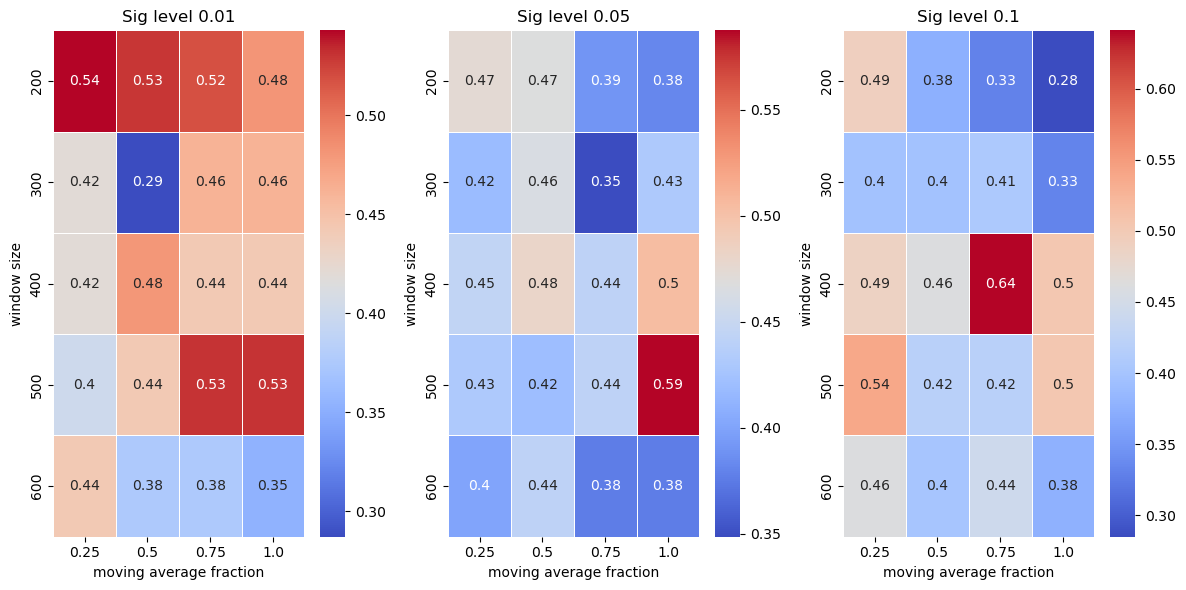

In [125]:
import seaborn as sns



heatmap_data = df3.pivot(index="param1", columns="param2", values="AUC")

# Create heatmap

fig, ax = plt.subplots(1,3,figsize=(12,6))
heatmap_data = df1.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[0])
ax[0].set_xlabel("moving average fraction")
ax[0].set_ylabel("window size")
ax[0].set_title('Sig level 0.01')


heatmap_data = df2.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[1])
ax[1].set_xlabel("moving average fraction")
ax[1].set_ylabel("window size")
ax[1].set_title('Sig level 0.05')


heatmap_data = df3.pivot(index="param1", columns="param2", values="AUC")
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5,ax=ax[2])
ax[2].set_xlabel("moving average fraction")
ax[2].set_ylabel("window size")
ax[2].set_title('Sig level 0.1')


fig.tight_layout()
fig.savefig('GS-Occupnacy.png')